In [2]:
import context_explore
import importlib
importlib.reload(context_explore)
import os
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# 2 Nov 2021

AA_DIR = "/Users/bhargavi/Documents/Research/Amplicon/data/AmpliconArchitect/pdx_cycles_graph"

CONVERT_FILE = True #run convert_cycles_file.py?

CONVERT_SCRIPT = "~/Documents/Research/Amplicon/convert_cycles_file.py"

PLAUSIBLE_PATHS = "/Users/bhargavi/Documents/Research/Amplicon/plausible_paths.py"

if CONVERT_FILE:
    for sample in os.listdir(AA_DIR):
        if not sample.startswith("."):
            for file in os.listdir(os.path.join(AA_DIR, sample)):
                if file.endswith("cycles.txt"):
                    cycles_file = os.path.join(AA_DIR, sample, file)
                    graph_file = os.path.join(AA_DIR, sample, file.split("cycles")[0] + "graph.txt")
                    pref = file.split(".")[0]
                    pref += "_converted"
                    #%run $CONVERT_SCRIPT -o $AA_DIR/$sample/$pref -g $graph_file -c $cycles_file
                    #%run $PLAUSIBLE_PATHS -g $graph_file

            

In [33]:
graph_files = [os.path.join(AA_DIR, sample, file)  for sample in os.listdir(os.path.join(AA_DIR)) if not sample.startswith(".") 
               for file in os.listdir(os.path.join(AA_DIR,sample))\
                if "graph.txt" in file  ]
conv_files = [file.split("graph.txt")[0] + "cycles_converted_cycles.txt" for file in graph_files ]




In [34]:
graph_files = [os.path.join(AA_DIR, sample, file)  for sample in os.listdir(os.path.join(AA_DIR)) if not sample.startswith(".") 
               for file in os.listdir(os.path.join(AA_DIR,sample))\
                if "graph.txt" in file  ]
conv_files = [file.split("graph.txt")[0] + "cycles_converted_cycles.txt" for file in graph_files ]



df_rows = []
for i in range(len(graph_files)):
    
    filename = graph_files[i].split("/")[-1]
    print(filename)
    sample_amp = filename.split("_graph")[0] 
    sample, amp = sample_amp.split("_amplicon")
    
    metrics = context_explore.ecDNAMetrics(graph_files[i], conv_files[i])
    context = context_explore.ecDNAContext(metrics)

    df_rows.append([sample, int(amp),metrics[0],metrics[1], metrics[2], metrics[3],context])

RCMB24_amplicon1_graph.txt
RCMB24_amplicon3_graph.txt
RCMB24_amplicon4_graph.txt
RCMB24_amplicon2_graph.txt
RCMB25_amplicon1_graph.txt
RCMB40_amplicon2_graph.txt
RCMB40_amplicon1_graph.txt
Icb1572MB_amplicon1_graph.txt
D425_amplicon451_graph.txt
D425_amplicon585_graph.txt
D425_amplicon13_graph.txt
BT084_amplicon4_graph.txt
BT084_amplicon2_graph.txt
BT084_amplicon5_graph.txt
BT084_amplicon3_graph.txt
BT084_amplicon6_graph.txt
BT084_amplicon7_graph.txt
BT084_amplicon1_graph.txt
Med1712FH_amplicon3_graph.txt
Med1712FH_amplicon4_graph.txt
Med1712FH_amplicon2_graph.txt
Med1712FH_amplicon1_graph.txt
D341_amplicon3_graph.txt
Icb984MB_amplicon4_graph.txt
Icb984MB_amplicon2_graph.txt
Icb984MB_amplicon5_graph.txt
Icb984MB_amplicon3_graph.txt
Icb984MB_amplicon6_graph.txt
Icb984MB_amplicon7_graph.txt
Icb984MB_amplicon1_graph.txt
MB002_amplicon1_graph.txt
Med511FH_amplicon4_graph.txt
Med411FH_amplicon1_graph.txt
Med411FH_amplicon2_graph.txt
Med411FH_amplicon4_graph.txt
Med411FH_amplicon3_graph.txt


In [35]:
df_cols = ['sample','amplicon_number','cycle_frac','t_n_ratio','BFB_score','n_chrs','Context']

cur_context = pd.DataFrame(df_rows, columns=df_cols)

cur_context.to_csv("/Users/bhargavi/Documents/Research/Amplicon/data/AmpliconArchitect/\
pdx_cycles_graph/Amplicon_Context.csv")

In [34]:
AA_DIR = "/Users/bhargavi/Documents/Research/Amplicon/data/CCLE/CCLE_AA_outputs/"
CONV_DIR = "/Users/bhargavi/Documents/Research/Amplicon/data/CCLE/converted_cycles/"


graph_files = [AA_DIR + file for file in os.listdir(AA_DIR) if "graph.txt" in file]
conv_files = [CONV_DIR + file.split("graph")[0] + "cycles_converted_cycles.txt" for file in os.listdir(AA_DIR) if "graph.txt" in file]



amplicon_class = pd.read_csv("/Users/bhargavi/Documents/Research/Amplicon/data/CCLE/AC_default/\
ccle_amplicon_classification_profiles.tsv", sep='\t')


df_rows = []
for i in range(len(graph_files)):
    
    filename = graph_files[i].split("/")[-1]
    print(filename)
    sample_amp = filename.split("_graph")[0] 
    sample, amp = sample_amp.split("_amplicon")
    AC_row = amplicon_class.loc[(amplicon_class['sample_name'] == sample) &\
                                   (amplicon_class['amplicon_number'] == "amplicon"+amp)]
    
    
    if AC_row['amplicon_decomposition_class'].iloc[0] == 'Cyclic':
            metrics, n_trans, n_cn = context_explore.ecDNAMetrics(graph_files[i], conv_files[i])
            context = context_explore.ecDNAContext(metrics,n_trans,n_cn)
        
            df_rows.append([sample, int(amp), AC_row['amplicon_decomposition_class'].iloc[0],AC_row['ecDNA+'].iloc[0],\
                   AC_row['BFB+'].iloc[0],metrics[0],metrics[1], metrics[2], metrics[3],n_trans,n_cn, context])

NCIH1339_LUNG_AA_amplicon6_graph.txt
OVSAHO_OVARY_AA_amplicon23_graph.txt
HS294T_SKIN_AA_amplicon4_graph.txt
NCIH3255_LUNG_AA_amplicon1_graph.txt
NUGC4_STOMACH_AA_amplicon18_graph.txt
SNU1_STOMACH_AA_amplicon7_graph.txt
BT20_BREAST_AA_amplicon9_graph.txt
EOL1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon2_graph.txt
59M_OVARY_AA_amplicon13_graph.txt
GCIY_STOMACH_AA_amplicon11_graph.txt
COV644_OVARY_AA_amplicon4_graph.txt
H4_CENTRAL_NERVOUS_SYSTEM_AA_amplicon15_graph.txt
KMS11_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon10_graph.txt
KATOIII_STOMACH_AA_amplicon3_graph.txt
HCC1569_BREAST_AA_amplicon21_graph.txt
DMS273_LUNG_AA_amplicon4_graph.txt
NCIH841_LUNG_AA_amplicon11_graph.txt
G402_SOFT_TISSUE_AA_amplicon3_graph.txt
5637_URINARY_TRACT_AA_amplicon2_graph.txt
EBC1_LUNG_AA_amplicon7_graph.txt
JHUEM1_ENDOMETRIUM_AA_amplicon7_graph.txt
NCIH2030_LUNG_AA_amplicon3_graph.txt
KYSE180_OESOPHAGUS_AA_amplicon8_graph.txt
KE39_STOMACH_AA_amplicon5_graph.txt
SH10TC_STOMACH_AA_amplicon9_graph.txt


AN3CA_ENDOMETRIUM_AA_amplicon2_graph.txt
UACC893_BREAST_AA_amplicon23_graph.txt
HGC27_STOMACH_AA_amplicon7_graph.txt
OVCAR4_OVARY_AA_amplicon9_graph.txt
UACC893_BREAST_AA_amplicon3_graph.txt
HT144_SKIN_AA_amplicon6_graph.txt
COLO741_SKIN_AA_amplicon6_graph.txt
HCC1599_BREAST_AA_amplicon16_graph.txt
LAMA84_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon6_graph.txt
SKMEL5_SKIN_AA_amplicon2_graph.txt
HDQP1_BREAST_AA_amplicon7_graph.txt
ES2_OVARY_AA_amplicon6_graph.txt
RMGI_OVARY_AA_amplicon11_graph.txt
NCIH1975_LUNG_AA_amplicon3_graph.txt
HCC1833_LUNG_AA_amplicon8_graph.txt
A101D_SKIN_AA_amplicon2_graph.txt
NCIH747_LARGE_INTESTINE_AA_amplicon3_graph.txt
TE1_OESOPHAGUS_AA_amplicon11_graph.txt
MKN45_STOMACH_AA_amplicon4_graph.txt
KYSE410_OESOPHAGUS_AA_amplicon21_graph.txt
KE39_STOMACH_AA_amplicon8_graph.txt
SH10TC_STOMACH_AA_amplicon4_graph.txt
KYSE180_OESOPHAGUS_AA_amplicon5_graph.txt
NCIH1694_LUNG_AA_amplicon2_graph.txt
DMS273_LUNG_AA_amplicon9_graph.txt
HCC1187_BREAST_AA_amplicon6_graph.t

NCIH1836_LUNG_AA_amplicon11_graph.txt
CORL24_LUNG_AA_amplicon2_graph.txt
HT29_LARGE_INTESTINE_AA_amplicon11_graph.txt
MFE296_ENDOMETRIUM_AA_amplicon1_graph.txt
NCIH1963_LUNG_AA_amplicon8_graph.txt
HCC1187_BREAST_AA_amplicon11_graph.txt
LU99_LUNG_AA_amplicon6_graph.txt
JHH7_LIVER_AA_amplicon4_graph.txt
CAKI1_KIDNEY_AA_amplicon3_graph.txt
NCIH1836_LUNG_AA_amplicon5_graph.txt
UACC893_BREAST_AA_amplicon31_graph.txt
COLO668_LUNG_AA_amplicon1_graph.txt
A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon9_graph.txt
GAMG_CENTRAL_NERVOUS_SYSTEM_AA_amplicon12_graph.txt
SKMES1_LUNG_AA_amplicon3_graph.txt
HCC33_LUNG_AA_amplicon5_graph.txt
SNU475_LIVER_AA_amplicon3_graph.txt
GI1_CENTRAL_NERVOUS_SYSTEM_AA_amplicon5_graph.txt
OV56_OVARY_AA_amplicon7_graph.txt
MDAMB134VI_BREAST_AA_amplicon4_graph.txt
MFE280_ENDOMETRIUM_AA_amplicon8_graph.txt
OVCAR8_OVARY_AA_amplicon1_graph.txt
CORL88_LUNG_AA_amplicon8_graph.txt
SNU16_STOMACH_AA_amplicon11_graph.txt
SCC25_UPPER_AERODIGESTIVE_TRACT_AA_amplicon2_graph.t

NCIH2196_LUNG_AA_amplicon8_graph.txt
NCIH1048_LUNG_AA_amplicon6_graph.txt
COLO201_LARGE_INTESTINE_AA_amplicon8_graph.txt
NCIH1693_LUNG_AA_amplicon10_graph.txt
OPM2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon12_graph.txt
SNU423_LIVER_AA_amplicon6_graph.txt
MONOMAC1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon4_graph.txt
NCIH838_LUNG_AA_amplicon6_graph.txt
HCC15_LUNG_AA_amplicon3_graph.txt
FU97_STOMACH_AA_amplicon15_graph.txt
GAMG_CENTRAL_NERVOUS_SYSTEM_AA_amplicon4_graph.txt
SHP77_LUNG_AA_amplicon7_graph.txt
DANG_PANCREAS_AA_amplicon6_graph.txt
NCIH2081_LUNG_AA_amplicon20_graph.txt
SKMEL24_SKIN_AA_amplicon7_graph.txt
SKOV3_OVARY_AA_amplicon2_graph.txt
PANC0327_PANCREAS_AA_amplicon5_graph.txt
OVK18_OVARY_AA_amplicon9_graph.txt
SW579_THYROID_AA_amplicon5_graph.txt
SHP77_LUNG_AA_amplicon19_graph.txt
MSTO211H_PLEURA_AA_amplicon11_graph.txt
NCIH1299_LUNG_AA_amplicon8_graph.txt
OSRC2_KIDNEY_AA_amplicon7_graph.txt
OV90_OVARY_AA_amplicon5_graph.txt
NCIH1876_LUNG_AA_amplicon1_graph.txt
NCIH

MCF7_BREAST_AA_amplicon16_graph.txt
NCIH1299_LUNG_AA_amplicon2_graph.txt
HCC1428_BREAST_AA_amplicon7_graph.txt
DMS454_LUNG_AA_amplicon13_graph.txt
NCIH2170_LUNG_AA_amplicon7_graph.txt
OPM2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon5_graph.txt
DU145_PROSTATE_AA_amplicon15_graph.txt
SHP77_LUNG_AA_amplicon13_graph.txt
QGP1_PANCREAS_AA_amplicon1_graph.txt
CORL311_LUNG_AA_amplicon6_graph.txt
MFE280_ENDOMETRIUM_AA_amplicon16_graph.txt
HCC38_BREAST_AA_amplicon6_graph.txt
OVK18_OVARY_AA_amplicon3_graph.txt
NCIH3255_LUNG_AA_amplicon32_graph.txt
HPAC_PANCREAS_AA_amplicon3_graph.txt
NCIH510_LUNG_AA_amplicon23_graph.txt
LN229_CENTRAL_NERVOUS_SYSTEM_AA_amplicon7_graph.txt
SNU475_LIVER_AA_amplicon12_graph.txt
HCC1833_LUNG_AA_amplicon10_graph.txt
SNUC2A_LARGE_INTESTINE_AA_amplicon7_graph.txt
HCC15_LUNG_AA_amplicon9_graph.txt
CAS1_CENTRAL_NERVOUS_SYSTEM_AA_amplicon7_graph.txt
KU1919_URINARY_TRACT_AA_amplicon5_graph.txt
JHH7_LIVER_AA_amplicon14_graph.txt
SKLU1_LUNG_AA_amplicon12_graph.txt
NCIH2196_

ZR751_BREAST_AA_amplicon14_graph.txt
TE1_OESOPHAGUS_AA_amplicon7_graph.txt
MKN74_STOMACH_AA_amplicon3_graph.txt
NCIH23_LUNG_AA_amplicon9_graph.txt
SKCO1_LARGE_INTESTINE_AA_amplicon15_graph.txt
KARPAS299_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon8_graph.txt
NCIH226_LUNG_AA_amplicon1_graph.txt
RKN_SOFT_TISSUE_AA_amplicon11_graph.txt
NCIH460_LUNG_AA_amplicon7_graph.txt
BT20_BREAST_AA_amplicon24_graph.txt
CORL279_LUNG_AA_amplicon10_graph.txt
ACHN_KIDNEY_AA_amplicon8_graph.txt
LS180_LARGE_INTESTINE_AA_amplicon1_graph.txt
SW480_LARGE_INTESTINE_AA_amplicon16_graph.txt
NCIH522_LUNG_AA_amplicon10_graph.txt
HCC1569_BREAST_AA_amplicon7_graph.txt
DMS53_LUNG_AA_amplicon28_graph.txt
CAL54_KIDNEY_AA_amplicon9_graph.txt
NCIH510_LUNG_AA_amplicon9_graph.txt
NCIH146_LUNG_AA_amplicon3_graph.txt
HCC1954_BREAST_AA_amplicon15_graph.txt
NCIH1930_LUNG_AA_amplicon6_graph.txt
NCIH2122_LUNG_AA_amplicon2_graph.txt
HARA_LUNG_AA_amplicon11_graph.txt
KYSE520_OESOPHAGUS_AA_amplicon15_graph.txt
EBC1_LUNG_AA_amplico

SNU407_LARGE_INTESTINE_AA_amplicon7_graph.txt
HCC827_LUNG_AA_amplicon10_graph.txt
SW480_LARGE_INTESTINE_AA_amplicon7_graph.txt
DAOY_CENTRAL_NERVOUS_SYSTEM_AA_amplicon3_graph.txt
59M_OVARY_AA_amplicon21_graph.txt
JHH1_LIVER_AA_amplicon2_graph.txt
HCC2157_BREAST_AA_amplicon30_graph.txt
EFM19_BREAST_AA_amplicon6_graph.txt
NIHOVCAR3_OVARY_AA_amplicon2_graph.txt
HCC1569_BREAST_AA_amplicon13_graph.txt
H4_CENTRAL_NERVOUS_SYSTEM_AA_amplicon7_graph.txt
NCIH1792_LUNG_AA_amplicon1_graph.txt
KYSE450_OESOPHAGUS_AA_amplicon3_graph.txt
OAW42_OVARY_AA_amplicon6_graph.txt
HCC70_BREAST_AA_amplicon17_graph.txt
OVSAHO_OVARY_AA_amplicon11_graph.txt
NCIH1792_LUNG_AA_amplicon18_graph.txt
LU99_LUNG_AA_amplicon7_graph.txt
JHH7_LIVER_AA_amplicon5_graph.txt
CAKI1_KIDNEY_AA_amplicon2_graph.txt
NCIH1836_LUNG_AA_amplicon4_graph.txt
UACC893_BREAST_AA_amplicon30_graph.txt
A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon8_graph.txt
LS513_LARGE_INTESTINE_AA_amplicon6_graph.txt
NCIH211_LUNG_AA_amplicon8_graph.txt
CO

LC1F_LUNG_AA_amplicon21_graph.txt
OVCAR8_OVARY_AA_amplicon16_graph.txt
NCIH1299_LUNG_AA_amplicon9_graph.txt
MSTO211H_PLEURA_AA_amplicon10_graph.txt
HS944T_SKIN_AA_amplicon6_graph.txt
PLCPRF5_LIVER_AA_amplicon5_graph.txt
OSRC2_KIDNEY_AA_amplicon6_graph.txt
OV90_OVARY_AA_amplicon4_graph.txt
NCIH1341_LUNG_AA_amplicon15_graph.txt
KYSE520_OESOPHAGUS_AA_amplicon6_graph.txt
MKN74_STOMACH_AA_amplicon17_graph.txt
NCIH661_LUNG_AA_amplicon4_graph.txt
SNU449_LIVER_AA_amplicon4_graph.txt
MDAMB361_BREAST_AA_amplicon10_graph.txt
NCIH1792_LUNG_AA_amplicon15_graph.txt
KLE_ENDOMETRIUM_AA_amplicon10_graph.txt
HCC1500_BREAST_AA_amplicon6_graph.txt
A704_KIDNEY_AA_amplicon3_graph.txt
SNU182_LIVER_AA_amplicon24_graph.txt
CAL120_BREAST_AA_amplicon15_graph.txt
SNGM_ENDOMETRIUM_AA_amplicon3_graph.txt
NIHOVCAR3_OVARY_AA_amplicon11_graph.txt
THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon7_graph.txt
SCLC21H_LUNG_AA_amplicon5_graph.txt
LC1F_LUNG_AA_amplicon6_graph.txt
8305C_THYROID_AA_amplicon6_graph.txt
HCC19

U2OS_BONE_AA_amplicon12_graph.txt
COLO829_SKIN_AA_amplicon10_graph.txt
SKMEL2_SKIN_AA_amplicon9_graph.txt
HCC1187_BREAST_AA_amplicon15_graph.txt
NCIH2171_LUNG_AA_amplicon8_graph.txt
MFE296_ENDOMETRIUM_AA_amplicon5_graph.txt
SW480_LARGE_INTESTINE_AA_amplicon2_graph.txt
DAOY_CENTRAL_NERVOUS_SYSTEM_AA_amplicon6_graph.txt
JHH1_LIVER_AA_amplicon7_graph.txt
NIHOVCAR3_OVARY_AA_amplicon7_graph.txt
HCC1569_BREAST_AA_amplicon16_graph.txt
EFM19_BREAST_AA_amplicon3_graph.txt
G401_SOFT_TISSUE_AA_amplicon2_graph.txt
H4_CENTRAL_NERVOUS_SYSTEM_AA_amplicon2_graph.txt
HCC15_LUNG_AA_amplicon10_graph.txt
KYSE450_OESOPHAGUS_AA_amplicon6_graph.txt
NCIH1792_LUNG_AA_amplicon4_graph.txt
OAW42_OVARY_AA_amplicon3_graph.txt
HCC70_BREAST_AA_amplicon12_graph.txt
OVSAHO_OVARY_AA_amplicon14_graph.txt
NCIH1437_LUNG_AA_amplicon5_graph.txt
NCIH1435_LUNG_AA_amplicon1_graph.txt
NCIH2227_LUNG_AA_amplicon16_graph.txt
NCIH2081_LUNG_AA_amplicon1_graph.txt
DANG_PANCREAS_AA_amplicon13_graph.txt
KNS62_LUNG_AA_amplicon4_graph.txt

SBC5_LUNG_AA_amplicon10_graph.txt
EBC1_LUNG_AA_amplicon12_graph.txt
CORL88_LUNG_AA_amplicon1_graph.txt
EFM192A_BREAST_AA_amplicon5_graph.txt
HCC1954_BREAST_AA_amplicon23_graph.txt
JHH1_LIVER_AA_amplicon10_graph.txt
KYSE410_OESOPHAGUS_AA_amplicon16_graph.txt
SKUT1_SOFT_TISSUE_AA_amplicon1_graph.txt
U251MG_CENTRAL_NERVOUS_SYSTEM_AA_amplicon6_graph.txt
NCIH3255_LUNG_AA_amplicon28_graph.txt
TE1_OESOPHAGUS_AA_amplicon26_graph.txt
NCIH1666_LUNG_AA_amplicon1_graph.txt
NCIH650_LUNG_AA_amplicon15_graph.txt
HEC1A_ENDOMETRIUM_AA_amplicon4_graph.txt
NUGC3_STOMACH_AA_amplicon13_graph.txt
JHOS2_OVARY_AA_amplicon11_graph.txt
KNS62_LUNG_AA_amplicon9_graph.txt
NCIH1437_LUNG_AA_amplicon8_graph.txt
DB_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon1_graph.txt
SNU387_LIVER_AA_amplicon12_graph.txt
OVSAHO_OVARY_AA_amplicon19_graph.txt
NCIH1792_LUNG_AA_amplicon10_graph.txt
NUGC4_STOMACH_AA_amplicon22_graph.txt
A704_KIDNEY_AA_amplicon6_graph.txt
HCC1500_BREAST_AA_amplicon3_graph.txt
NCIH1792_LUNG_AA_amplicon9_

RL952_ENDOMETRIUM_AA_amplicon5_graph.txt
HT1376_URINARY_TRACT_AA_amplicon15_graph.txt
HDQP1_BREAST_AA_amplicon18_graph.txt
DMS454_LUNG_AA_amplicon6_graph.txt
NCIH1694_LUNG_AA_amplicon16_graph.txt
NCIH23_LUNG_AA_amplicon25_graph.txt
HCC2157_BREAST_AA_amplicon19_graph.txt
LK2_LUNG_AA_amplicon4_graph.txt
LC1F_LUNG_AA_amplicon11_graph.txt
AU565_BREAST_AA_amplicon1_graph.txt
MDAMB361_BREAST_AA_amplicon2_graph.txt
HCC44_LUNG_AA_amplicon7_graph.txt
HCC70_BREAST_AA_amplicon7_graph.txt
NCIH23_LUNG_AA_amplicon1_graph.txt
786O_KIDNEY_AA_amplicon7_graph.txt
BFTC909_KIDNEY_AA_amplicon11_graph.txt
NCIH1105_LUNG_AA_amplicon3_graph.txt
HCC2157_BREAST_AA_amplicon4_graph.txt
IGROV1_OVARY_AA_amplicon4_graph.txt
NCIH508_LARGE_INTESTINE_AA_amplicon4_graph.txt
MFE280_ENDOMETRIUM_AA_amplicon48_graph.txt
HT29_LARGE_INTESTINE_AA_amplicon9_graph.txt
HCC1187_BREAST_AA_amplicon26_graph.txt
NCIH596_LUNG_AA_amplicon3_graph.txt
NCIH2066_LUNG_AA_amplicon19_graph.txt
HT1376_URINARY_TRACT_AA_amplicon8_graph.txt
NCIH510

HARA_LUNG_AA_amplicon5_graph.txt
HCC38_BREAST_AA_amplicon15_graph.txt
U2OS_BONE_AA_amplicon5_graph.txt
MDAMB157_BREAST_AA_amplicon4_graph.txt
VMCUB1_URINARY_TRACT_AA_amplicon4_graph.txt
CAL54_KIDNEY_AA_amplicon13_graph.txt
DU145_PROSTATE_AA_amplicon10_graph.txt
SHP77_LUNG_AA_amplicon16_graph.txt
QGP1_PANCREAS_AA_amplicon4_graph.txt
MFE280_ENDOMETRIUM_AA_amplicon13_graph.txt
CORL311_LUNG_AA_amplicon3_graph.txt
HCC38_BREAST_AA_amplicon3_graph.txt
OVK18_OVARY_AA_amplicon6_graph.txt
HCC1937_BREAST_AA_amplicon5_graph.txt
SHP77_LUNG_AA_amplicon8_graph.txt
DANG_PANCREAS_AA_amplicon9_graph.txt
A101D_SKIN_AA_amplicon10_graph.txt
LN229_CENTRAL_NERVOUS_SYSTEM_AA_amplicon2_graph.txt
HCC1833_LUNG_AA_amplicon15_graph.txt
SNUC2A_LARGE_INTESTINE_AA_amplicon2_graph.txt
NCIH838_LUNG_AA_amplicon9_graph.txt
AGS_STOMACH_AA_amplicon5_graph.txt
OCUM1_STOMACH_AA_amplicon16_graph.txt
OVCAR8_OVARY_AA_amplicon18_graph.txt
PANC1_PANCREAS_AA_amplicon5_graph.txt
KARPAS299_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_ampli

RERFLCMS_LUNG_AA_amplicon1_graph.txt
NCIH522_LUNG_AA_amplicon20_graph.txt
NCIH2052_PLEURA_AA_amplicon13_graph.txt
DU4475_BREAST_AA_amplicon6_graph.txt
VMCUB1_URINARY_TRACT_AA_amplicon9_graph.txt
HCC38_BREAST_AA_amplicon18_graph.txt
U2OS_BONE_AA_amplicon8_graph.txt
MDAMB157_BREAST_AA_amplicon9_graph.txt
HARA_LUNG_AA_amplicon8_graph.txt
NCIH1048_LUNG_AA_amplicon4_graph.txt
NCIH1693_LUNG_AA_amplicon12_graph.txt
BT483_BREAST_AA_amplicon2_graph.txt
HCC1500_BREAST_AA_amplicon14_graph.txt
EFM19_BREAST_AA_amplicon11_graph.txt
COLO829_SKIN_AA_amplicon7_graph.txt
SNU423_LIVER_AA_amplicon4_graph.txt
NCIH1436_LUNG_AA_amplicon2_graph.txt
OPM2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon10_graph.txt
SBC5_LUNG_AA_amplicon2_graph.txt
HCC95_LUNG_AA_amplicon6_graph.txt
NCIH1793_LUNG_AA_amplicon3_graph.txt
FUOV1_OVARY_AA_amplicon15_graph.txt
NCIH1651_LUNG_AA_amplicon14_graph.txt
NCIH522_LUNG_AA_amplicon3_graph.txt
NCIH520_LUNG_AA_amplicon7_graph.txt
MDAMB231_BREAST_AA_amplicon4_graph.txt
REC1_HAEMATOPO

NCIH3255_LUNG_AA_amplicon2_graph.txt
OVSAHO_OVARY_AA_amplicon20_graph.txt
NCIH23_LUNG_AA_amplicon6_graph.txt
KARPAS299_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon7_graph.txt
IGROV1_OVARY_AA_amplicon3_graph.txt
TE1_OESOPHAGUS_AA_amplicon8_graph.txt
NCIH1105_LUNG_AA_amplicon4_graph.txt
HCC2157_BREAST_AA_amplicon3_graph.txt
NCIH508_LARGE_INTESTINE_AA_amplicon3_graph.txt
COV362_OVARY_AA_amplicon7_graph.txt
ISHIKAWAHERAKLIO02ER_ENDOMETRIUM_AA_amplicon1_graph.txt
NCIH596_LUNG_AA_amplicon4_graph.txt
HCC1187_BREAST_AA_amplicon21_graph.txt
NCIH1930_LUNG_AA_amplicon9_graph.txt
DMS53_LUNG_AA_amplicon27_graph.txt
NCIH358_LUNG_AA_amplicon10_graph.txt
CAL54_KIDNEY_AA_amplicon6_graph.txt
NCIH510_LUNG_AA_amplicon6_graph.txt
RPMI8226_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon2_graph.txt
SKLU1_LUNG_AA_amplicon5_graph.txt
LOXIMVI_SKIN_AA_amplicon4_graph.txt
ES2_OVARY_AA_amplicon13_graph.txt
RPMI7951_SKIN_AA_amplicon1_graph.txt
ACHN_KIDNEY_AA_amplicon7_graph.txt
PATU8988T_PANCREAS_AA_amplicon5_grap

HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_AA_amplicon1_graph.txt
NCIH2227_LUNG_AA_amplicon3_graph.txt
LS411N_LARGE_INTESTINE_AA_amplicon4_graph.txt
NCIH526_LUNG_AA_amplicon10_graph.txt
NCIH838_LUNG_AA_amplicon10_graph.txt
JHOS2_OVARY_AA_amplicon9_graph.txt
NCIH1869_LUNG_AA_amplicon1_graph.txt
NUGC3_STOMACH_AA_amplicon6_graph.txt
DMS53_LUNG_AA_amplicon8_graph.txt
NCIH510_LUNG_AA_amplicon12_graph.txt
NCIH446_LUNG_AA_amplicon5_graph.txt
HSC3_UPPER_AERODIGESTIVE_TRACT_AA_amplicon7_graph.txt
RVH421_SKIN_AA_amplicon6_graph.txt
CAL120_BREAST_AA_amplicon1_graph.txt
FADU_UPPER_AERODIGESTIVE_TRACT_AA_amplicon12_graph.txt
DMS53_LUNG_AA_amplicon35_graph.txt
UACC812_BREAST_AA_amplicon14_graph.txt
CALU6_LUNG_AA_amplicon6_graph.txt
HCC1954_BREAST_AA_amplicon1_graph.txt
GB1_CENTRAL_NERVOUS_SYSTEM_AA_amplicon2_graph.txt
NCIH1092_LUNG_AA_amplicon5_graph.txt
MKN7_STOMACH_AA_amplicon13_graph.txt
CHAGOK1_LUNG_AA_amplicon2_graph.txt
NCIN87_STOMACH_AA_amplicon7_graph.txt
MKN45_STOMACH_AA_amplicon11_graph.tx

NCIH1437_LUNG_AA_amplicon2_graph.txt
PANC1005_PANCREAS_AA_amplicon7_graph.txt
NUGC3_STOMACH_AA_amplicon19_graph.txt
EFM192A_BREAST_AA_amplicon15_graph.txt
ONS76_CENTRAL_NERVOUS_SYSTEM_AA_amplicon12_graph.txt
NCIH2227_LUNG_AA_amplicon11_graph.txt
NCIH2081_LUNG_AA_amplicon6_graph.txt
KNS62_LUNG_AA_amplicon3_graph.txt
CCK81_LARGE_INTESTINE_AA_amplicon6_graph.txt
KLE_ENDOMETRIUM_AA_amplicon6_graph.txt
TE5_OESOPHAGUS_AA_amplicon10_graph.txt
MKN1_STOMACH_AA_amplicon7_graph.txt
SNU407_LARGE_INTESTINE_AA_amplicon5_graph.txt
HCC827_LUNG_AA_amplicon12_graph.txt
SNU449_LIVER_AA_amplicon10_graph.txt
T47D_BREAST_AA_amplicon1_graph.txt
NCIH3255_LUNG_AA_amplicon22_graph.txt
SCC25_UPPER_AERODIGESTIVE_TRACT_AA_amplicon1_graph.txt
EBC1_LUNG_AA_amplicon18_graph.txt
ONS76_CENTRAL_NERVOUS_SYSTEM_AA_amplicon9_graph.txt
FADU_UPPER_AERODIGESTIVE_TRACT_AA_amplicon8_graph.txt
MCF7_BREAST_AA_amplicon7_graph.txt
DMS53_LUNG_AA_amplicon14_graph.txt
GI1_CENTRAL_NERVOUS_SYSTEM_AA_amplicon6_graph.txt
HCC33_LUNG_AA_amp

NCIH1341_LUNG_AA_amplicon17_graph.txt
NCIH661_LUNG_AA_amplicon6_graph.txt
SNU449_LIVER_AA_amplicon6_graph.txt
KYSE520_OESOPHAGUS_AA_amplicon4_graph.txt
MKN74_STOMACH_AA_amplicon15_graph.txt
HCC1937_BREAST_AA_amplicon9_graph.txt
PANC0327_PANCREAS_AA_amplicon6_graph.txt
SKOV3_OVARY_AA_amplicon1_graph.txt
QGP1_PANCREAS_AA_amplicon8_graph.txt
NCIH838_LUNG_AA_amplicon5_graph.txt
HCC1833_LUNG_AA_amplicon19_graph.txt
SKMEL24_SKIN_AA_amplicon4_graph.txt
NCIH2081_LUNG_AA_amplicon23_graph.txt
OCUM1_STOMACH_AA_amplicon3_graph.txt
DANG_PANCREAS_AA_amplicon5_graph.txt
GAMG_CENTRAL_NERVOUS_SYSTEM_AA_amplicon7_graph.txt
SHP77_LUNG_AA_amplicon4_graph.txt
FU97_STOMACH_AA_amplicon16_graph.txt
SKUT1_SOFT_TISSUE_AA_amplicon6_graph.txt
U251MG_CENTRAL_NERVOUS_SYSTEM_AA_amplicon1_graph.txt
KYSE410_OESOPHAGUS_AA_amplicon11_graph.txt
TE1_OESOPHAGUS_AA_amplicon21_graph.txt
HCT15_LARGE_INTESTINE_AA_amplicon1_graph.txt
MIAPACA2_PANCREAS_AA_amplicon7_graph.txt
SNU407_LARGE_INTESTINE_AA_amplicon8_graph.txt
A2058_SK

In [36]:
df_cols = ['sample','amplicon_number','AC_class','ecDNA+','BFB+',\
           'cycle_frac','t_n_ratio','BFB_score','n_chrs','n_trans','n_cn','Context']

ccle_context = pd.DataFrame(df_rows, columns=df_cols)

ccle_context.to_csv("/Users/bhargavi/Documents/Research/Amplicon/data/CCLE/CCLE_AC_Cyclic_Context_27_Jan_2022_exp1.csv")

In [12]:
df_rows = []

amplicon_class = pd.read_csv("/Users/bhargavi/Documents/Research/\
Amplicon/data/Turner2017/AC/turner2017_amplicon_classification_profiles.tsv", sep='\t')

test_sheet = pd.read_csv("/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/\
PancancerECDNACellLine_TestingSheet.csv")

gene_sheet = pd.read_csv('/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/\
AC/turner2017_gene_list.tsv', sep='\t')

AA_DATA_DIR = AA_DATA
Turner_dir = "/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/"
index = 0
for i, row in test_sheet.iterrows():
    gene_row = gene_sheet.loc[(gene_sheet['gene'] == row['Gene']) & (gene_sheet['sample_name'].\
                                                                     str.startswith(row['Run']))]
    if gene_row.shape[0] > 0:
        new_dir = os.path.join(Turner_dir, 'test_data', row['Sample'] + "_" + row['Gene'] + "_" + row['Run'] )
        
        
        #!mkdir $new_dir
        amp_number = gene_row['amplicon_number'].iloc[0]
        
        AC_row = amplicon_class[(amplicon_class['sample_name'] == row['Run']) & \
                               (amplicon_class['amplicon_number'] == amp_number)]
        
        gfile = os.path.join(AA_DATA_DIR, row['Run'], row['Run'] + "_" + amp_number + "_graph.txt" )
        cfile = os.path.join(AA_DATA_DIR, row['Run'], row['Run'] + "_" + amp_number \
                                 + "_cycles_converted_cycles.txt" )
        
        
        graph_dir = os.path.join(AA_DATA_DIR, row['Run'])
        print(graph_dir)
        
        
        if AC_row['amplicon_decomposition_class'].iloc[0] == 'Cyclic' or True:
            print(gfile, cfile)
            metrics, n_trans, n_cn = context_explore.ecDNAMetrics(gfile, cfile)
            context = context_explore.ecDNAContext(metrics,n_trans,n_cn)
        
            
        
            df_rows.append([row['Sample'], row['Gene'], row['Run'],row['ecDNACount'], row['foldback_reads'], \
                            amp_number,AC_row['amplicon_decomposition_class'].iloc[0], AC_row['ecDNA+'].iloc[0],\
                            AC_row['BFB+'].iloc[0], metrics[0],metrics[1], metrics[2], metrics[3],n_trans,n_cn,context])
        
        index += 1
        
        

/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-23
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-23/FF-23_amplicon2_graph.txt /Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-23/FF-23_amplicon2_cycles_converted_cycles.txt
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-23
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-23/FF-23_amplicon8_graph.txt /Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-23/FF-23_amplicon8_cycles_converted_cycles.txt
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-81
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-81/FF-81_amplicon1_graph.txt /Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-81/FF-81_amplicon1_cycles_converted_cycles.txt
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-81
/Users/bhargavi/Documents/Research/Amplicon/data/T

/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/KT18
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/KT18/KT18_amplicon1_graph.txt /Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/KT18/KT18_amplicon1_cycles_converted_cycles.txt
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/KT18
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/KT18/KT18_amplicon2_graph.txt /Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/KT18/KT18_amplicon2_cycles_converted_cycles.txt


In [13]:
turner_context = pd.DataFrame(df_rows, columns=['Sample','Gene','Run','ecDNACount',\
                              'foldback_reads','Amplicon','AC_class','AC_ecDNA+','AC_BFB+',
                              'cycle_frac','t_n_ratio','bfb_score','n_chrs','n_trans','n_cn','Context'])

turner_context.to_csv("/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/Turner2017_AC_cyclic_context_27_Jan_2022_exp_1.csv")

In [3]:
AA_DIR = "/Users/bhargavi/Documents/Research/Amplicon/data2/RCMB56_P1/RCMB56_P1_AA_results/RCMB56_AA"

CONVERT_FILE = False #run convert_cycles_file.py?

CONVERT_SCRIPT = "~/Documents/Research/Amplicon/convert_cycles_file.py"

PLAUSIBLE_PATHS = "/Users/bhargavi/Documents/Research/Amplicon/plausible_paths.py"

if CONVERT_FILE:
    for file in os.listdir(AA_DIR):
        if file.endswith("cycles.txt"):
            cycles_file = os.path.join(AA_DIR, file)
            graph_file = os.path.join(AA_DIR, file.split("cycles")[0] + "graph.txt")
            pref = file.split(".")[0]
            pref += "_converted"
            #%run $CONVERT_SCRIPT -o $AA_DIR/$pref -g $graph_file -c $cycles_file

In [3]:
AA_DATA = "/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/"
for aa_dir in os.listdir(AA_DATA):
    if not aa_dir.startswith("."):
        for file in os.listdir(AA_DATA + aa_dir):
            if file.endswith("cycles.txt"):
                cycles_file = os.path.join(AA_DATA + aa_dir, file)
                graph_file = os.path.join(AA_DATA + aa_dir, file.split("cycles")[0] + "graph.txt")
                pref = file.split(".")[0]
                pref += "_converted"
                #%run $CONVERT_SCRIPT -o $AA_DATA$aa_dir/$pref -g $graph_file -c $cycles_file
                #%run $PLAUSIBLE_PATHS -g $graph_file
                


In [7]:
AA_DIR = "/Users/bhargavi/Documents/Research/Amplicon/data/CCLE/CCLE_AA_outputs/"
CONV_DIR = "/Users/bhargavi/Documents/Research/Amplicon/data/CCLE/converted_cycles/"
IMAGE_DIR = "/Users/bhargavi/Documents/Research/Amplicon/data/CCLE/CCLE_AA_images/"

graph_files = [AA_DIR + file for file in os.listdir(AA_DIR) if "graph.txt" in file]
conv_files = [CONV_DIR + file.split("graph")[0] + "cycles_converted_cycles.txt" for file in os.listdir(AA_DIR) if "graph.txt" in file]


In [4]:
amplicon_class = pd.read_csv("/Users/bhargavi/Documents/Research/\
Amplicon/data/Turner2017/AC/turner2017_amplicon_classification_profiles.tsv", sep='\t')

test_sheet = pd.read_csv("/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/\
PancancerECDNACellLine_TestingSheet.csv")

gene_sheet = pd.read_csv('/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/\
AC/turner2017_gene_list.tsv', sep='\t')

In [5]:
#test_sheet

In [6]:
#amplicon_class

In [7]:
#gene_sheet

In [8]:
#get summary sheet only for entries present in the test sheet.
df_rows = []
#!mkdir 'test_data'


In [9]:
too_long = ['FF-16','FF-22']
scaling_factors = {15:7,16:10,33:5,39:2}

In [10]:
33 in scaling_factors

True

In [11]:
!pwd

/Users/bhargavi/Dropbox/My Mac (Bhargavis-MacBook-Pro.local)/Documents/Research/Amplicon


In [9]:
AA_DATA_DIR = AA_DATA
Turner_dir = "/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/"
index = 0
for i, row in test_sheet.iterrows():
    gene_row = gene_sheet.loc[(gene_sheet['gene'] == row['Gene']) & (gene_sheet['sample_name'].\
                                                                     str.startswith(row['Run']))]
    if gene_row.shape[0] > 0:
        new_dir = os.path.join(Turner_dir, 'test_data', row['Sample'] + "_" + row['Gene'] + "_" + row['Run'] )
        
        
        #!mkdir $new_dir
        amp_number = gene_row['amplicon_number'].iloc[0]
        
        AC_row = amplicon_class[(amplicon_class['sample_name'] == row['Run']) & \
                               (amplicon_class['amplicon_number'] == amp_number)]
        
        graph_file = os.path.join(AA_DATA_DIR, row['Run'], row['Run'] + "_" + amp_number + "_graph.txt" )
        conv_file = os.path.join(AA_DATA_DIR, row['Run'], row['Run'] + "_" + amp_number \
                                 + "_cycles_converted_cycles.txt" )
        
        
        graph_dir = os.path.join(AA_DATA_DIR, row['Run'])
        print(graph_dir)
        
        #!cp $graph_file $new_dir
        #!cp $conv_file $new_dir
        
        cycles_f = os.path.join(AA_DATA_DIR, row['Run'],row['Run'] + "_" + amp_number + "_cycles.txt")
        #!cp $cycles_f $new_dir
        #if row['Run'] + "_"  + amp_number + "_candidate_cycles.txt" in os.listdir(graph_dir):
            #cand_cycles = os.path.join(AA_DATA_DIR, row['Run'],\
                                       #row['Run'] + "_"  + amp_number + "_candidate_cycles.txt")
            #cand_segs = os.path.join(AA_DATA_DIR, row['Run'],\
                                       #row['Run'] + "_"  + amp_number + "_candidate_cycles.txt")
            #old_cand_cycles = os.path.join(new_dir, row['Run'] + "_"  + amp_number + "_candidate_cycles.txt")
            
            
            #!rm 
            #!cp $cand_cycles $new_dir
            
        if row['Run'] + "_"  + amp_number + "_candidate_cycles.txt" not in os.listdir(graph_dir):
            if row['Run'] not in too_long:
                if index not in scaling_factors:
                    %cd $graph_dir
                    %run $PLAUSIBLE_PATHS -g $graph_file  --keep_all_LC
                else:
                    scale = scaling_factors[index]
                    %cd $graph_dir
                    %run $PLAUSIBLE_PATHS -g $graph_file --keep_all_LC --scaling_factor $scale
                    
        if row['Run'] + "_"  + amp_number + "_candidate_cycles.txt" not in os.listdir(new_dir):
                    
            cand_cycles = os.path.join(AA_DATA_DIR, row['Run'],\
                                   row['Run'] + "_"  + amp_number + "_candidate_cycles.txt")

            cand_segs = os.path.join(AA_DATA_DIR, row['Run'],\
                                   row['Run'] + "_"  + amp_number + "_scaled_cns.txt")

            !cp $cand_cycles $new_dir
            !cp $cand_segs $new_dir
                

           
        #copy plots
        #plot_source = 'plots/' + row['Run'] + ".jpg"
        #plot_copy =  new_dir + "/" 
        #!cp $plot_source $plot_copy
        
        #copy AA cartoons
        #img_file = "AA/" + row['Run'] + "_" + amp_number + ".png"
        #!cp $img_file $new_dir
        scaling_factor = None
        if row['Run'] + "_"  + amp_number + "_candidate_cycles.txt" in os.listdir(graph_dir):
            prop_amplified, plausible_cycle_frac,scaling_factor = context_explore.\
            get_plausible_frac(os.path.join(graph_dir,row['Run'] + "_"  + amp_number + "_candidate_cycles.txt"),\
                              graph_file)
        else:
            plausible_cycle_frac = None
            prop_amplified = None
        s,c  = context_explore.readConvertedCycles(conv_file, graph_file)
        frac_table = context_explore.cycleFractionTable(c,s)
        largest_cyc_size = 0
        cycle_cn = 0
        cycle_frac = 0
        cycle_num = None
        circular_frac = frac_table[frac_table['Circular']]
        if circular_frac.shape[0] > 0:
            largest_cyc_size = circular_frac['Size'].iloc[0]
            cycle_frac = circular_frac['CN Fraction'].iloc[0]
            cycle_num = int(circular_frac['Cycle'].iloc[0])
            cycle_cn = circular_frac['CN'].iloc[0]

            
        chromothrip = False
        n_trans, cns, all_cns = context_explore.count_transitions(graph_file)
        num_segs = len(all_cns)
        n_cn_states = len(context_explore.deduce_states2(all_cns))
        max_cont, n_osc, n_seg, something , sdict, len_cns = \
            context_explore.oscillating_cn(graph_file, show_plot = False)
        
        df_rows.append([row['Sample'], row['Gene'], row['Run'], row['Classification'],row['ModifiedClassification'],\
                       row['ecDNACount'], row['foldback_reads'], amp_number,\
                       AC_row['amplicon_decomposition_class'].iloc[0], AC_row['ecDNA+'].iloc[0], AC_row['BFB+'].iloc[0],\
                       AC_row['ecDNA_amplicons'].iloc[0],\
                       largest_cyc_size, cycle_cn,cycle_frac, cycle_num,scaling_factor,prop_amplified, plausible_cycle_frac,context_explore.isEpisome(frac_table), n_osc, chromothrip, n_trans, num_segs, n_cn_states])
        
        index += 1
        
        

/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-23
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-23
['19+', '20+', '19+', '20+']
[19, 20, 19, 20]
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-81
['2+', '3+', '4+', '5+', '28-', '27-', '26-', '25-', '24-', '23-', '22-', '42-', '41-', '40-', '39-', '37-', '36-', '35-', '45-', '44-', '36-', '35-', '45-']
[2, 3, 4, 5, -28, -27, -26, -25, -24, -23, -22, -42, -41, -40, -39, -37, -36, -35, -45, -44, -36, -35, -45]
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-81
['2+', '3+', '4+', '5+', '28-', '27-', '26-', '25-', '24-', '23-', '22-', '42-', '41-', '40-', '39-', '37-', '36-', '35-', '45-', '44-', '36-', '35-', '45-']
[2, 3, 4, 5, -28, -27, -26, -25, -24, -23, -22, -42, -41, -40, -39, -37, -36, -35, -45, -44, -36, -35, -45]
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-81
['2+', '3+', '4+', '5+', '28-', '27-', '26-', '25-',

RecursionError: maximum recursion depth exceeded while calling a Python object

cp: /Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-77/FF-77_amplicon6_candidate_cycles.txt: No such file or directory
cp: /Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-77/FF-77_amplicon6_scaled_cns.txt: No such file or directory
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-35
/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-47
['2+', '3+', '4+', '5+', '6+', '7+', '8+', '9+', '30+', '31+', '32+', '33+', '34+', '35+', '36+', '37+', '38+', '39+', '40+', '41+', '42+', '43+', '92-', '91-', '90-', '96-', '95-', '94-', '63-', '26+', '27+', '28+', '24+', '25+', '26+', '37-', '36-', '35-', '119-', '118-', '60-', '59-', '58-', '57-', '56-', '55-', '54-', '103-', '102-', '100-', '84+', '85+']
[2, 3, 4, 5, 6, 7, 8, 9, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, -92, -91, -90, -96, -95, -94, -63, 26, 27, 28, 24, 25, 26, -37, -36, -35, -119, -118, -60, -59, -58, -57, -56, -55, -54, -103, -102

In [14]:
 #cd $graph_dir
            #run $PLAUSIBLE_PATHS -g $graph_file --remove_short_jumps --keep_all_LC


In [17]:
conv_file = "/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-23/FF-23_amplicon8_cycles_converted_cycles.txt"
graph_file = "/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/FF-23/FF-23_amplicon8_graph.txt"
s,c  = context_explore.readConvertedCycles(conv_file, graph_file)
context_explore.cycleFractionTable(c,s)
        

Cycle     Size         CN  Circular  CN Fraction
7       8  7379Kbp   2.957070     False     0.141050
3       4  4290Kbp   4.364111     False     0.121023
1       2  2338Kbp   6.717595     False     0.101525
4       5  3216Kbp   4.364111     False     0.090725
2       3  2529Kbp   4.803047     False     0.078520
15     16  6642Kbp   1.457820     False     0.062592
5       6  2252Kbp   3.720315     False     0.054158
18     19  6625Kbp   1.186063     False     0.050793
12     13  3758Kbp   1.941232     False     0.047157
6       7  2033Kbp   3.107766     False     0.040841
17     18  4859Kbp   1.221229      True     0.038358
14     15  3820Kbp   1.527057     False     0.037708
8       9  1890Kbp   2.678298     False     0.032722
11     12   829Kbp   1.988408     False     0.010655
16     17   933Kbp   1.221684     False     0.007368
13     14   449Kbp   1.865068     False     0.005413
9      10   221Kbp   2.508372     False     0.003583
10     11   125Kbp   2.450861     False     0.001980
0       1     1Kbp  13.965667      True     0.000090

In [12]:
test_summary[test_summary['Run'] == 'FF-79']['plausible_frac']

33    0.449438
Name: plausible_frac, dtype: float64

In [28]:
test_summary = pd.DataFrame(df_rows, columns=['Sample','Gene','Run','Classification','ModifiedClassification','ecDNACount',\
                              'foldback_reads','Amplicon','AC_class','AC_ecDNA+','AC_BFB+','AC_ecDNA_amplicons',\
                              'largest_cycle','cycle_cn','cycle_frac','cycle_num','scaling_factor','prop_amplified','plausible_frac','Episome','n_oscillations','Chromothripsis','n_transitions','num_segs','n_cn_states'])

test_summary.to_csv("/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/Turner2017_AC_cyclic_context_27_Jan_2022_exp_1.csv")

ValueError: 25 columns passed, passed data had 16 columns

In [26]:
context_explore.get_plausible_frac("/Users/bhargavi/Documents/Research/\
Amplicon/data/Turner2017/AA_data/KT18/KT18_amplicon1_candidate_cycles.txt")

0

In [29]:
test_summary = pd.read_csv("/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/Turner2017_AC_cyclic_context_27_Jan_2022_exp_1.csv")


In [30]:
test_summary.columns

Index(['Unnamed: 0', 'Sample', 'Gene', 'Run', 'ecDNACount', 'foldback_reads',
       'Amplicon', 'AC_class', 'AC_ecDNA+', 'AC_BFB+', 'cycle_frac',
       't_n_ratio', 'bfb_score', 'n_chrs', 'n_trans', 'n_cn', 'Context'],
      dtype='object')

In [16]:
plt.scatter( test_summary[test_summary['ecDNACount'] > 0 ]['n_oscillations'],\
            test_summary[test_summary['ecDNACount'] > 0 ]['ecDNACount'], color='cornflowerblue', label='ecDNA > 0')
plt.scatter( test_summary[test_summary['ecDNACount'] == 0 ]['n_oscillations'],\
            test_summary[test_summary['ecDNACount'] == 0 ]['ecDNACount'], color='dimgrey', label='ecDNA = 0')
plt.xlabel("n_oscillations")
plt.ylabel("ecDNA count")
plt.title("FISH ecDNA count vs Dominant cycle copy number fraction")
plt.legend()

KeyError: 'n_oscillations'

/Users/bhargavi/anaconda3/envs/work3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


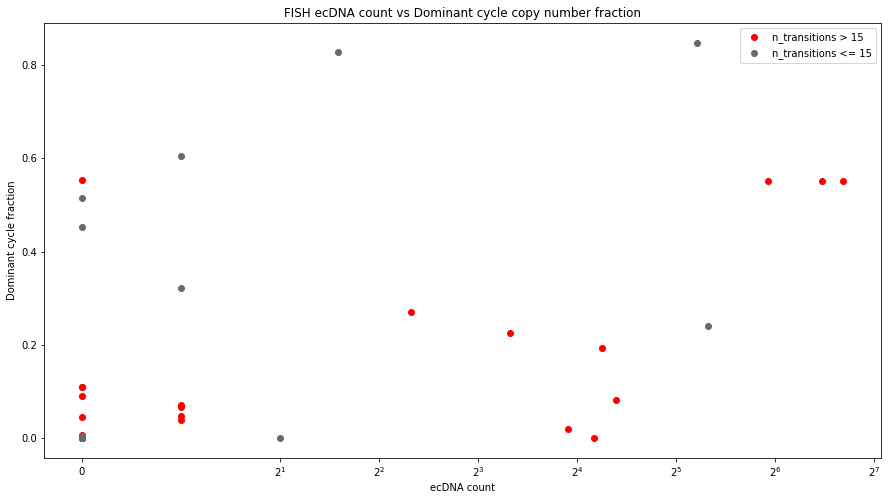

In [41]:
plt.figure(figsize=(15,8))
plt.scatter( test_summary[test_summary['n_transitions'] > 15 ]['ecDNACount'],\
            test_summary[test_summary['n_transitions'] > 15 ]['cycle_frac'], color='red', label='n_transitions > 15')
plt.scatter( test_summary[test_summary['n_transitions'] <= 15 ]['ecDNACount'],\
            test_summary[test_summary['n_transitions'] <= 15 ]['cycle_frac'], color='dimgrey', label='n_transitions <= 15')
plt.ylabel("Dominant cycle fraction")
plt.xlabel("ecDNA count")
plt.xscale('symlog', basex=2)
plt.title("FISH ecDNA count vs Dominant cycle copy number fraction")
plt.legend()

In [7]:
test_summary['max_cycle_frac'] =test_summary[['cycle_frac','plausible_frac']].max(axis=1)

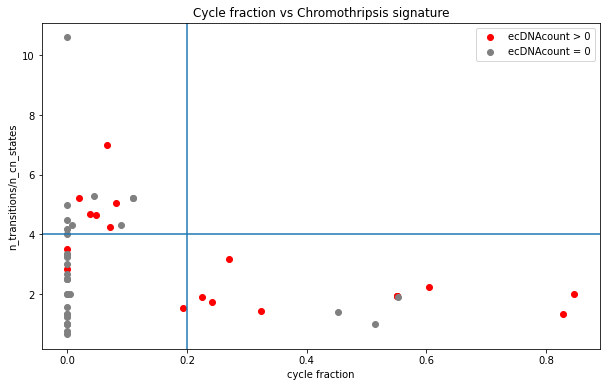

In [33]:
plt.figure(figsize=(10,6))
large_cycle = test_summary[test_summary['ecDNACount'] > 0]
small_cycle = test_summary[test_summary['ecDNACount'] == 0]
plt.scatter( large_cycle['cycle_frac'],large_cycle['n_trans']/large_cycle['n_cn']\
            , color='red', label='ecDNAcount > 0')
plt.scatter( small_cycle['cycle_frac'],small_cycle['n_trans']/small_cycle['n_cn']\
            , color='grey', label='ecDNAcount = 0')
plt.axvline(0.2)
plt.axhline(4)

plt.ylabel("n_transitions/n_cn_states")
plt.xlabel("cycle fraction")
#plt.xscale('symlog', basex=2)
plt.title("Cycle fraction vs Chromothripsis signature")
plt.legend()

In [26]:
plt.figure(figsize=(10,10))
large_cycle = test_summary[test_summary['ecDNACount'] > 0]
small_cycle = test_summary[test_summary['ecDNACount'] == 0]
plt.scatter( large_cycle['max_cycle_frac'],large_cycle['n_transitions']/large_cycle['n_cn_states']\
            , color='red', label='ecDNAcount > 0')
plt.scatter( small_cycle['max_cycle_frac'],small_cycle['n_transitions']/small_cycle['n_cn_states']\
            , color='grey', label='ecDNAcount = 0')
plt.axvline(0.2)
plt.axhline(5)

plt.ylabel("n_transitions")
plt.xlabel("max(cycle frac,plausible_cycle_frac)")
#plt.xscale('symlog', basex=2)
plt.title("maximum cycle fraction vs n_transitions")
plt.legend()

KeyError: 'max_cycle_frac'

<Figure size 720x720 with 0 Axes>

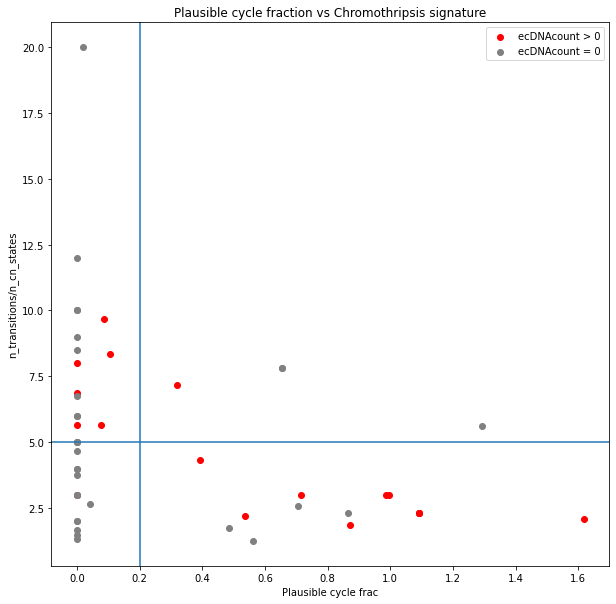

In [6]:
plt.figure(figsize=(10,10))
large_cycle = test_summary[test_summary['ecDNACount'] > 0]
small_cycle = test_summary[test_summary['ecDNACount'] == 0]
plt.scatter( large_cycle['plausible_frac'],large_cycle['n_transitions']/large_cycle['n_cn_states']\
            , color='red', label='ecDNAcount > 0')
plt.scatter( small_cycle['plausible_frac'],small_cycle['n_transitions']/small_cycle['n_cn_states']\
            , color='grey', label='ecDNAcount = 0')
plt.axvline(0.2)
plt.axhline(5)

plt.ylabel("n_transitions/n_cn_states")
plt.xlabel("Plausible cycle frac")
#plt.xscale('symlog', basex=2)
plt.title("Plausible cycle fraction vs Chromothripsis signature")
plt.legend()

In [13]:
test_summary = pd.read_csv("/Users/bhargavi/Downloads/Turner2017_summary_6July2021+VBAnnotation - Turner2017_summary_6July2021 (2).csv")



In [14]:
test_summary.columns

Index(['Unnamed: 0', 'Sample', 'Gene', 'Run', 'Classification',
       'ModifiedClassification', 'ecDNACount (DAPI)', 'foldback_reads',
       'Amplicon', 'AC_class', 'AC_ecDNA+', 'AC_BFB+', 'AC_ecDNA_amplicons',
       'largest_cycle', 'cycle_cn', 'cycle_num', 'cycle_frac',
       'scaling_factor', 'plausible_frac', 'prop_amplified', 'n_oscillations',
       'n_transitions', 'n_transitions_greater_15', 'num_segs', 'n_cn_states',
       'n_trans/n_cn_states', 'VB Notes on cytogenetics', 'VB Notes',
       'Bhargavi todo/notes'],
      dtype='object')

HK359 EGFR 4.0 0.269813001


Text(0.5, 1.0, 'ecDNA Count (DAPI) vs Presence of Signatures')

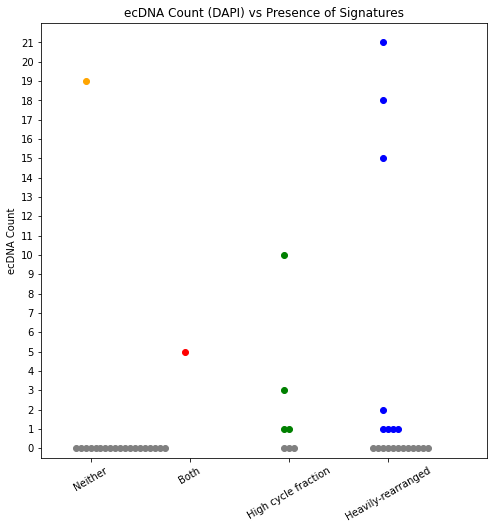

In [15]:
plt.figure(figsize=(8,8))
neither_counts = {}
both_counts = {}
chromo_counts = {}
cycle_counts = {}
for i, row in test_summary.iterrows():
    offset = 0.1
    if row['n_trans/n_cn_states'] < 4 and row['cycle_frac'] < 0.2:
        if not row['ecDNACount (DAPI)'] in neither_counts:
            neither_counts[row['ecDNACount (DAPI)']] = 1
        else:
            neither_counts[row['ecDNACount (DAPI)']] += 1
        if row['ecDNACount (DAPI)'] > 0:
            color = 'orange'
        else:
            color='grey'
            offset=0.2
        plt.scatter(0.5 - offset + neither_counts[row['ecDNACount (DAPI)']]/20,row['ecDNACount (DAPI)'],color=color)
        
    elif row['cycle_frac'] < 0.2 and row['n_trans/n_cn_states'] >= 4 :
        if not row['ecDNACount (DAPI)'] in chromo_counts:
            chromo_counts[row['ecDNACount (DAPI)']] = 1
        else:
            chromo_counts[row['ecDNACount (DAPI)']] += 1
        if row['ecDNACount (DAPI)'] > 0:
            color = 'blue'
        else:
            color='grey'
            offset=0.2
        plt.scatter(3.5 - offset + chromo_counts[row['ecDNACount (DAPI)']]/20,row['ecDNACount (DAPI)'],color=color)
        
    elif row['n_trans/n_cn_states'] < 4 and row['cycle_frac'] >= 0.2 :
        if not row['ecDNACount (DAPI)'] in cycle_counts:
            cycle_counts[row['ecDNACount (DAPI)']] = 1
        else:
            cycle_counts[row['ecDNACount (DAPI)']] += 1
        if row['ecDNACount (DAPI)'] > 0:
            color = 'green'
        else:
            color='grey'
            offset=0.1
        plt.scatter(2.5 - offset + cycle_counts[row['ecDNACount (DAPI)']]/20,row['ecDNACount (DAPI)'],color=color)
    else:
        print(row['Sample'], row['Gene'], row['n_trans/n_cn_states'], row['cycle_frac'])
        if not row['ecDNACount (DAPI)'] in both_counts:
            both_counts[row['ecDNACount (DAPI)']] = 1
        else:
            both_counts[row['ecDNACount (DAPI)']] += 1
        if row['ecDNACount (DAPI)'] > 0:
            color = 'red'
        else:
            color='grey'
            offset=0.1
        plt.scatter(1.5 - offset + both_counts[row['ecDNACount (DAPI)']]/20,row['ecDNACount (DAPI)'],color=color)
        
            
        
plt.xlim(0,4.5)
plt.ylim(-0.5,22)

x = np.array([0.5,1.5,2.5,3.5])
y = np.arange(0,22,1)
plt.yticks(y)
my_xticks = ['Neither','Both','High cycle fraction','Heavily-rearranged']
plt.xticks(x, my_xticks, rotation=30)
plt.ylabel("ecDNA Count")
plt.title("ecDNA Count (DAPI) vs Presence of Signatures")
        

HK359 5 EGFR 4.0 0.269813001 0.39264714729999994
PC3 21 MYC 6.642857143 0.08114066438999999 0.32039646039999997
SF268 0 MLL 7.166666667 0.10966329359999999 0.6554957474
SF268 0 MMP8 7.166666667 0.10966329359999999 0.6554957474
SW620 0 MYC 4.666666667 0.09070218186000001 1.292199907


Text(0.5, 1.0, 'ecDNA Count (DAPI) vs Presence of Signatures (plausible cycle fraction considered)')

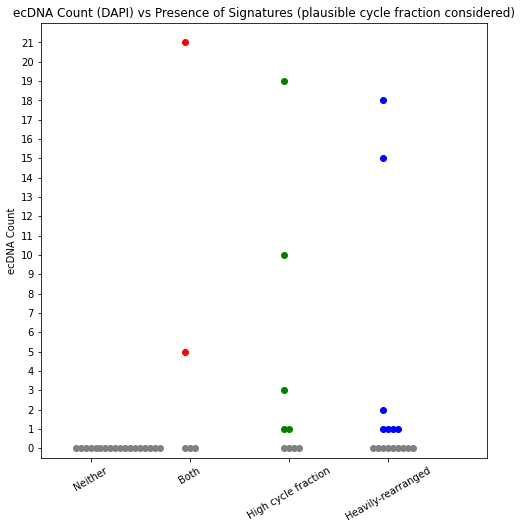

In [16]:
plt.figure(figsize=(8,8))
neither_counts = {}
both_counts = {}
chromo_counts = {}
cycle_counts = {}
for i, row in test_summary.iterrows():
    offset = 0.1
    if row['n_trans/n_cn_states'] < 4 and max(row['cycle_frac'],row['plausible_frac']) < 0.2:
        if not row['ecDNACount (DAPI)'] in neither_counts:
            neither_counts[row['ecDNACount (DAPI)']] = 1
        else:
            neither_counts[row['ecDNACount (DAPI)']] += 1
        if row['ecDNACount (DAPI)'] > 0:
            color = 'orange'
        else:
            color='grey'
            offset = 0.2
        plt.scatter(0.5 - offset + neither_counts[row['ecDNACount (DAPI)']]/20,row['ecDNACount (DAPI)'],color=color)
        
    elif max(row['cycle_frac'],row['plausible_frac']) < 0.2 and row['n_trans/n_cn_states'] >= 4 :
        if not row['ecDNACount (DAPI)'] in chromo_counts:
            chromo_counts[row['ecDNACount (DAPI)']] = 1
        else:
            chromo_counts[row['ecDNACount (DAPI)']] += 1
        if row['ecDNACount (DAPI)'] > 0:
            color = 'blue'
        else:
            color='grey'
            offset = 0.2
        plt.scatter(3.5 - offset + chromo_counts[row['ecDNACount (DAPI)']]/20,row['ecDNACount (DAPI)'],color=color)
        
    elif row['n_trans/n_cn_states'] < 4 and max(row['cycle_frac'],row['plausible_frac']) >= 0.2 :
        if not row['ecDNACount (DAPI)'] in cycle_counts:
            cycle_counts[row['ecDNACount (DAPI)']] = 1
        else:
            cycle_counts[row['ecDNACount (DAPI)']] += 1
        if row['ecDNACount (DAPI)'] > 0:
            color = 'green'
        else:
            color='grey'
            offset = 0.1
        plt.scatter(2.5 - offset  + cycle_counts[row['ecDNACount (DAPI)']]/20,row['ecDNACount (DAPI)'],color=color)
    else:
        print(row['Sample'],row['ecDNACount (DAPI)'], row['Gene'], row['n_trans/n_cn_states'], row['cycle_frac'], row['plausible_frac'])
        if not row['ecDNACount (DAPI)'] in both_counts:
            both_counts[row['ecDNACount (DAPI)']] = 1
        else:
            both_counts[row['ecDNACount (DAPI)']] += 1
        if row['ecDNACount (DAPI)'] > 0:
            color = 'red'
        else:
            color='grey'
            offset = 0.1
        plt.scatter(1.5 - offset + both_counts[row['ecDNACount (DAPI)']]/20,row['ecDNACount (DAPI)'],color=color)
        
            
        
plt.xlim(0,4.5)
plt.ylim(-0.5,22)

x = np.array([0.5,1.5,2.5,3.5])
y = np.arange(0,22,1)
plt.yticks(y)
my_xticks = ['Neither','Both','High cycle fraction','Heavily-rearranged']
plt.xticks(x, my_xticks, rotation=30)
plt.ylabel("ecDNA Count")
plt.title("ecDNA Count (DAPI) vs Presence of Signatures (plausible cycle fraction considered)")
        

In [18]:
neither_counts

{0: 14, 19: 1}

In [19]:
test_summary[test_summary['ecDNACount (DAPI)'] == 19]

Unnamed: 0 Sample Gene    Run Classification ModifiedClassification  \
42          32  MB002  MYC  FF-27       Circular               Circular   

    ecDNACount (DAPI)  foldback_reads   Amplicon AC_class  ... n_oscillations  \
42                 19               0  amplicon1   Cyclic  ...              1   

   Chromothripsis  n_transitions n_transitions_greater_15  num_segs  \
42          False             26                     True        28   

    n_cn_states  n_trans/n_cn_states  \
42           14             1.857143   

                             VB Notes on cytogenetics  \
42  Cytogenetics shows mostly ecDNA with agglomera...   

                                             VB Notes Bhargavi todo/notes  
42  AA shows many cycles in a large region. Double...                 NaN  

[1 rows x 31 columns]

In [32]:
conv_file = "data/Turner2017/AA_data/KT48/KT48_amplicon1_cycles_converted_cycles.txt"
graph_file = "data/Turner2017/AA_data/KT48/KT48_amplicon1_graph.txt"
s,c  = context_explore.readConvertedCycles(conv_file, graph_file)
context_explore.cycleFractionTable(c,s)

Cycle     Size  Circular  CN Fraction
2      3   981Kbp     False     0.297071
1      2   821Kbp      True     0.269813
3      4   476Kbp      True     0.132628
4      5   332Kbp     False     0.077545
6      7  1269Kbp     False     0.066307
7      8  1324Kbp     False     0.054171
5      6   163Kbp      True     0.010568
0      1     0Kbp      True     0.000000

In [38]:
gene_sheet.loc[(gene_sheet['gene'] == 'ERBB') & (gene_sheet['sample_name'].str.startswith('FF-23'))].shape

(0, 6)

In [22]:
AA_DATA_DIR = "/Users/bhargavi/Documents/Research/Amplicon/data/Turner2017/AA_data/"
AA_folders = os.listdir(AA_DATA_DIR)
test_files = []
df_rows=[]
chromothrip = False
for sample in AA_folders:
    if not sample.startswith("."):
        
        graph_files = [file for file in os.listdir(os.path.join(AA_DATA_DIR, sample)) if "graph.txt" in file]
        conv_files = [file.split("graph")[0]+ "cycles_converted_cycles.txt" for file in graph_files]
        
        
        
        for i in range(len(graph_files)):
            
            s,c = readConvertedCycles(os.path.join(AA_DATA_DIR, sample,conv_files[i])\
                                      , os.path.join(AA_DATA_DIR, sample, graph_files[i]))
            #print(conv_files[i].split("/")[-1])

            filename = graph_files[i].split("/")[-1]
            sample_amp = filename.split("_graph")[0] 
            sample, amp = sample_amp.split("_amplicon")
            class_row = amplicon_class.loc[(amplicon_class['sample_name'] == sample) &\
                                           (amplicon_class['amplicon_number'] == "amplicon"+amp)]
            
            test_row = test_sheet.loc[(test_sheet[''])]

            frac_table = cycleFractionTable(c,s)
            largest_cyc_size = 0
            cycle_frac = 0
            circular_frac = frac_table[frac_table['Circular']]
            if circular_frac.shape[0] > 0:
                largest_cyc_size = circular_frac['Size'].iloc[0]
                cycle_frac = circular_frac['CN Fraction'].iloc[0]

            df_rows.append([sample, int(amp), class_row['amplicon_decomposition_class'].iloc[0],class_row['ecDNA+'].iloc[0],\
                           class_row['BFB+'].iloc[0], class_row['ecDNA_amplicons'].iloc[0], largest_cyc_size, \
                            float(cycle_frac), isEpisome(cycleFractionTable(c,s)),chromothrip ])

            png = sample_amp + ".png"
            if isEpisome(cycleFractionTable(c,s)):
                print(sample_amp + ", " +class_row['amplicon_decomposition_class'].iloc[0]+", "\
                      + "ecDNA "+class_row['ecDNA+'].iloc[0]+", BFB "+class_row['BFB+'].iloc[0] )
                print("\n")
                print(cycleFractionTable(c,s))
                #display(Image(filename=IMAGE_DIR + png))
                print("\n")
                print("\n")

        
        
            max_cont, n_osc, n_seg, something , sdict, len_cns = \
            oscillating_cn(os.path.join(AA_DATA_DIR, sample, graph_files[i]), show_plot = False)
           
            if max_cont > 5 and n_osc >= 8:
                state_cns_len = 0
                j = 0
                for key in sdict:
                    #if j <= 3:
                    if not round(key) <= 2:
                        state_cns_len += sdict[key]
                        #j += 1
                if state_cns_len/len_cns > 0.4:
                    test_files.append(graph_files[i])

FF-4_amplicon1, Cyclic, ecDNA Positive, BFB None detected


   Cycle     Size  Circular  CN Fraction
0      1  1257Kbp      True     0.847666
1      2  1258Kbp      True     0.117164




FF-5_amplicon1, Cyclic, ecDNA Positive, BFB None detected


   Cycle     Size  Circular  CN Fraction
0      1  1192Kbp      True     0.828902
1      2  1194Kbp      True     0.120494




FF-18_amplicon1, Cyclic, ecDNA Positive, BFB None detected


   Cycle     Size  Circular  CN Fraction
0      1  1257Kbp      True     0.893718
1      2  1258Kbp      True     0.061014




FF-92_amplicon1, Cyclic, ecDNA Positive, BFB None detected


   Cycle     Size  Circular  CN Fraction
0      1  5481Kbp      True     0.729341
2      3  5481Kbp     False     0.111144
6      7  3992Kbp     False     0.034316
5      6  3208Kbp     False     0.030396
4      5  1504Kbp      True     0.015953
3      4   208Kbp     False     0.002618
1      2     0Kbp     False     0.000000




FF-92_amplicon2, Cyclic, ecDNA Positive, BFB 

In [24]:
df_rows

[['FF-4',
  1,
  'Cyclic',
  'Positive',
  'None detected',
  1,
  '1257Kbp',
  0.8476662957675727,
  True,
  False],
 ['FF-3',
  1,
  'Cyclic',
  'Positive',
  'None detected',
  1,
  '1075Kbp',
  0.22596701578833714,
  False,
  False],
 ['FF-5',
  2,
  'Cyclic',
  'Positive',
  'None detected',
  1,
  '82Kbp',
  0.01970145455793173,
  False,
  False],
 ['FF-5',
  1,
  'Cyclic',
  'Positive',
  'None detected',
  1,
  '1192Kbp',
  0.8289022331942517,
  True,
  False],
 ['FF-89',
  1,
  'Linear amplification',
  'None detected',
  'None detected',
  0,
  0,
  0.0,
  False,
  False],
 ['FF-89',
  6,
  'Linear amplification',
  'None detected',
  'None detected',
  0,
  0,
  0.0,
  False,
  False],
 ['FF-89',
  5,
  'Complex non-cyclic',
  'None detected',
  'None detected',
  0,
  0,
  0.0,
  False,
  False],
 ['FF-89',
  3,
  'Linear amplification',
  'None detected',
  'None detected',
  0,
  0,
  0.0,
  False,
  False],
 ['FF-89',
  4,
  'Cyclic',
  'Positive',
  'None detected',
  2

In [58]:
test_files = []
for i in range(len(graph_files)):
    max_cont, n_osc, n_seg, something , sdict, len_cns = oscillating_cn(graph_files[i], show_plot = False)
   
    if max_cont > 5 and n_osc > 10:
        state_cns_len = 0
        j = 0
        for key in sdict:
            #if j <= 3:
            if not round(key) <= 2:
                state_cns_len += sdict[key]
                #j += 1
        if state_cns_len/len_cns > 0.4:
            test_files.append(i)

In [59]:
len(test_files)

12

     Cycle     Size  Circular  CN Fraction
13      14  2202Kbp      True     0.133002
149    150  6592Kbp     False     0.075855
33      34  1548Kbp     False     0.051704
99     100  3209Kbp      True     0.049861
148    149  4011Kbp     False     0.046368
..     ...      ...       ...          ...
94      95     0Kbp      True     0.000000
95      96     0Kbp      True     0.000000
96      97     0Kbp      True     0.000000
97      98     0Kbp      True     0.000000
118    119     0Kbp      True     0.000000

[237 rows x 4 columns]
NCIH2171_LUNG_AA_amplicon7, Cyclic, ecDNA Positive, BFB None detected


Oscillations with length > 3:
#Segs	Max CN	Min CN
4	23.61	21.15
4	10.54	6.86
4	10.18	7.25
4	19.84	15.72
4	22.6	18.63
6	13.64	9.42
4	9.95	6.34
4	13.26	9.96
4	10.66	7.17


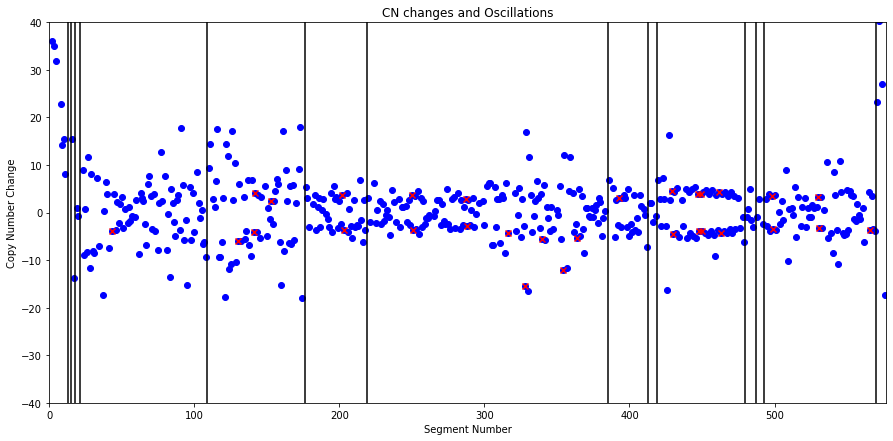



Total number of segments: 576
State	#Segs:
6.93	63
10.3	53
15.72	41
19.56	39
13.45	39
23.11	28




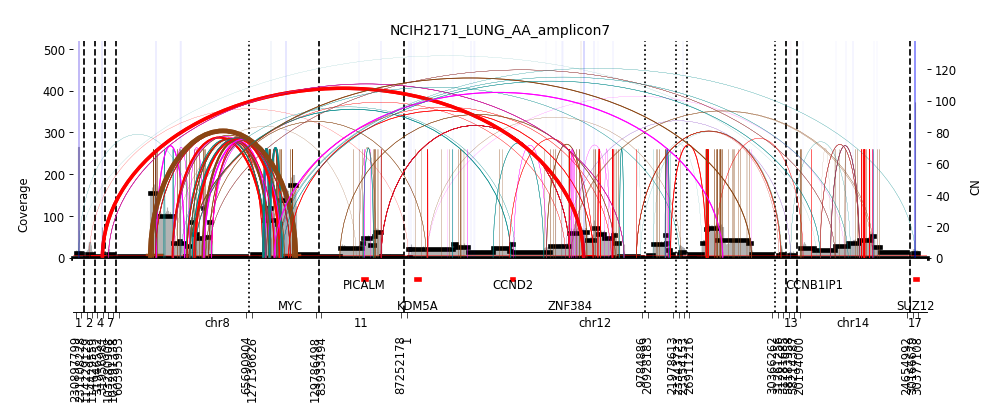





     Cycle      Size  Circular  CN Fraction
46      47  25219Kbp     False     0.190146
146    147  27359Kbp     False     0.105853
66      67  17243Kbp     False     0.098168
54      55  15862Kbp     False     0.097051
99     100  20315Kbp     False     0.091274
..     ...       ...       ...          ...
63      64      0Kbp      True     0.000000
62      63      0Kbp      True     0.000000
61      62      0Kbp      True     0.000000
60      61      0Kbp      True     0.000000
75      76      0Kbp      True     0.000000

[151 rows x 4 columns]
NCIH1876_LUNG_AA_amplicon1, Complex non-cyclic, ecDNA None detected, BFB None detected


Oscillations with length > 3:
#Segs	Max CN	Min CN
4	6.83	5.57
6	6.61	5.56
4	6.74	5.56


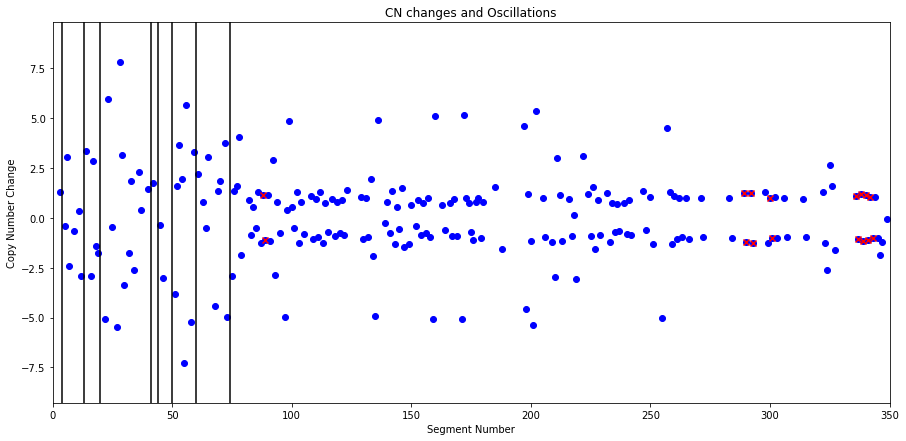



Total number of segments: 349
State	#Segs:
5.56	205
6.73	162




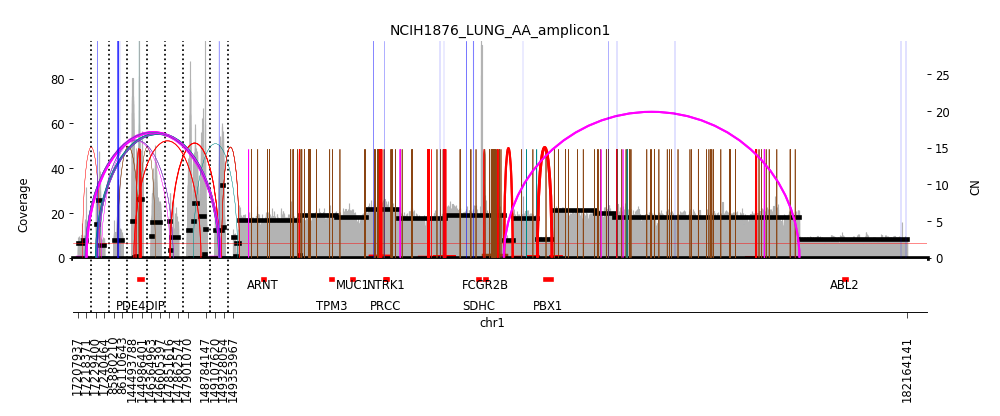





    Cycle      Size  Circular  CN Fraction
69     70  36813Kbp     False     0.128605
4       5   4099Kbp      True     0.123791
7       8   4099Kbp      True     0.088003
55     56  13653Kbp     False     0.087789
73     74  27768Kbp     False     0.079339
..    ...       ...       ...          ...
47     48      0Kbp      True     0.000000
46     47      0Kbp      True     0.000000
45     46      0Kbp      True     0.000000
44     45      0Kbp      True     0.000000
18     19      0Kbp      True     0.000000

[130 rows x 4 columns]
DMS273_LUNG_AA_amplicon12, Cyclic, ecDNA Positive, BFB None detected


Oscillations with length > 3:
#Segs	Max CN	Min CN
6	2.77	1.48
4	9.7	2.85
4	9.08	2.91
4	9.06	3.17
8	3.14	1.61


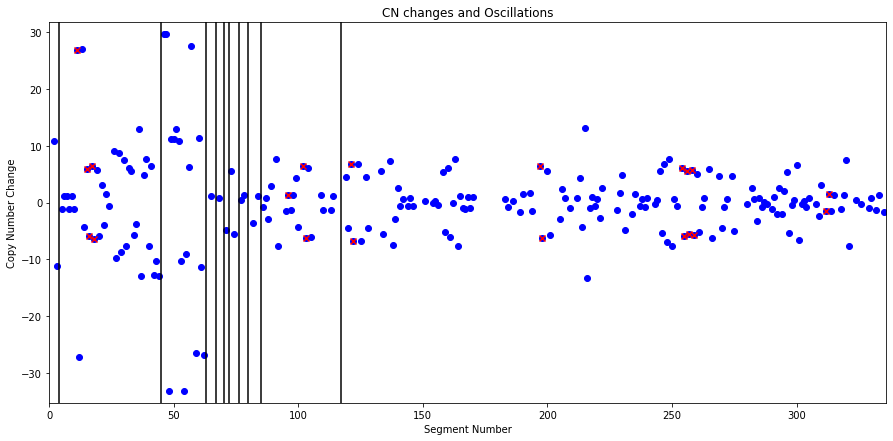



Total number of segments: 335
State	#Segs:
3.08	206
1.55	90
9.23	17




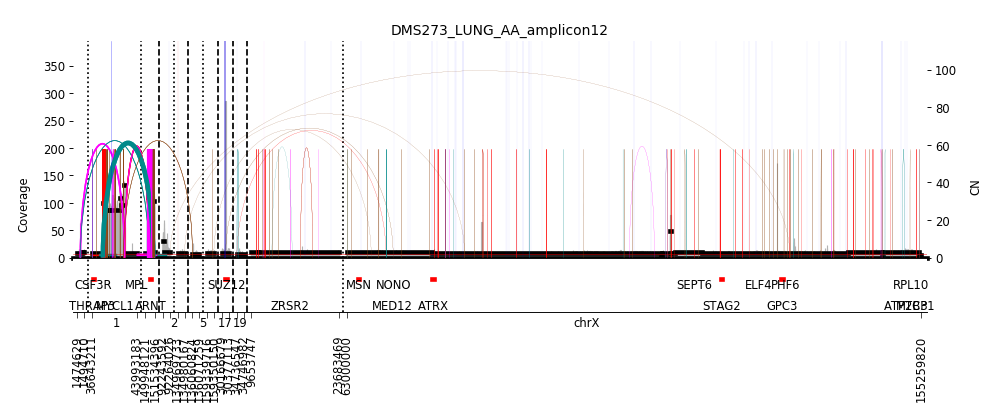





    Cycle     Size  Circular  CN Fraction
31     32  9077Kbp      True     0.113359
17     18  5397Kbp     False     0.081242
34     35  4892Kbp     False     0.059262
10     11  3099Kbp      True     0.055450
5       6  2234Kbp     False     0.046338
..    ...      ...       ...          ...
84     85     0Kbp      True     0.000000
83     84     0Kbp      True     0.000000
82     83     0Kbp      True     0.000000
30     31     0Kbp      True     0.000000
0       1     0Kbp     False     0.000000

[159 rows x 4 columns]
RERFGC1B_STOMACH_AA_amplicon10, Cyclic, ecDNA Positive, BFB None detected


Oscillations with length > 3:
#Segs	Max CN	Min CN
4	15.45	12.71
4	8.77	7.43
4	10.56	9.53
6	8.8	7.72


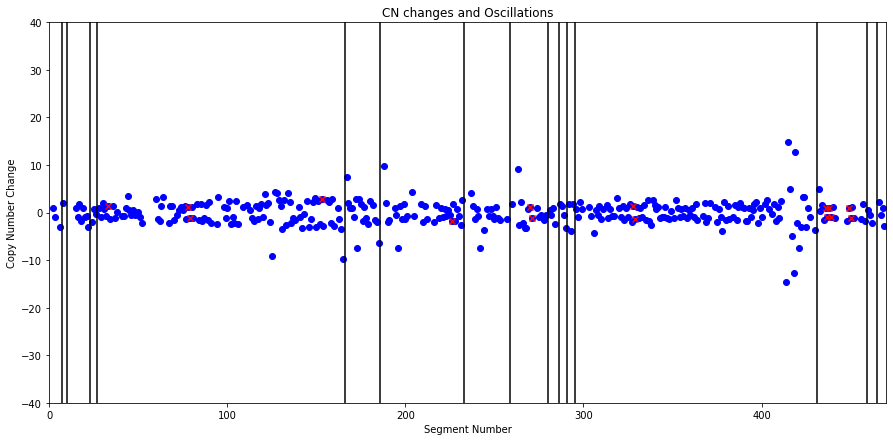



Total number of segments: 469
State	#Segs:
8.09	106
10.05	92
15.45	25
12.71	24




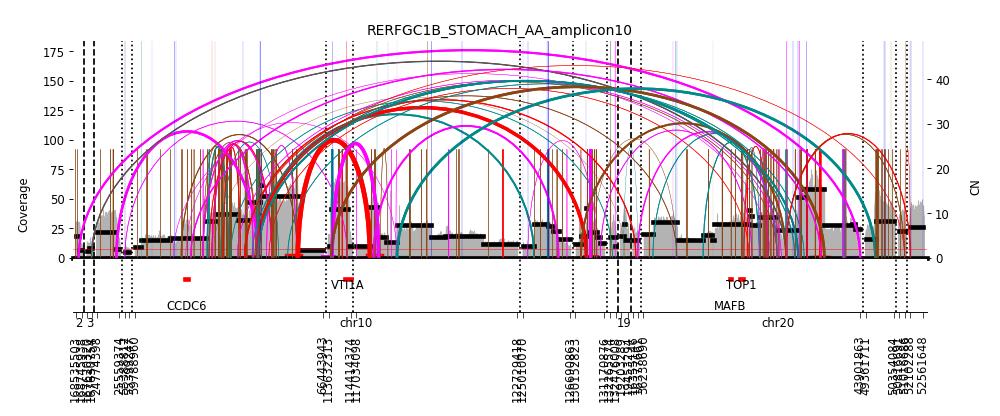





    Cycle     Size  Circular  CN Fraction
2       3  1711Kbp      True     0.422025
1       2  1317Kbp      True     0.329151
0       1   408Kbp      True     0.102324
14     15    16Kbp      True     0.002243
11     12    14Kbp      True     0.002127
..    ...      ...       ...          ...
72     73     3Kbp      True     0.000180
74     75     3Kbp      True     0.000179
80     81     3Kbp      True     0.000169
81     82     3Kbp      True     0.000169
52     53     0Kbp     False     0.000000

[88 rows x 4 columns]
NCIH2170_LUNG_AA_amplicon1, Cyclic, ecDNA Positive, BFB None detected


Oscillations with length > 3:
#Segs	Max CN	Min CN
4	124.34	110.98
4	135.41	110.98
4	131.45	110.98
4	245.49	213.45
4	257.93	213.45
6	261.82	211.77
4	251.32	211.77
4	280.11	211.77
4	273.41	211.77
4	273.61	211.77
8	260.44	211.77
8	260.79	211.77
6	245.13	211.77
4	246.96	211.77
4	256.97	211.77
4	232.42	211.77
4	229.0	211.77
4	162.49	125.43


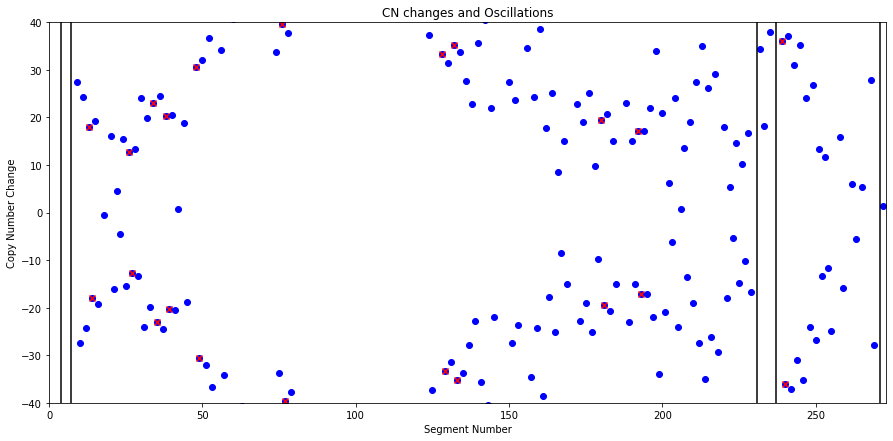



Total number of segments: 272
State	#Segs:
211.77	79
110.98	21
124.88	14
257.45	6
246.13	6
260.96	6
232.42	4
131.45	3
273.51	3
229.0	3
135.41	2
251.32	2
280.11	1
162.49	1




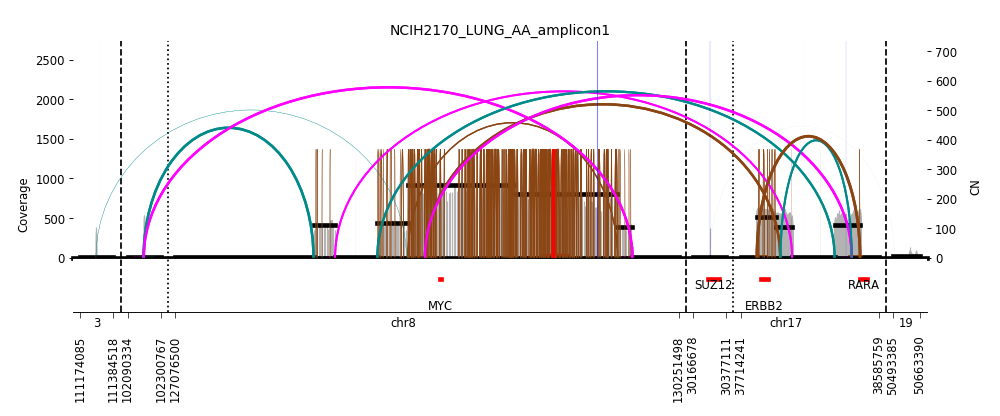





     Cycle     Size  Circular  CN Fraction
92      93  6751Kbp     False     0.116302
26      27  2849Kbp      True     0.111308
4        5   886Kbp      True     0.070805
212    213  5025Kbp     False     0.065477
269    270  4645Kbp     False     0.044537
..     ...      ...       ...          ...
151    152     0Kbp      True     0.000000
152    153     0Kbp      True     0.000000
153    154     0Kbp      True     0.000000
154    155     0Kbp      True     0.000000
167    168     0Kbp      True     0.000000

[334 rows x 4 columns]
NCIH510_LUNG_AA_amplicon2, Cyclic, ecDNA Positive, BFB None detected


Oscillations with length > 3:
#Segs	Max CN	Min CN
6	7.02	4.67
6	10.59	7.14
8	10.82	7.13
4	10.58	7.13
8	10.1	7.13
4	11.37	8.31
4	7.69	4.49
4	12.3	8.49
10	11.34	8.49
4	11.99	8.49
4	11.5	8.49
4	12.16	8.49
6	11.02	7.57
8	73.13	61.93
4	78.9	61.93
4	79.74	61.93
4	70.06	61.93
4	71.96	61.93
6	50.91	44.81
6	20.09	15.96
4	15.19	11.94
6	12.07	8.68
4	17.5	13.66
6	19.31	15.54
4	72.93	58.9
4	70.2

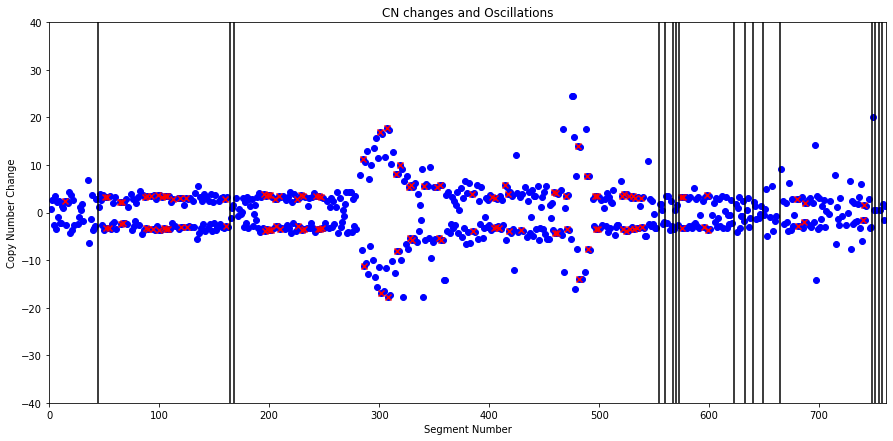



Total number of segments: 760
State	#Segs:
6.89	148
10.21	125
4.96	103
13.65	38
16.04	35
62.22	24
19.7	13
72.74	9
58.9	9
44.81	7
50.91	7
70.17	6
79.32	4




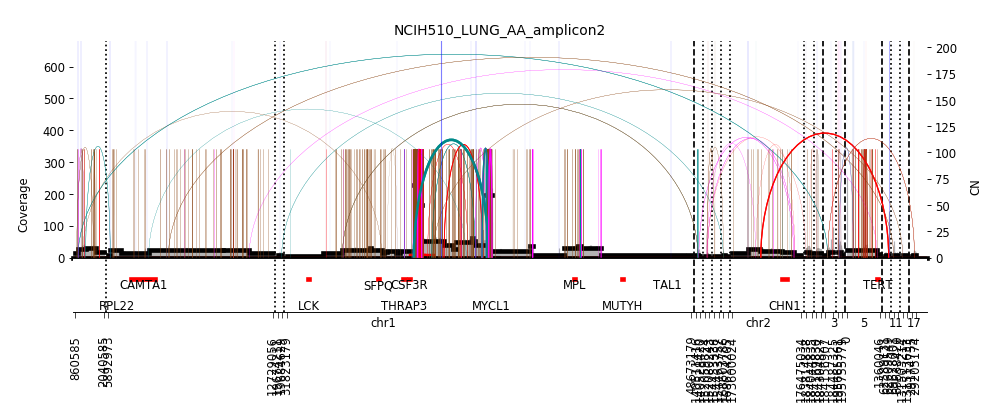





     Cycle      Size  Circular  CN Fraction
15      16   9539Kbp      True     0.070901
113    114  27007Kbp     False     0.033310
45      46   8137Kbp     False     0.029733
33      34   5845Kbp      True     0.027119
14      15   3443Kbp     False     0.026493
..     ...       ...       ...          ...
139    140      4Kbp     False     0.000003
119    120      1Kbp      True     0.000001
39      40      0Kbp     False     0.000000
52      53      0Kbp     False     0.000000
98      99      0Kbp      True     0.000000

[169 rows x 4 columns]
HCC1419_BREAST_AA_amplicon6, Cyclic, ecDNA Positive, BFB None detected


Oscillations with length > 3:
#Segs	Max CN	Min CN
4	14.95	6.88
5	19.6	0.03
4	19.08	14.26
4	21.5	2.26
6	11.9	7.83
4	13.51	7.66
4	9.83	0.01
4	11.6	2.86


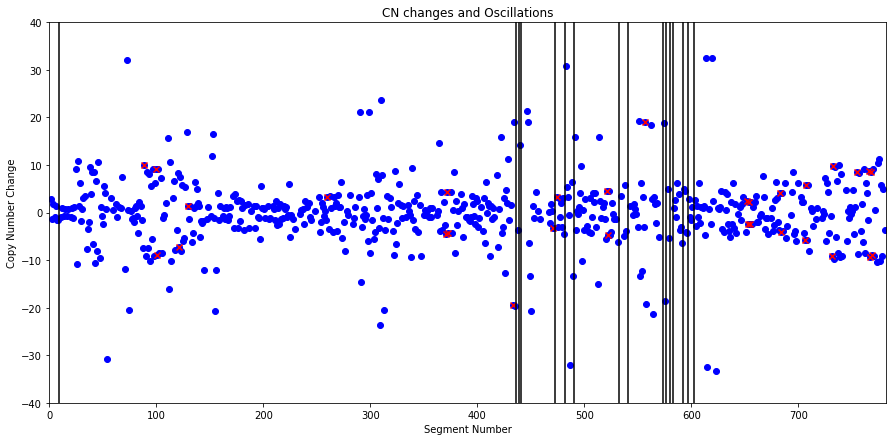



Total number of segments: 781
State	#Segs:
2.56	133
7.51	119
9.83	84
11.75	79
14.06	49
19.34	24
21.5	13
0.02	10




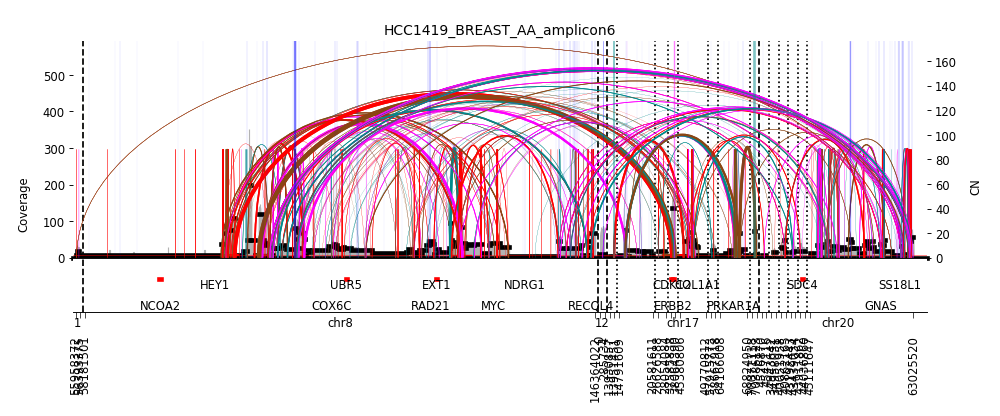





    Cycle      Size  Circular  CN Fraction
36     37   7829Kbp      True     0.142486
30     31   5543Kbp     False     0.122903
19     20   3185Kbp     False     0.095146
25     26   3162Kbp     False     0.075024
14     15   1866Kbp      True     0.064823
42     43   4056Kbp     False     0.063389
49     50   6506Kbp     False     0.051243
24     25   1682Kbp     False     0.044252
59     60  11283Kbp      True     0.040160
27     28   1135Kbp      True     0.026346
40     41   1378Kbp     False     0.022288
13     14    533Kbp     False     0.018530
7       8    267Kbp     False     0.017413
54     55   2807Kbp     False     0.014671
51     52   1440Kbp     False     0.010685
9      10    163Kbp     False     0.008993
57     58   1582Kbp     False     0.007814
22     23    270Kbp     False     0.007477
15     16    206Kbp     False     0.007025
17     18    210Kbp     False     0.006936
4       5     67Kbp     False     0.006907
12     13    169Kbp     False     0.006791
58     

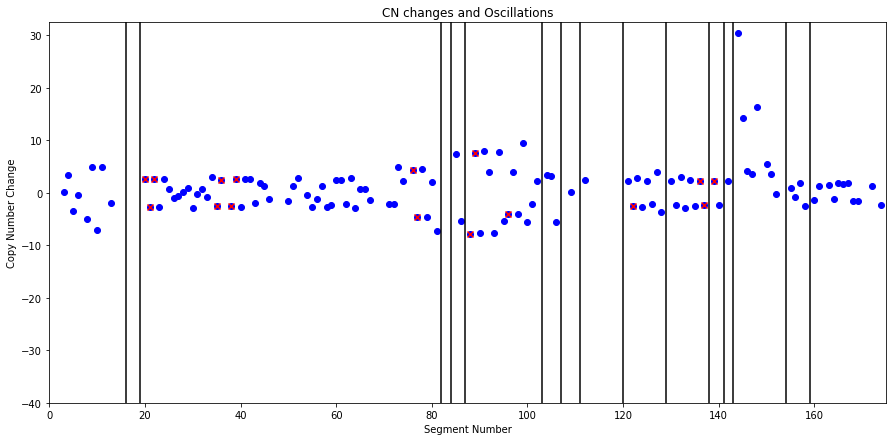



Total number of segments: 174
State	#Segs:
4.22	56
1.7	46
6.95	31
11.72	6




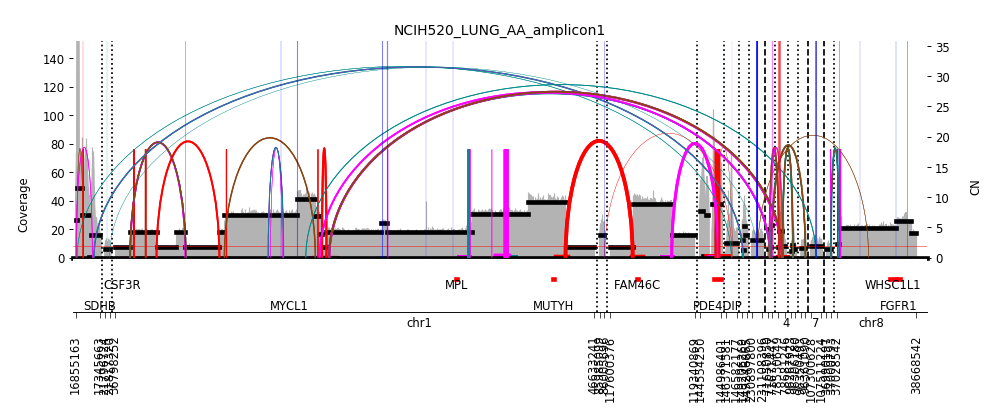





     Cycle      Size  Circular  CN Fraction
6        7   5459Kbp     False     0.095465
118    119  12427Kbp      True     0.076025
155    156  10601Kbp      True     0.055391
9       10   3411Kbp     False     0.054703
133    134   9202Kbp     False     0.053925
..     ...       ...       ...          ...
142    143      0Kbp      True     0.000000
143    144      0Kbp      True     0.000000
144    145      0Kbp      True     0.000000
145    146      0Kbp      True     0.000000
151    152      0Kbp      True     0.000000

[303 rows x 4 columns]
NCIH510_LUNG_AA_amplicon6, Cyclic, ecDNA Positive, BFB None detected


Oscillations with length > 3:
#Segs	Max CN	Min CN
4	10.21	8.56
8	9.6	8.56
4	9.56	7.14
4	9.78	8.09
4	7.06	5.48
4	9.57	8.25
6	5.57	4.27
4	5.71	4.27
4	8.04	6.91
4	8.19	6.91
4	7.9	5.78


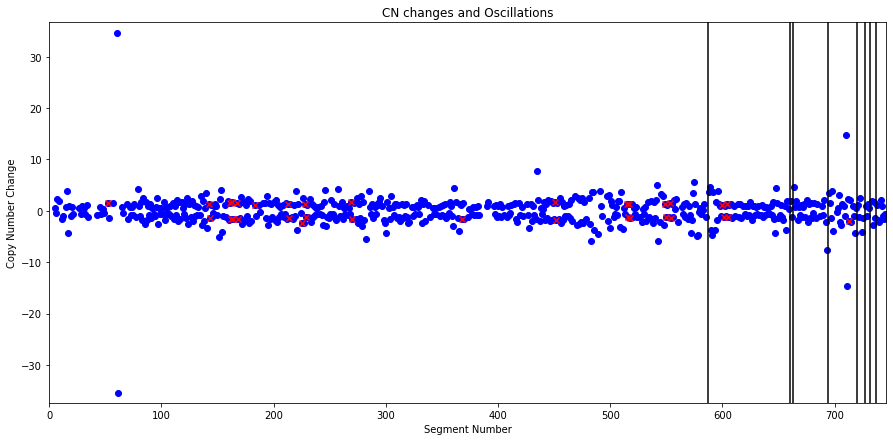



Total number of segments: 745
State	#Segs:
7.63	209
9.66	161
5.29	127




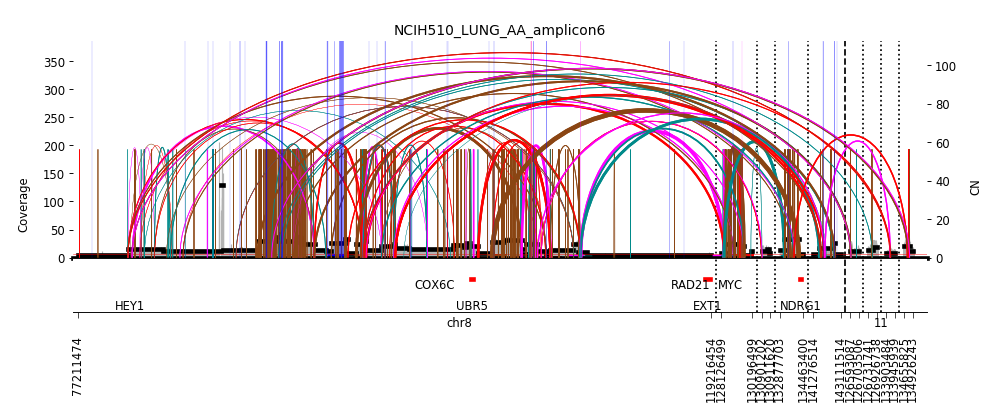





     Cycle      Size  Circular  CN Fraction
28      29  21022Kbp     False     0.467196
136    137  21035Kbp     False     0.140060
46      47   4261Kbp     False     0.062660
155    156   9416Kbp     False     0.020844
156    157   8488Kbp      True     0.017847
..     ...       ...       ...          ...
73      74      0Kbp      True     0.000000
74      75      0Kbp      True     0.000000
75      76      0Kbp      True     0.000000
76      77      0Kbp      True     0.000000
98      99      0Kbp      True     0.000000

[196 rows x 4 columns]
HEPG2_LIVER_AA_amplicon12, Complex non-cyclic, ecDNA None detected, BFB None detected


Oscillations with length > 3:
#Segs	Max CN	Min CN
4	4.89	1.57
4	6.65	5.25
4	6.28	5.27
4	6.54	5.29
6	6.57	4.8
4	6.35	5.32
4	5.56	4.3
4	5.26	4.04


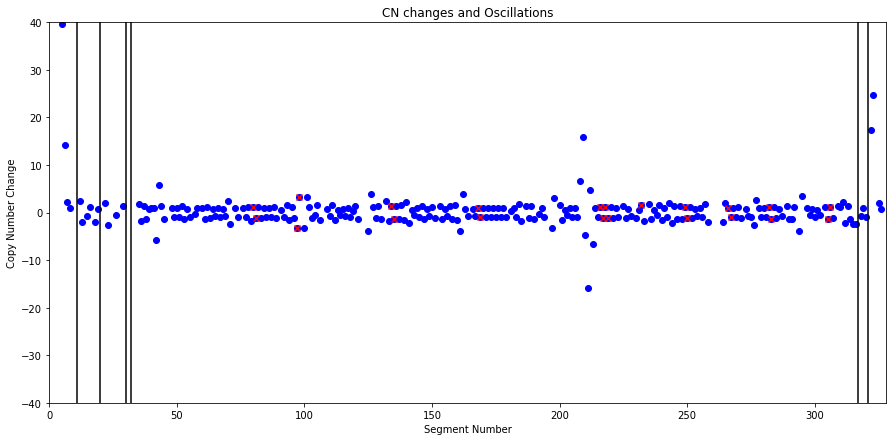



Total number of segments: 327
State	#Segs:
4.57	154
1.57	20




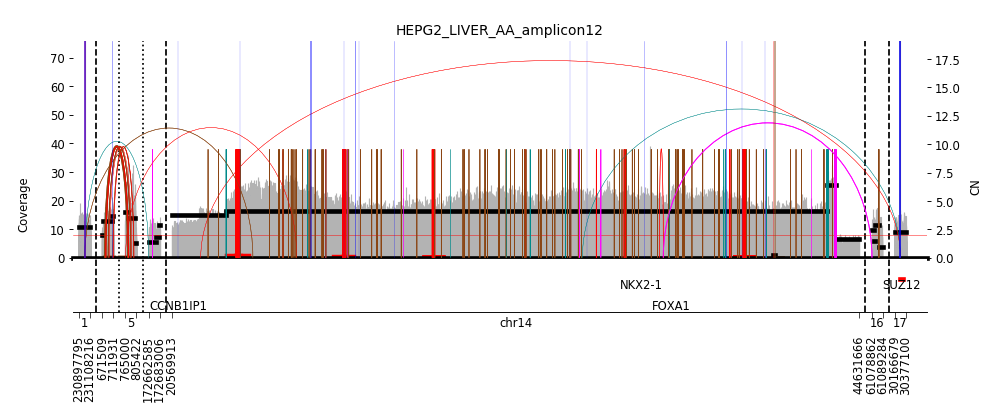





     Cycle      Size  Circular  CN Fraction
122    123  23430Kbp     False     0.043295
116    117  21213Kbp     False     0.040640
34      35   6043Kbp      True     0.031857
28      29   5220Kbp     False     0.031377
148    149  21212Kbp     False     0.030819
..     ...       ...       ...          ...
11      12      0Kbp     False     0.000000
12      13      0Kbp     False     0.000000
16      17      0Kbp     False     0.000000
13      14      0Kbp     False     0.000000
0        1      0Kbp     False     0.000000

[245 rows x 4 columns]
UACC812_BREAST_AA_amplicon14, Cyclic, ecDNA Positive, BFB None detected


Oscillations with length > 3:
#Segs	Max CN	Min CN
4	5.4	0.0
4	5.91	2.49
5	3.89	0.13
4	3.22	1.36
5	5.68	2.59
5	2.64	1.35
4	2.57	0.01
6	2.75	0.2
4	2.74	0.01


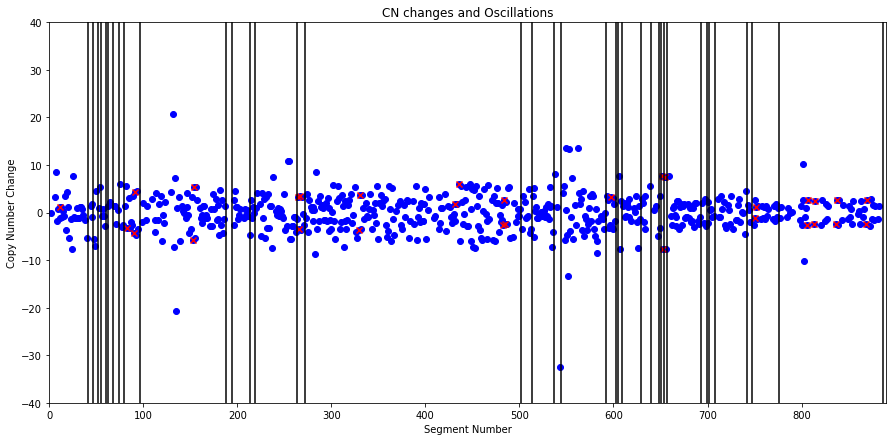



Total number of segments: 889
State	#Segs:
2.73	219
5.67	180
0.19	43




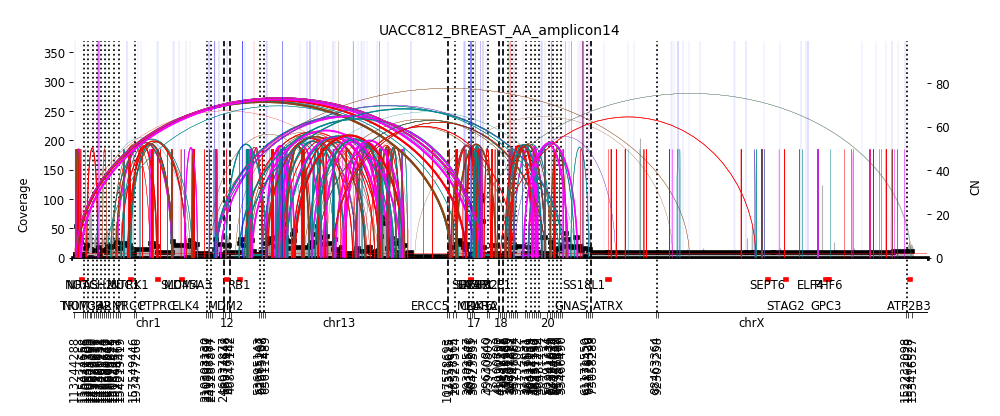





     Cycle     Size  Circular  CN Fraction
21      22  4265Kbp     False     0.126304
16      17  2984Kbp     False     0.103381
24      25  3563Kbp     False     0.096097
77      78  4676Kbp     False     0.057821
34      35  2315Kbp     False     0.053332
..     ...      ...       ...          ...
116    117     0Kbp      True     0.000000
115    116     0Kbp      True     0.000000
58      59     0Kbp      True     0.000000
113    114     0Kbp      True     0.000000
108    109     0Kbp      True     0.000000

[216 rows x 4 columns]
NCIH2066_LUNG_AA_amplicon2, Cyclic, ecDNA Positive, BFB None detected


Oscillations with length > 3:
#Segs	Max CN	Min CN
4	6.87	5.86
4	4.93	3.53
4	19.4	17.4
4	13.26	11.58
6	8.24	6.98


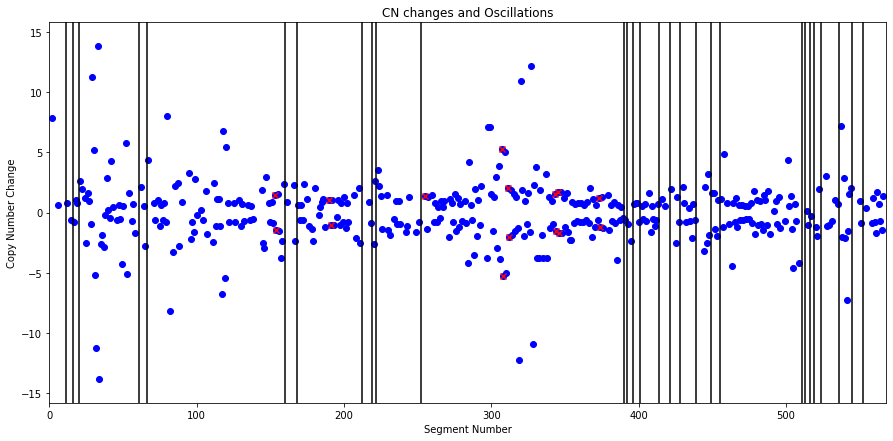



Total number of segments: 567
State	#Segs:
7.27	172
4.46	128
18.4	20
12.42	17




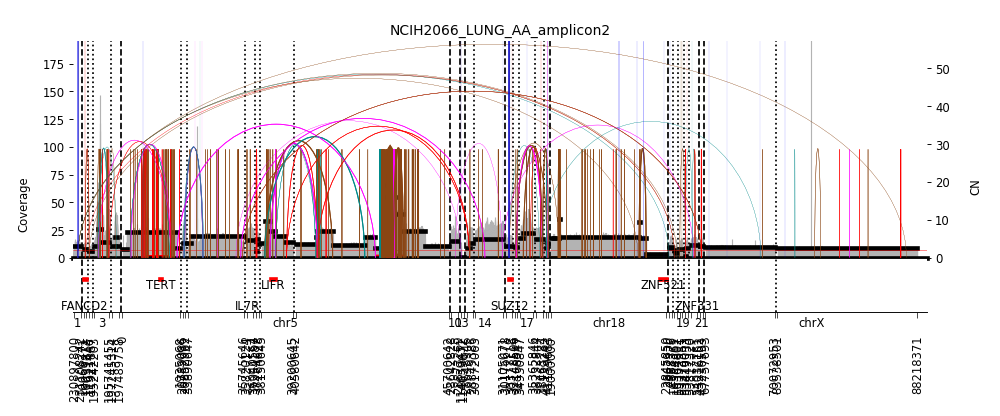

In [77]:
for i in test_files:
    graphf = graph_files[i]
    cyclesf = conv_files[i]
    s,c = readConvertedCycles(cyclesf,graphf)
    print(cycleFractionTable(c,s))
    filename = graphf.split("/")[-1]
    sample_amp = filename.split("_graph")[0] 
    sample, amp = sample_amp.split("_amplicon")
    class_row = amplicon_class.loc[(amplicon_class['sample_name'] == sample) &\
                                   (amplicon_class['amplicon_number'] == "amplicon"+amp)]
    png = sample_amp + ".png"

    print(sample_amp + ", " +class_row['amplicon_decomposition_class'].iloc[0]+", "\
          + "ecDNA "+class_row['ecDNA+'].iloc[0]+", BFB "+class_row['BFB+'].iloc[0] )
    print("\n")

        
    filename = graphf.split("/")[-1]
    png = filename.split("_graph")[0] + ".png"
   
   

    max_cont, n_osc, n_seg, n_seg_osc, sdict,  l = oscillating_cn(graphf)
    print("\n")
    print("Total number of segments: " + str(l))
    print("State\t#Segs:")
    for k in sdict:
        print(str(round(k,2)) + "\t"+ str(sdict[k]))
    
    print("\n")


    
    display(Image(filename=IMAGE_DIR + png))
    print("\n")
    print("\n")



In [15]:
amplicon_class = pd.read_csv("/Users/bhargavi/Documents/Research/Amplicon/CCLE/AC_default/\
ccle_amplicon_classification_profiles.tsv", sep='\t')

MSTO211H_PLEURA_AA_amplicon1, Cyclic, ecDNA Positive, BFB None detected


   Cycle    Size  Circular  CN Fraction
0      1  498Kbp      True     0.948266
1      2    4Kbp      True     0.001527


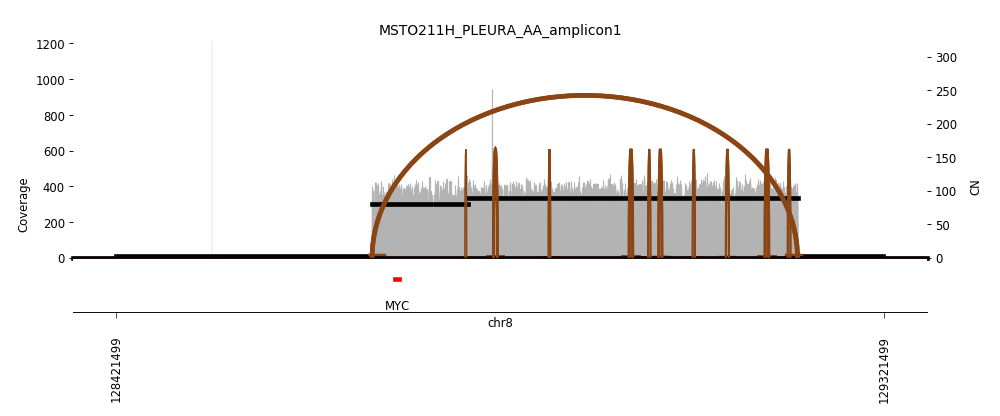





OV90_OVARY_AA_amplicon10, Cyclic, ecDNA None detected, BFB Positive


   Cycle     Size  Circular  CN Fraction
1      2  2353Kbp      True     0.754572
0      1   250Kbp      True     0.115470
2      3   113Kbp     False     0.024654
3      4    90Kbp     False     0.012918


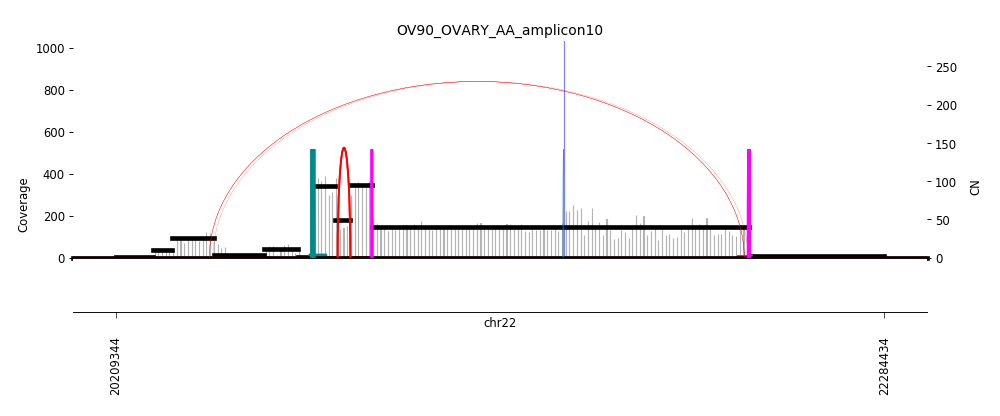





NCIH1792_LUNG_AA_amplicon18, Cyclic, ecDNA Positive, BFB None detected


   Cycle     Size  Circular  CN Fraction
0      1  1073Kbp      True     0.817519
1      2   653Kbp      True     0.044452
3      4   705Kbp      True     0.028358
2      3   509Kbp      True     0.023137


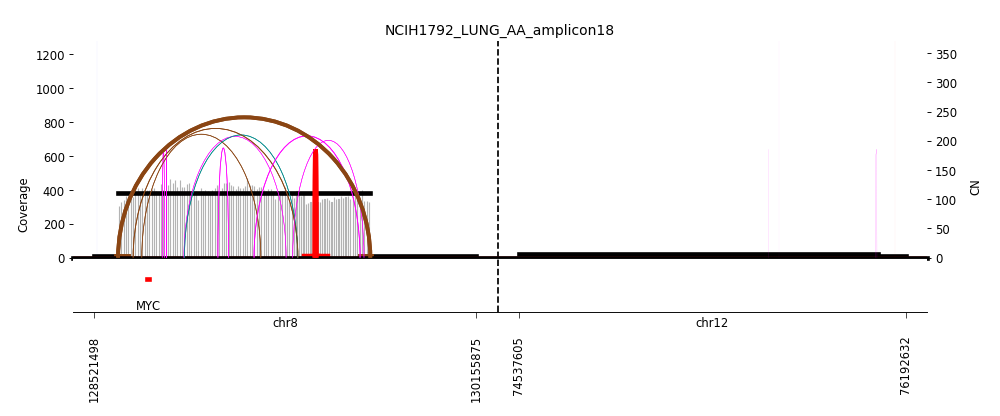





NCIH889_LUNG_AA_amplicon2, Cyclic, ecDNA Positive, BFB None detected


    Cycle    Size  Circular  CN Fraction
0       1  635Kbp      True     0.769625
2       3  351Kbp      True     0.034639
3       4  297Kbp     False     0.025864
8       9  566Kbp     False     0.023063
9      10  560Kbp     False     0.021944
4       5  200Kbp     False     0.012677
10     11  149Kbp     False     0.005024
1       2    9Kbp     False     0.003947
6       7   20Kbp     False     0.000940
7       8   10Kbp     False     0.000457
5       6    7Kbp     False     0.000342


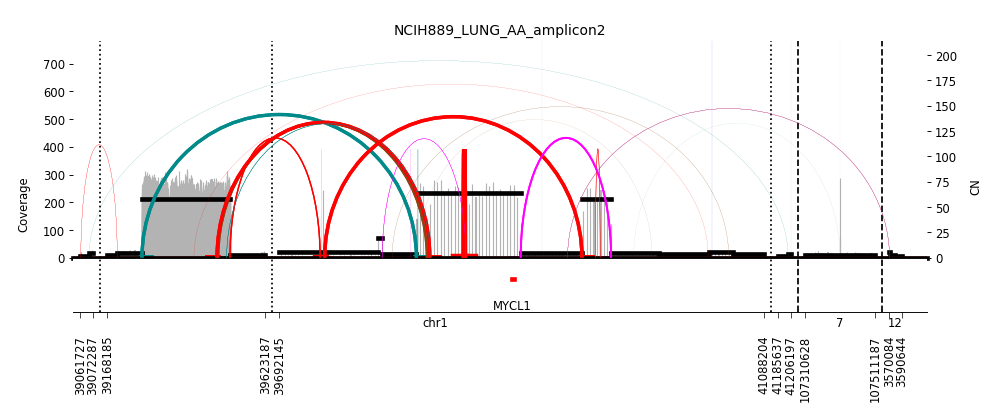





8305C_THYROID_AA_amplicon9, Cyclic, ecDNA Positive, BFB None detected


   Cycle     Size  Circular  CN Fraction
0      1  1946Kbp      True     0.906881


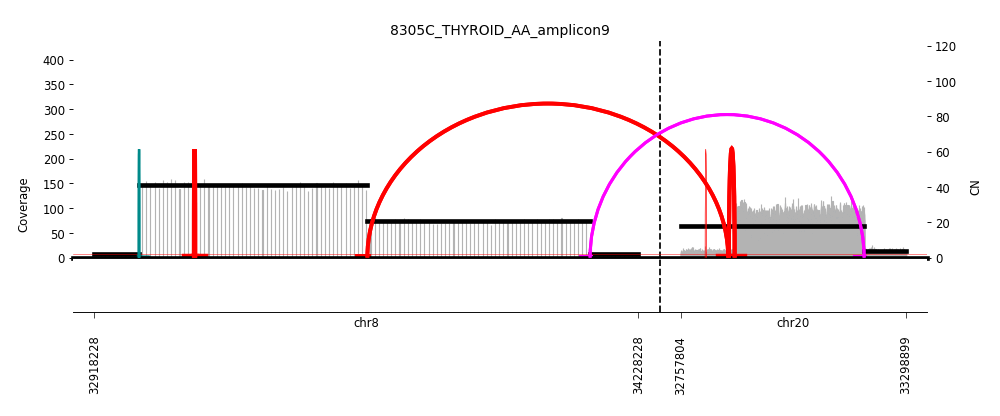





KYSE450_OESOPHAGUS_AA_amplicon1, Cyclic, ecDNA Positive, BFB None detected


   Cycle    Size  Circular  CN Fraction
0      1  928Kbp      True     0.762479
1      2  179Kbp      True     0.103032
9     10  284Kbp     False     0.037440
3      4    2Kbp      True     0.000384
2      3    1Kbp      True     0.000240
5      6    1Kbp      True     0.000158
4      5    0Kbp      True     0.000000
6      7    0Kbp      True     0.000000
7      8    0Kbp      True     0.000000
8      9    0Kbp      True     0.000000


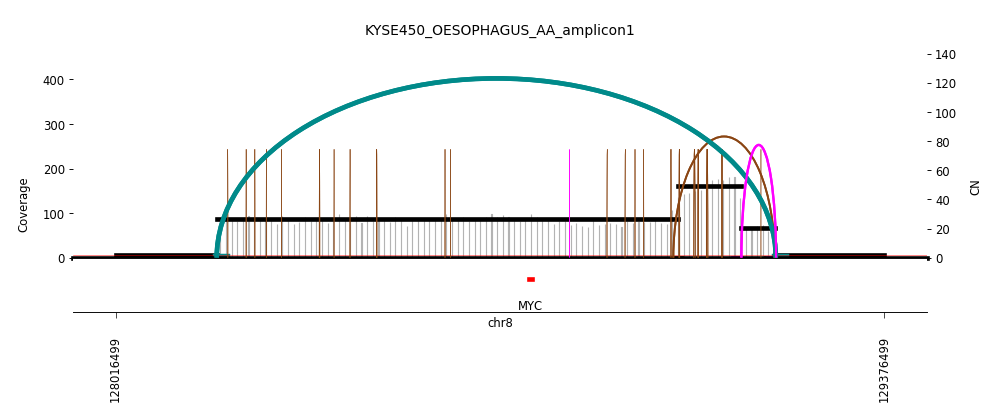





CORL279_LUNG_AA_amplicon6, Cyclic, ecDNA Positive, BFB None detected


   Cycle    Size  Circular  CN Fraction
0      1  623Kbp      True     0.900523
3      4    2Kbp      True     0.000658
1      2    1Kbp      True     0.000387
2      3    0Kbp      True     0.000000


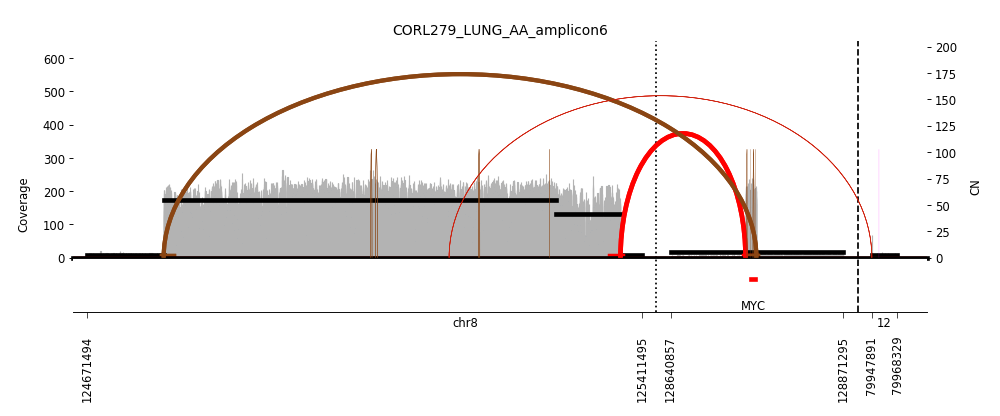

In [121]:
df_cols = ['sample','amplicon_number','amplicon_decomposition_class','ecDNA+','BFB+','ecDNA_amplicons',\
           'largest_cycle_size','largest_cycle_frac','episome','chromothripsis']
df_rows = []
for i in range(len(graph_files)):
    chromothrip = False
    if i in test_files:
        chromothrip = True
    s,c = readConvertedCycles(conv_files[i], graph_files[i])
    #print(conv_files[i].split("/")[-1])
    
    filename = graph_files[i].split("/")[-1]
    sample_amp = filename.split("_graph")[0] 
    sample, amp = sample_amp.split("_amplicon")
    class_row = amplicon_class.loc[(amplicon_class['sample_name'] == sample) &\
                                   (amplicon_class['amplicon_number'] == "amplicon"+amp)]
    
    frac_table = cycleFractionTable(c,s)
    largest_cyc_size = 0
    cycle_frac = 0
    circular_frac = frac_table[frac_table['Circular']]
    if circular_frac.shape[0] > 0:
        largest_cyc_size = circular_frac['Size'].iloc[0]
        cycle_frac = circular_frac['CN Fraction'].iloc[0]
    
    df_rows.append([sample, int(amp), class_row['amplicon_decomposition_class'].iloc[0],class_row['ecDNA+'].iloc[0],\
                   class_row['BFB+'].iloc[0], class_row['ecDNA_amplicons'].iloc[0], largest_cyc_size, \
                    float(cycle_frac), isEpisome(cycleFractionTable(c,s)),chromothrip ])
        
    png = sample_amp + ".png"
    if isEpisome(cycleFractionTable(c,s)):
        print(sample_amp + ", " +class_row['amplicon_decomposition_class'].iloc[0]+", "\
              + "ecDNA "+class_row['ecDNA+'].iloc[0]+", BFB "+class_row['BFB+'].iloc[0] )
        print("\n")
        print(cycleFractionTable(c,s))
        display(Image(filename=IMAGE_DIR + png))
        print("\n")
        print("\n")
        

In [122]:
df = pd.DataFrame(df_rows, columns=df_cols)

In [124]:
df.to_csv("CCLE_summary.csv")

In [91]:
#repeat everything for data2

aa_folders = ['/Users/bhargavi/Documents/Research/Amplicon/data2/M249_samples/M249-VSR-181005-SC1_S7/',
             '/Users/bhargavi/Documents/Research/Amplicon/data2/M249_samples/M249-VSR-SC2-2to01_AA_results/',
             '/Users/bhargavi/Documents/Research/Amplicon/data2/M249_samples/M249-P_S1_AA_results/',
            '/Users/bhargavi/Documents/Research/Amplicon/data2/COLO320DM_LC/COLO320DM_LC_AA_results/',
             '/Users/bhargavi/Documents/Research/Amplicon/data2/HCC827/HCC827_CDK4/AA/',
              '/Users/bhargavi/Documents/Research/Amplicon/data2/HCC827/HCC827_EGFR/AA/',
              '/Users/bhargavi/Documents/Research/Amplicon/data2/HCC827/HCC827_ERBB2/AA/',
              '/Users/bhargavi/Documents/Research/Amplicon/data2/HCC827/HCC827_HMGA2/AA/',
              '/Users/bhargavi/Documents/Research/Amplicon/data2/HCC827/HCC827_MYC/AA/',
             '/Users/bhargavi/Documents/Research/Amplicon/data2/M249_samples/M249-VSR-DM_S2_AA_results/',
             '/Users/bhargavi/Documents/Research/Amplicon/data2/M249_samples/M249-VSR-181005-SC2_S8/',
             '/Users/bhargavi/Documents/Research/Amplicon/data2/RCMB56_P1/RCMB56_P1_AA_results/RCMB56_AA/',
             '/Users/bhargavi/Documents/Research/Amplicon/data2/GBM39/GBM39_AA/',
             '/Users/bhargavi/Documents/Research/Amplicon/data2/D458/D458_AA_results/',
            '/Users/bhargavi/Documents/Research/Amplicon/data2/H460/H460_AA/',
            '/Users/bhargavi/Documents/Research/Amplicon/data2/K562/K562_AA/'
            ]

for amplicon_folder in aa_folders:
    for file in os.listdir(amplicon_folder):
        if file.endswith("cycles.txt"):
            cycles_file = os.path.join(amplicon_folder, file)
            graph_file = os.path.join(amplicon_folder, file.split("cycles")[0] + "graph.txt")
            pref = file.split(".")[0]
            pref += "_converted"
            %run $CONVERT_SCRIPT -o $amplicon_folder/$pref -g $graph_file -c $cycles_file
        
   

/Users/bhargavi/Documents/Research/Amplicon/data2/M249_samples/M249-VSR-181005-SC1_S7//M249-VSR-181005-SC1_S7_amplicon1_cycles_converted_cycles.txt
/Users/bhargavi/Documents/Research/Amplicon/data2/M249_samples/M249-VSR-SC2-2to01_AA_results//M249-VSR-SC2-2to01_amplicon5_cycles_converted_cycles.txt
/Users/bhargavi/Documents/Research/Amplicon/data2/M249_samples/M249-VSR-SC2-2to01_AA_results//M249-VSR-SC2-2to01_amplicon2_cycles_converted_cycles.txt
/Users/bhargavi/Documents/Research/Amplicon/data2/M249_samples/M249-VSR-SC2-2to01_AA_results//M249-VSR-SC2-2to01_amplicon1_cycles_converted_cycles.txt
/Users/bhargavi/Documents/Research/Amplicon/data2/M249_samples/M249-VSR-SC2-2to01_AA_results//M249-VSR-SC2-2to01_amplicon4_cycles_converted_cycles.txt
/Users/bhargavi/Documents/Research/Amplicon/data2/M249_samples/M249-VSR-SC2-2to01_AA_results//M249-VSR-SC2-2to01_amplicon3_cycles_converted_cycles.txt
/Users/bhargavi/Documents/Research/Amplicon/data2/M249_samples/M249-P_S1_AA_results//M249-P_S1_am

M249_samples
M249-VSR-181005-SC1_S7_amplicon1


   Cycle     Size  Circular  CN Fraction
0      1  3194Kbp     False     0.374043
1      2  3194Kbp     False     0.273323
5      6  3194Kbp     False     0.189136
2      3   718Kbp     False     0.039486
4      5  1640Kbp     False     0.027358
3      4   512Kbp     False     0.024309
Episome = False


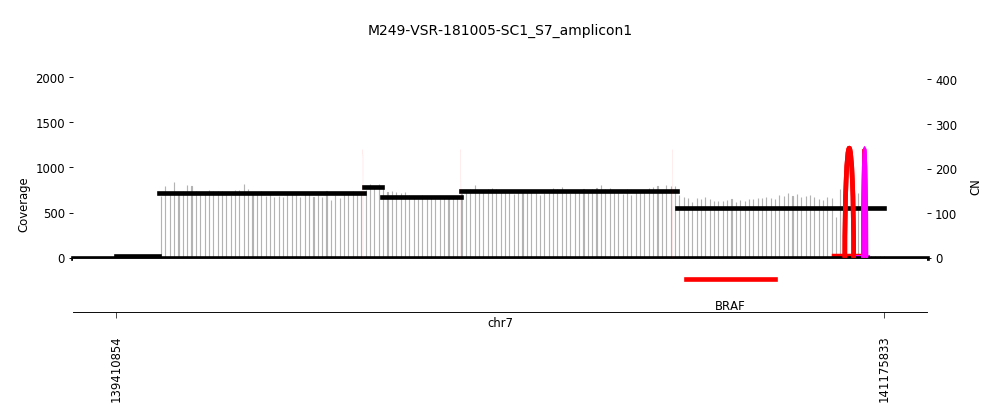





M249_samples
M249-VSR-SC2-2to01_amplicon4


   Cycle     Size  Circular  CN Fraction
0      1  2237Kbp     False     0.884537
2      3  2239Kbp     False     0.098235
1      2    21Kbp     False     0.003260
Episome = False


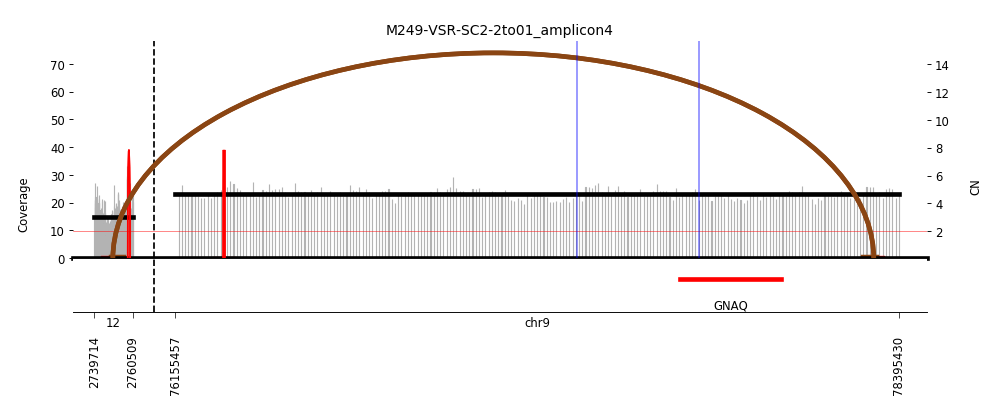





M249_samples
M249-VSR-SC2-2to01_amplicon2


   Cycle     Size  Circular  CN Fraction
0      1  1225Kbp     False     0.802857
3      4  1119Kbp     False     0.136421
1      2    20Kbp     False     0.004875
2      3    29Kbp     False     0.003678
Episome = False


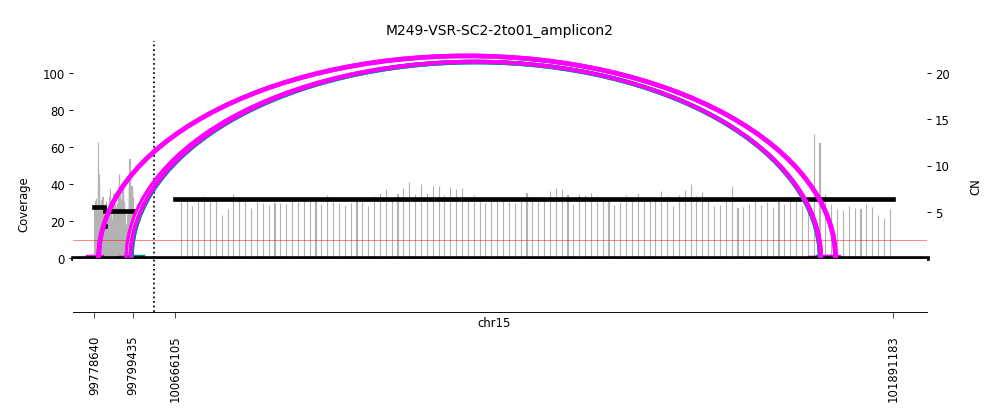





M249_samples
M249-VSR-SC2-2to01_amplicon5


   Cycle     Size  Circular  CN Fraction
0      1  3194Kbp     False     0.578320
1      2  1489Kbp     False     0.164983
3      4  1288Kbp     False     0.093244
5      6  1302Kbp      True     0.046219
2      3   181Kbp     False     0.014785
4      5   136Kbp     False     0.005678
Episome = False


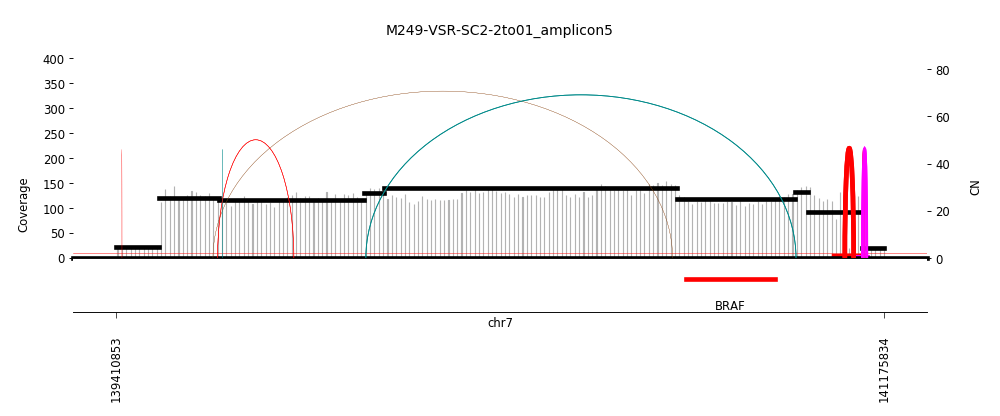





M249_samples
M249-VSR-SC2-2to01_amplicon3


   Cycle   Size  Circular  CN Fraction
0      1  94Kbp     False     0.655597
2      3  93Kbp      True     0.278974
3      4  10Kbp     False     0.022423
4      5  10Kbp     False     0.019170
1      2   0Kbp     False     0.000000
Episome = False


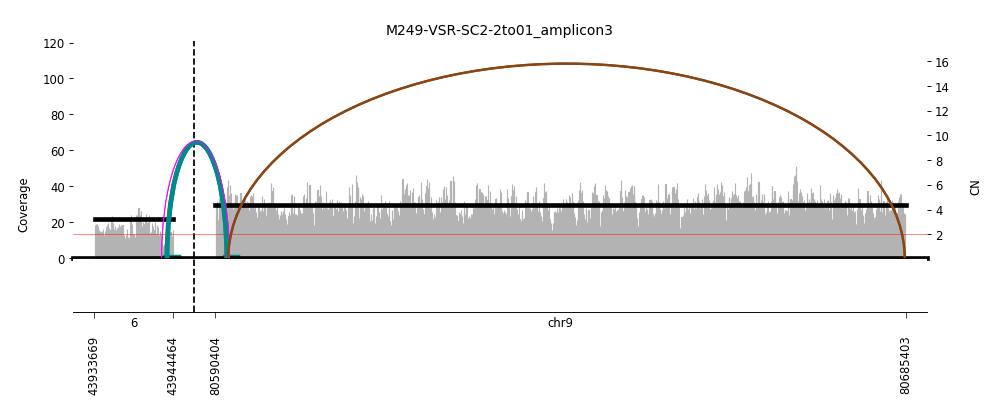





M249_samples
M249-VSR-SC2-2to01_amplicon1


   Cycle     Size  Circular  CN Fraction
0      1  6118Kbp     False     0.544724
2      3  3553Kbp     False     0.220750
1      2  1480Kbp     False     0.101436
5      6  1746Kbp     False     0.048211
3      4   367Kbp     False     0.017834
4      5    20Kbp     False     0.000836
Episome = False


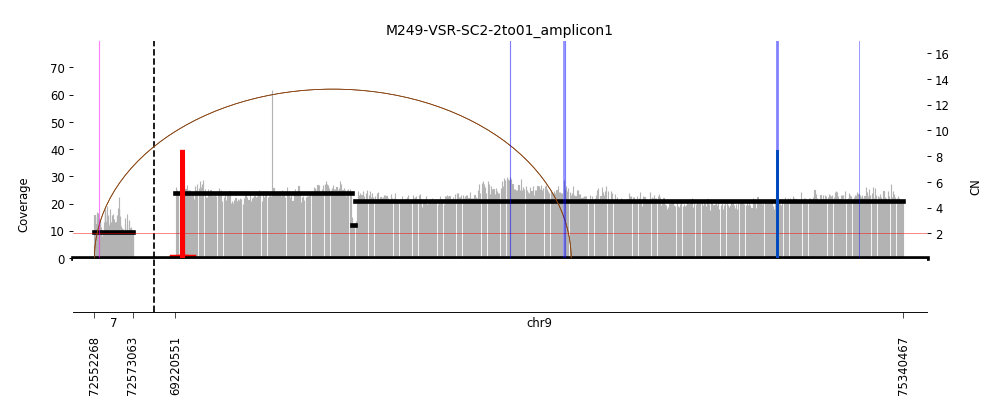





M249_samples
M249-P_S1_amplicon1


   Cycle    Size  Circular  CN Fraction
0      1  125Kbp     False     0.999976
Episome = False


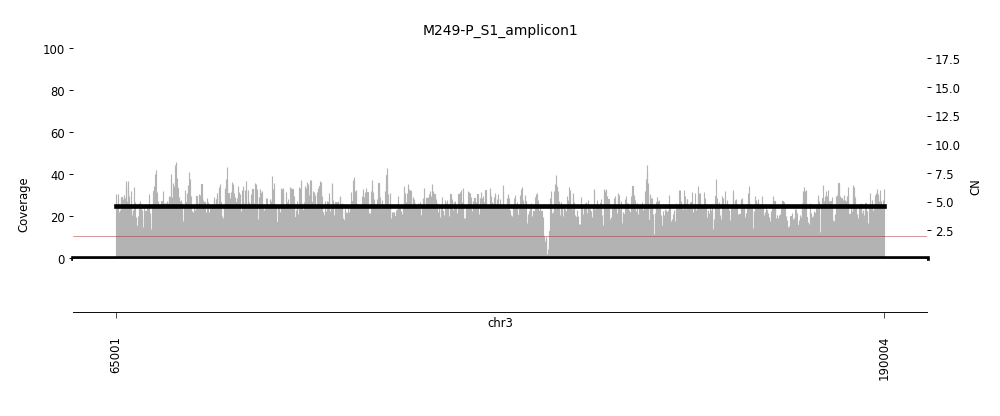





M249_samples
M249-P_S1_amplicon5


   Cycle    Size  Circular  CN Fraction
0      1  125Kbp     False     0.999984
Episome = False


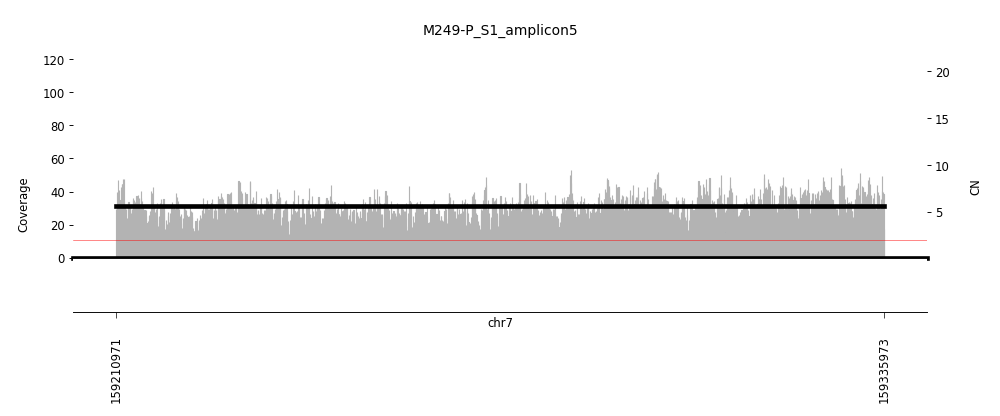





M249_samples
M249-P_S1_amplicon3


   Cycle    Size  Circular  CN Fraction
0      1  140Kbp     False     0.999943
Episome = False


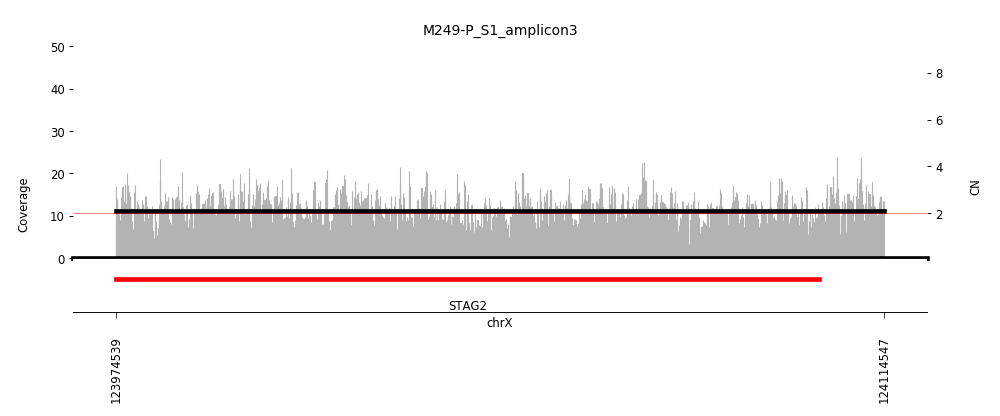





M249_samples
M249-P_S1_amplicon4


   Cycle    Size  Circular  CN Fraction
0      1  144Kbp     False     0.807236
1      2  111Kbp     False     0.186891
Episome = False


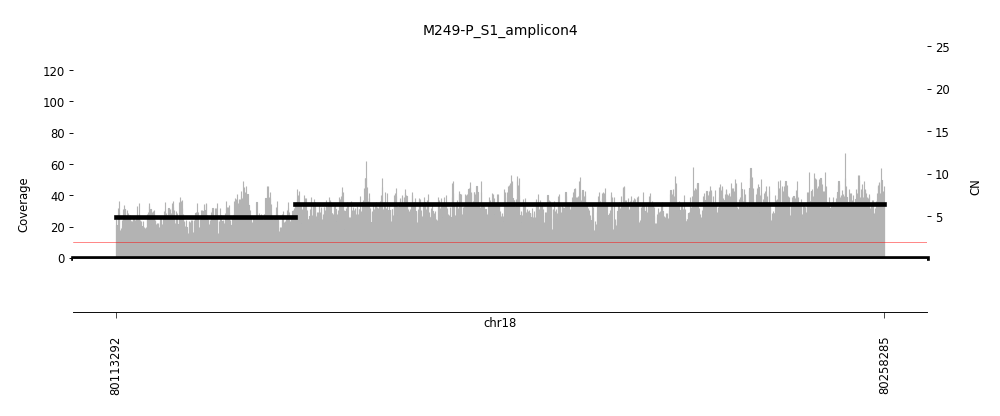





M249_samples
M249-P_S1_amplicon2


   Cycle   Size  Circular  CN Fraction
0      1  62Kbp     False     0.905182
Episome = False


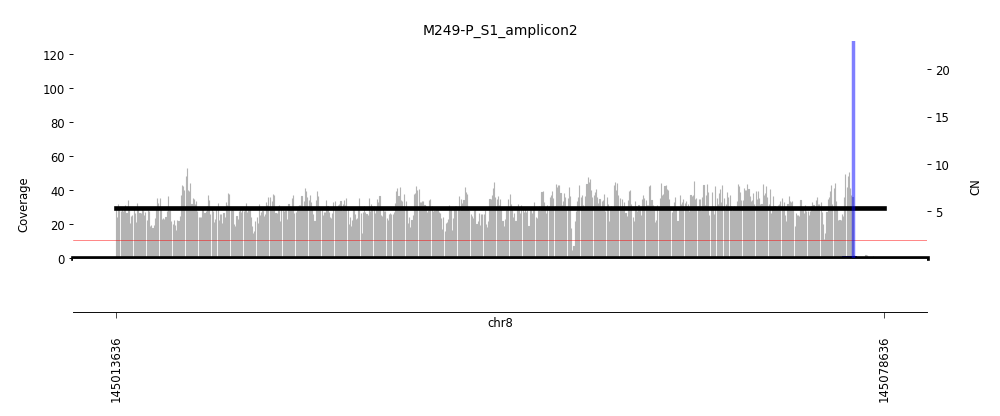





COLO320DM_LC
COLO320DM_LC_amplicon3


   Cycle     Size  Circular  CN Fraction
0      1   352Kbp     False     0.344877
2      3  1264Kbp     False     0.336842
1      2  1164Kbp     False     0.317369
Episome = False


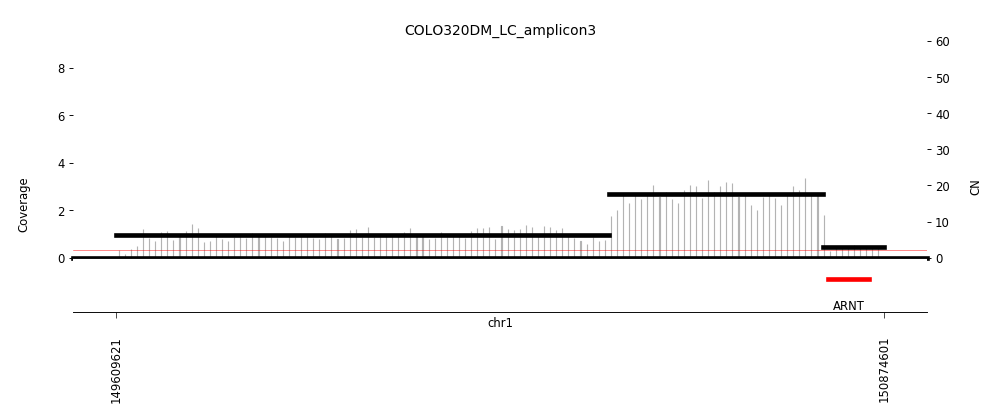





COLO320DM_LC
COLO320DM_LC_amplicon2


   Cycle     Size  Circular  CN Fraction
0      1  1290Kbp     False     0.999995
Episome = False


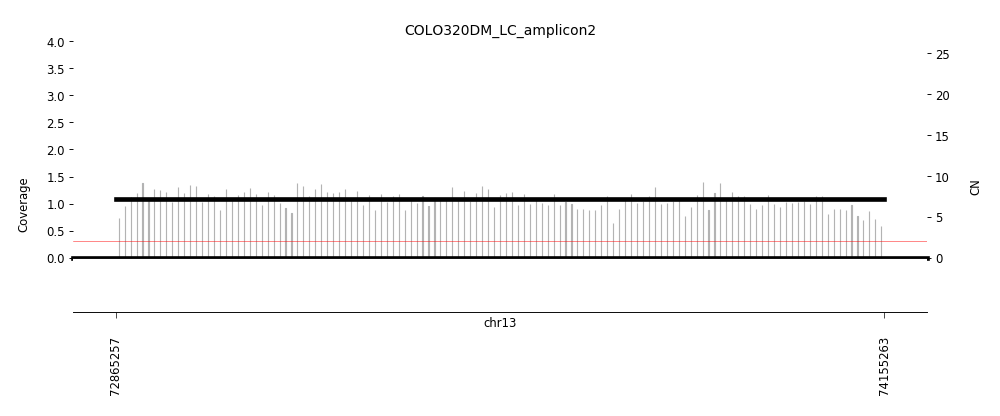





COLO320DM_LC
COLO320DM_LC_amplicon4


   Cycle     Size  Circular  CN Fraction
0      1  4297Kbp     False     0.657537
2      3  4197Kbp     False     0.199464
1      2  1819Kbp     False     0.114225
Episome = False


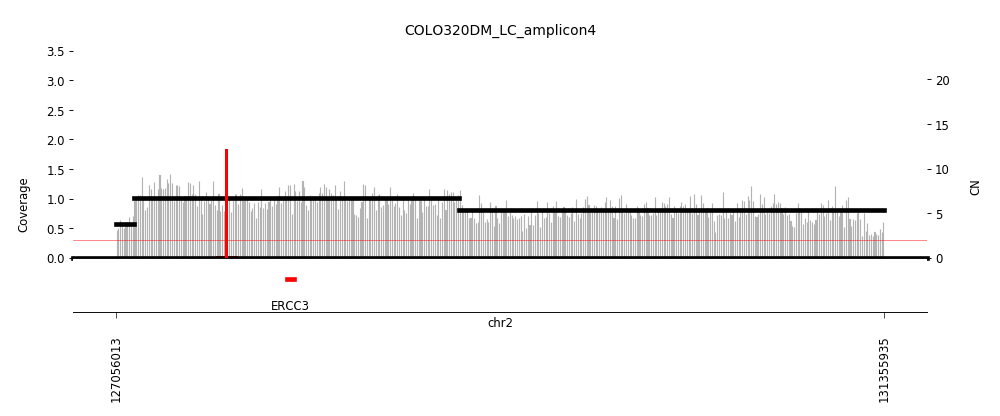





COLO320DM_LC
COLO320DM_LC_amplicon1


    Cycle     Size  Circular  CN Fraction
0       1  1580Kbp      True     0.332290
2       3  1125Kbp      True     0.211762
3       4   426Kbp     False     0.071700
1       2   256Kbp     False     0.049796
13     14   676Kbp     False     0.046788
7       8   384Kbp     False     0.039119
17     18   700Kbp      True     0.036676
20     21   773Kbp     False     0.030748
8       9   258Kbp      True     0.022897
22     23   538Kbp      True     0.017425
4       5    86Kbp      True     0.013534
9      10   144Kbp     False     0.012385
14     15   181Kbp     False     0.011098
21     22   296Kbp     False     0.010979
10     11     0Kbp      True     0.000000
12     13     0Kbp      True     0.000000
6       7     0Kbp      True     0.000000
15     16     0Kbp      True     0.000000
16     17     0Kbp      True     0.000000
5       6     0Kbp      True     0.000000
18     19     0Kbp      True     0.000000
19     20     0Kbp      True     0

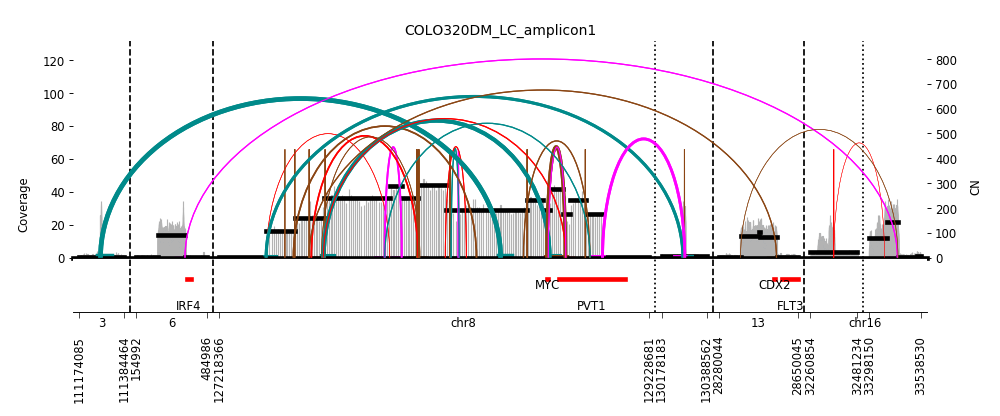





HCC827_CDK4
FF-19_amplicon6


   Cycle    Size  Circular  CN Fraction
0      1  183Kbp     False     0.507175
1      2  290Kbp     False     0.413073
Episome = False


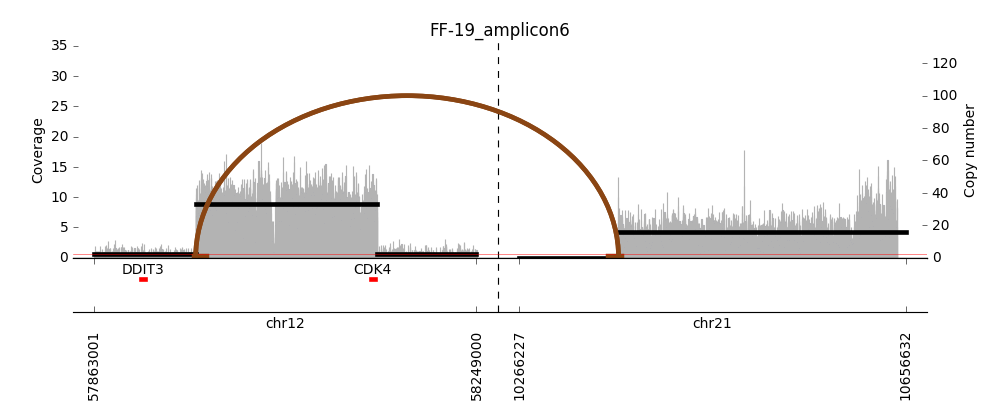





HCC827_EGFR
FF-17_amplicon5


   Cycle     Size  Circular  CN Fraction
1      2  5611Kbp     False     0.461260
0      1  2195Kbp     False     0.410747
2      3  1219Kbp     False     0.041596
Episome = False


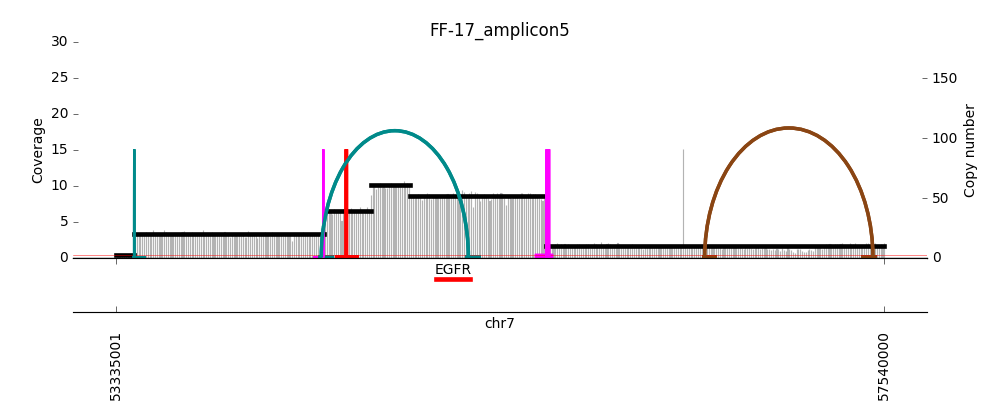





HCC827_EGFR
FF-20_amplicon2


   Cycle     Size  Circular  CN Fraction
1      2  1672Kbp      True     0.304741
5      6  5620Kbp     False     0.173871
0      1   791Kbp      True     0.157659
2      3  2066Kbp      True     0.155059
7      8  4099Kbp     False     0.072340
6      7  1937Kbp      True     0.039868
3      4   431Kbp      True     0.020557
4      5   333Kbp     False     0.011339
Episome = False


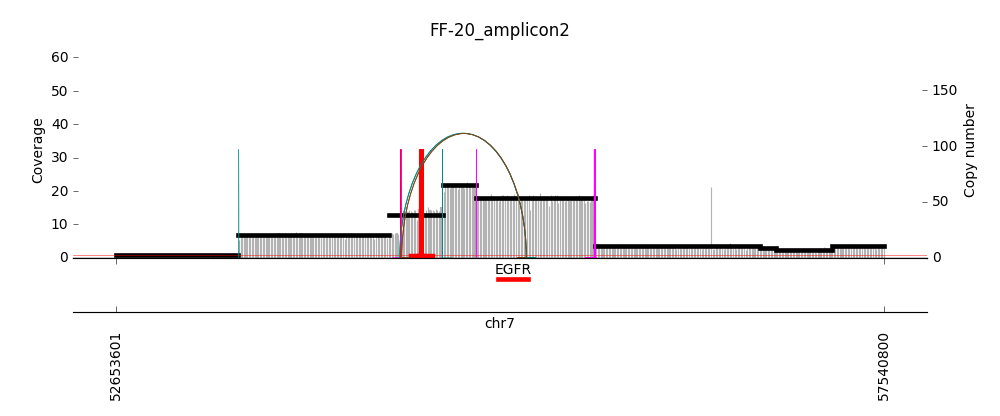





HCC827_ERBB2
FF-20_amplicon3


   Cycle     Size  Circular  CN Fraction
2      3  4118Kbp      True     0.406453
3      4  3350Kbp     False     0.228975
0      1  1627Kbp      True     0.186071
5      6  1370Kbp     False     0.049802
4      5   463Kbp     False     0.024151
1      2   190Kbp     False     0.020297
6      7    69Kbp     False     0.002216
Episome = False


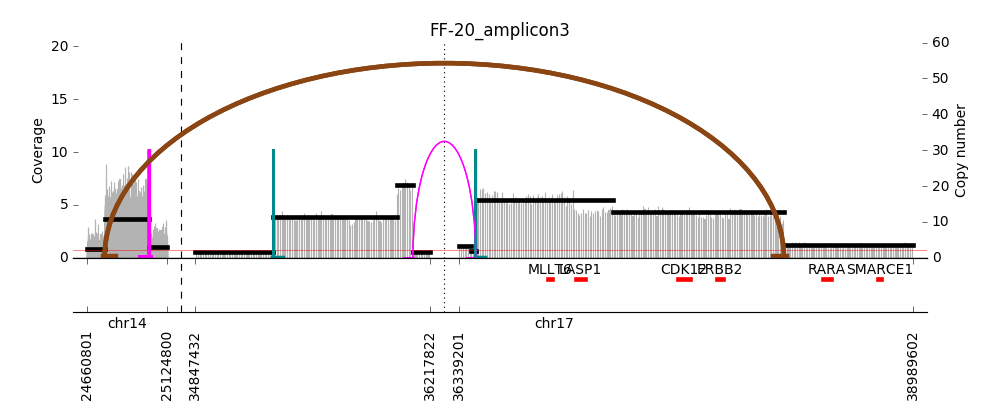





HCC827_HMGA2
FF-19_amplicon3


   Cycle    Size  Circular  CN Fraction
0      1  135Kbp     False     0.563863
1      2  337Kbp     False     0.421233
Episome = False


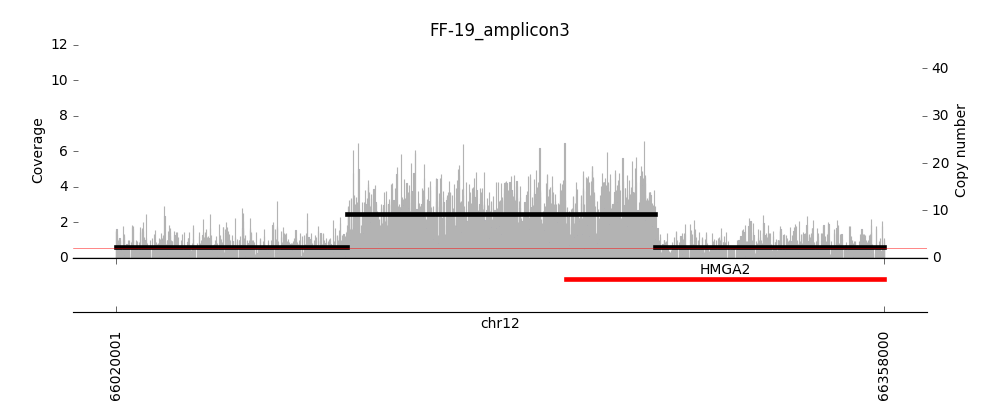





HCC827_MYC
FF-19_amplicon1


    Cycle     Size  Circular  CN Fraction
3       4  5257Kbp     False     0.091660
7       8  5378Kbp     False     0.088281
12     13  5323Kbp     False     0.080937
0       1  2365Kbp     False     0.058503
9      10  3433Kbp     False     0.054379
17     18  4596Kbp     False     0.049388
10     11  3117Kbp     False     0.048110
22     23  5728Kbp     False     0.047843
4       5  2611Kbp     False     0.044569
8       9  2165Kbp     False     0.034630
6       7  1816Kbp     False     0.030314
37     38  9161Kbp     False     0.028428
15     16  2052Kbp     False     0.025350
24     25  2725Kbp     False     0.022139
16     17  1682Kbp     False     0.019510
1       2   890Kbp     False     0.017897
13     14  1252Kbp     False     0.017673
5       6  1016Kbp     False     0.017265
27     28  2255Kbp     False     0.017141
30     31  2089Kbp     False     0.015364
33     34  2932Kbp     False     0.014797
36     37  3233Kbp     False     0.012279
2

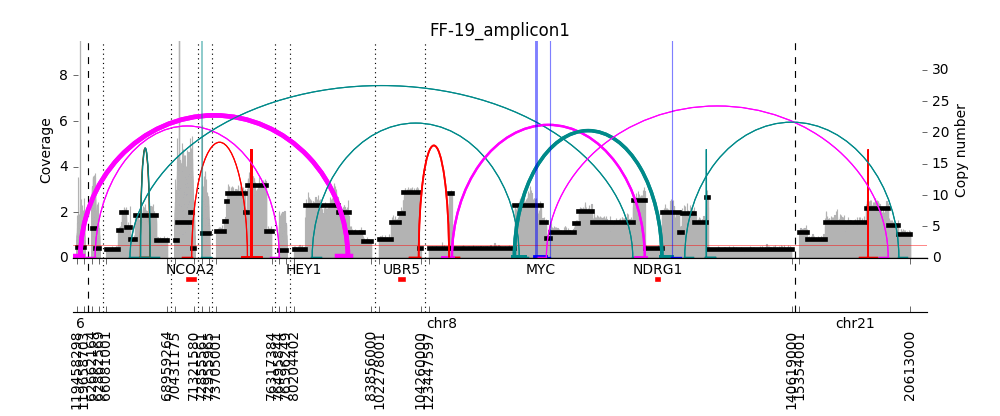





M249_samples
M249-VSR-DM_S2_amplicon4


   Cycle   Size  Circular  CN Fraction
0      1  65Kbp     False     0.573111
1      2  64Kbp      True     0.417257
2      3   0Kbp     False     0.000000
Episome = False


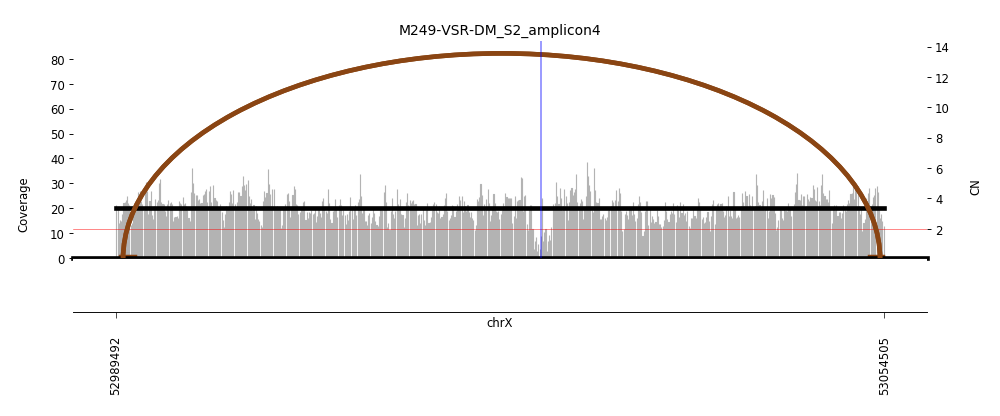





M249_samples
M249-VSR-DM_S2_amplicon2


   Cycle     Size  Circular  CN Fraction
0      1  3194Kbp     False     0.627499
1      2  3194Kbp     False     0.270661
2      3  1187Kbp     False     0.051440
Episome = False


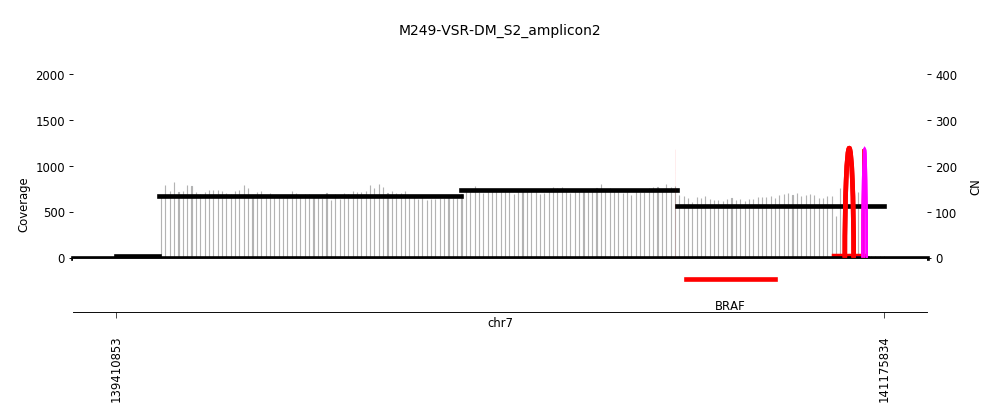





M249_samples
M249-VSR-DM_S2_amplicon5


   Cycle    Size  Circular  CN Fraction
0      1  155Kbp     False     0.676392
1      2  135Kbp      True     0.320698
2      3    0Kbp     False     0.000000
Episome = False


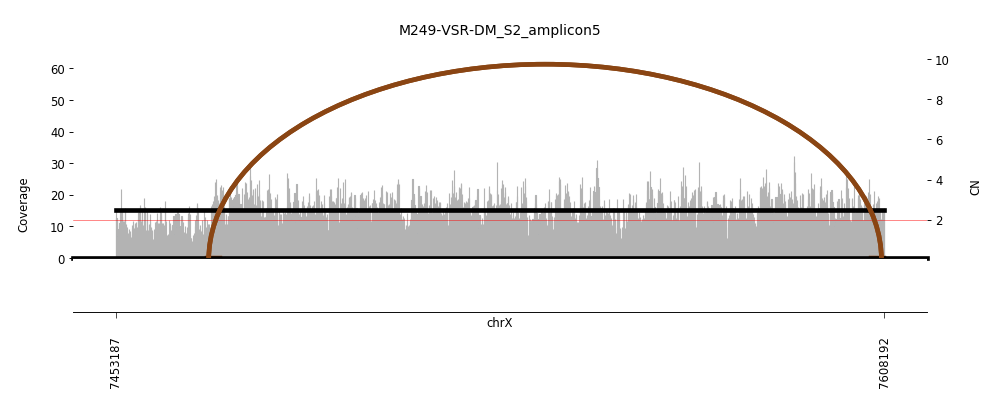





M249_samples
M249-VSR-DM_S2_amplicon3


   Cycle    Size  Circular  CN Fraction
0      1  620Kbp     False     0.999963
Episome = False


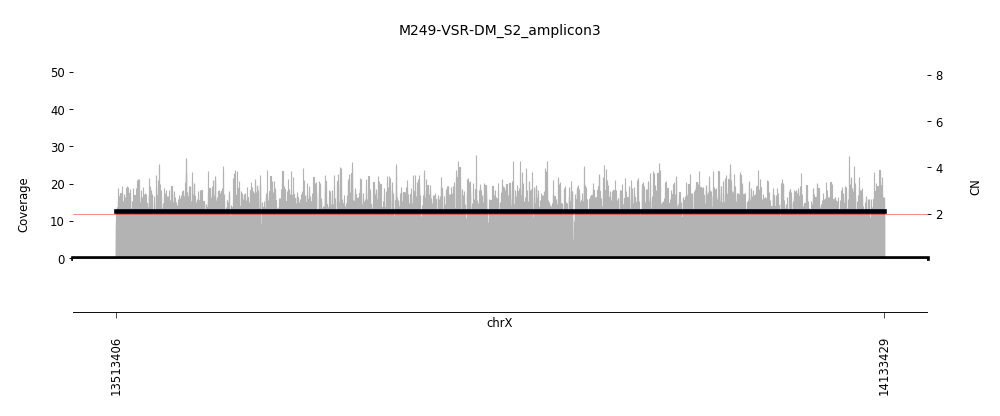





M249_samples
M249-VSR-DM_S2_amplicon1


   Cycle    Size  Circular  CN Fraction
0      1  120Kbp     False     0.715042
1      2  101Kbp      True     0.283400
Episome = False


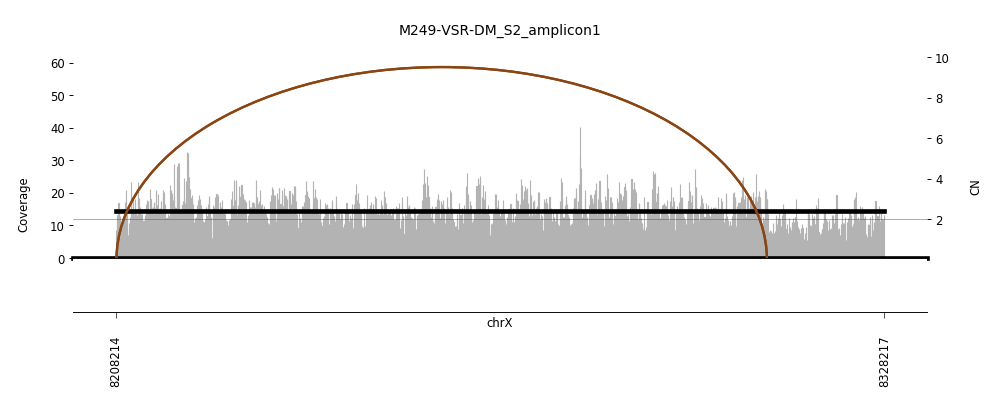





M249_samples
M249-VSR-181005-SC2_S8_amplicon1


   Cycle     Size  Circular  CN Fraction
0      1  3194Kbp     False     0.797013
1      2  1188Kbp     False     0.077935
2      3  1640Kbp     False     0.032046
Episome = False


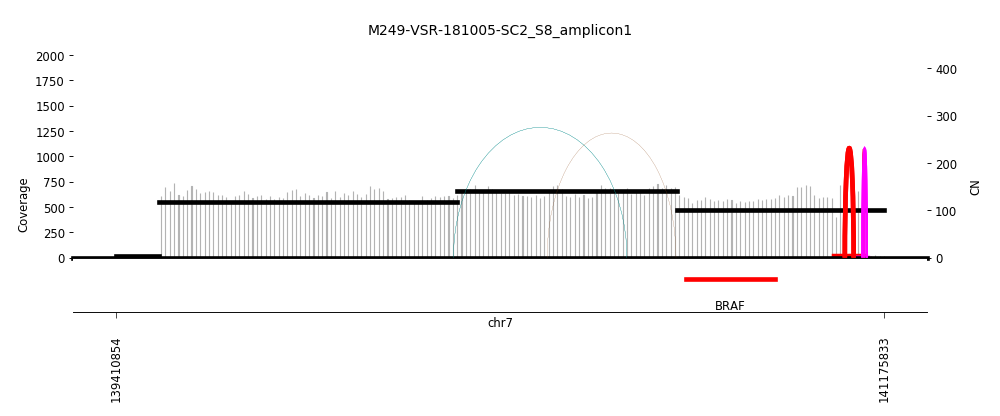





RCMB56_P1_AA_results
RCMB56_P1_amplicon6


   Cycle    Size  Circular  CN Fraction
0      1  496Kbp     False     0.454822
1      2  605Kbp     False     0.347519
2      3  405Kbp     False     0.157723
Episome = False


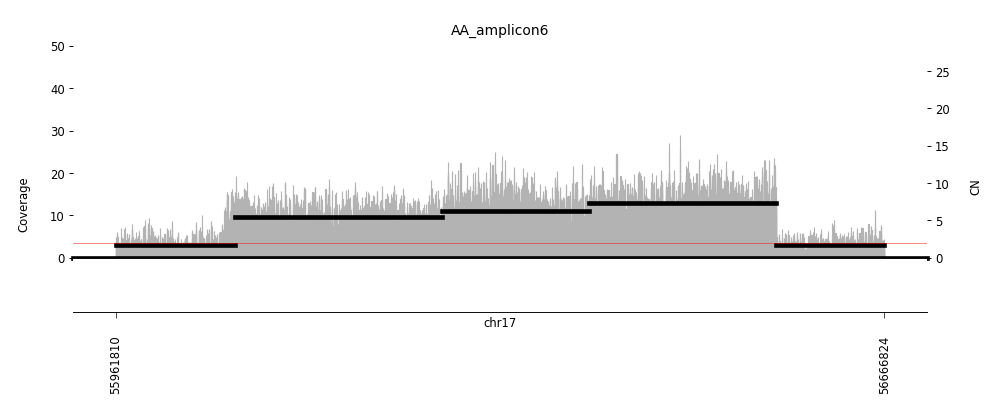





RCMB56_P1_AA_results
RCMB56_P1_amplicon7


   Cycle    Size  Circular  CN Fraction
1      2  365Kbp     False     0.399535
0      1  285Kbp     False     0.335491
3      4  465Kbp     False     0.138402
2      3  357Kbp     False     0.125005
Episome = False


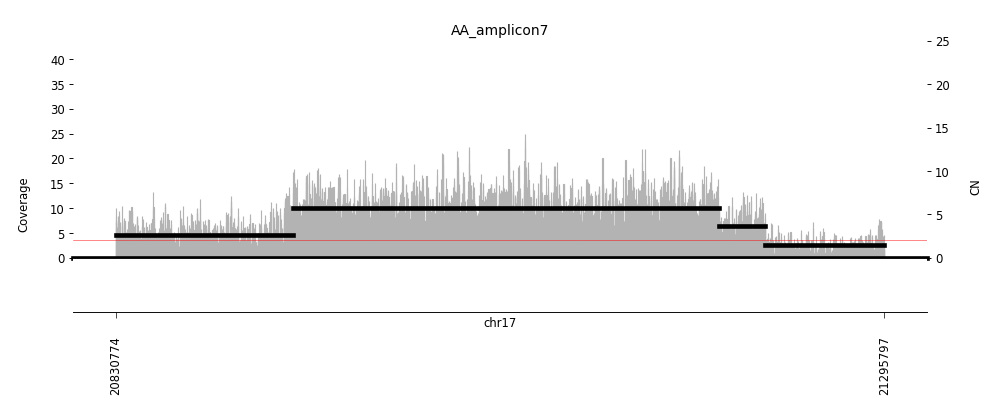





RCMB56_P1_AA_results
RCMB56_P1_amplicon1


   Cycle     Size  Circular  CN Fraction
0      1  3204Kbp      True     0.948543
1      2     0Kbp      True     0.000000
2      3     0Kbp      True     0.000000
3      4     0Kbp      True     0.000000
4      5     0Kbp      True     0.000000
5      6     0Kbp      True     0.000000
6      7     0Kbp      True     0.000000
7      8     0Kbp      True     0.000000
8      9     0Kbp      True     0.000000
Episome = True


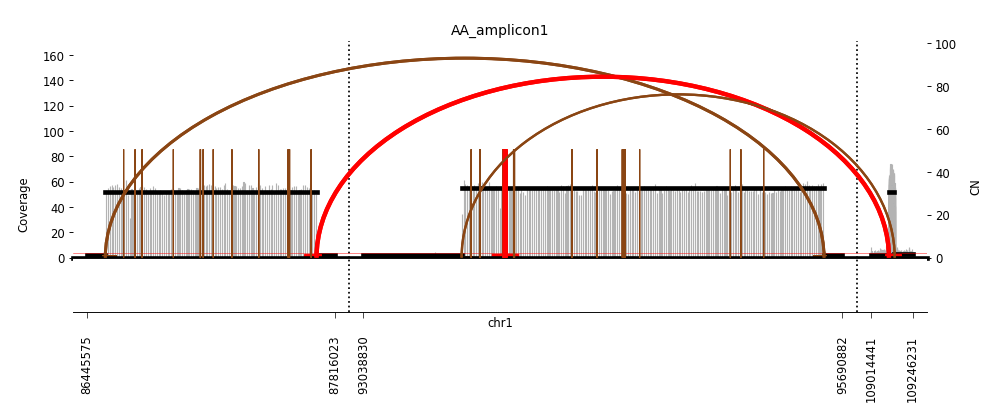





RCMB56_P1_AA_results
RCMB56_P1_amplicon4


   Cycle    Size  Circular  CN Fraction
0      1  184Kbp     False     0.994605
Episome = False


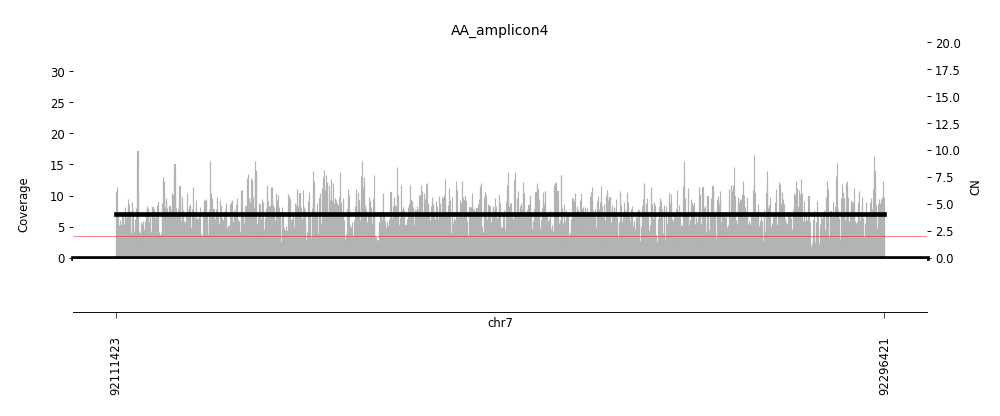





RCMB56_P1_AA_results
RCMB56_P1_amplicon2


    Cycle     Size  Circular  CN Fraction
0       1  4397Kbp     False     0.806098
27     28  2068Kbp     False     0.023525
23     24  1164Kbp     False     0.016176
18     19   524Kbp     False     0.012938
20     21   810Kbp     False     0.012303
17     18   289Kbp     False     0.010529
21     22   612Kbp     False     0.009173
22     23   449Kbp     False     0.006668
25     26   503Kbp     False     0.006591
24     25   270Kbp     False     0.003732
19     20   129Kbp     False     0.002393
26     27    55Kbp     False     0.000698
2       3     0Kbp      True     0.000000
3       4     0Kbp      True     0.000000
16     17     0Kbp      True     0.000000
15     16     0Kbp      True     0.000000
1       2     0Kbp      True     0.000000
13     14     0Kbp      True     0.000000
12     13     0Kbp      True     0.000000
11     12     0Kbp      True     0.000000
10     11     0Kbp      True     0.000000
9      10     0Kbp      True 

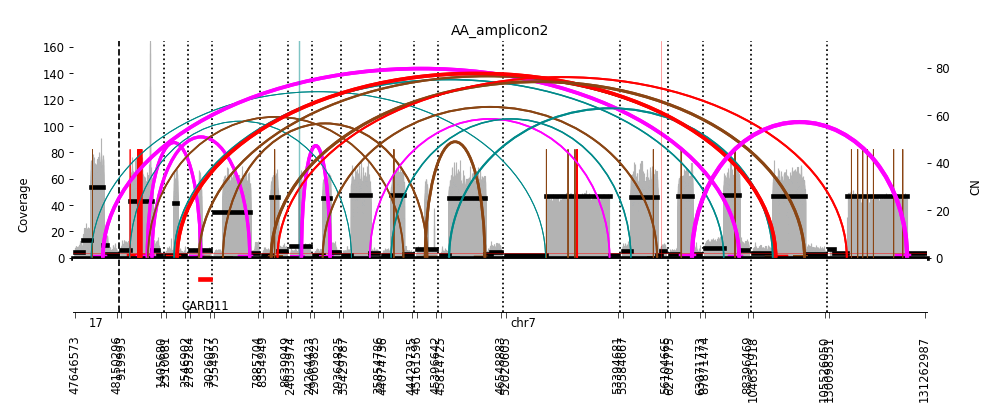





RCMB56_P1_AA_results
RCMB56_P1_amplicon5


   Cycle    Size  Circular  CN Fraction
0      1  744Kbp     False      0.99867
Episome = False


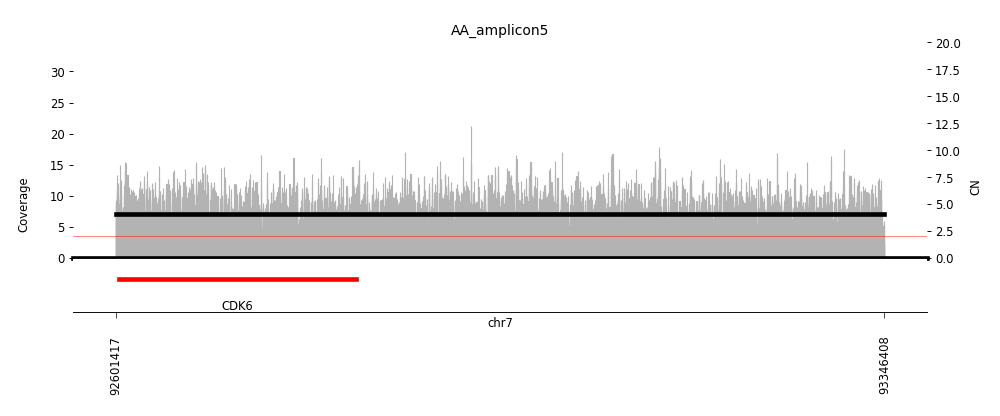





RCMB56_P1_AA_results
RCMB56_P1_amplicon3


   Cycle    Size  Circular  CN Fraction
0      1  149Kbp     False     0.993347
Episome = False


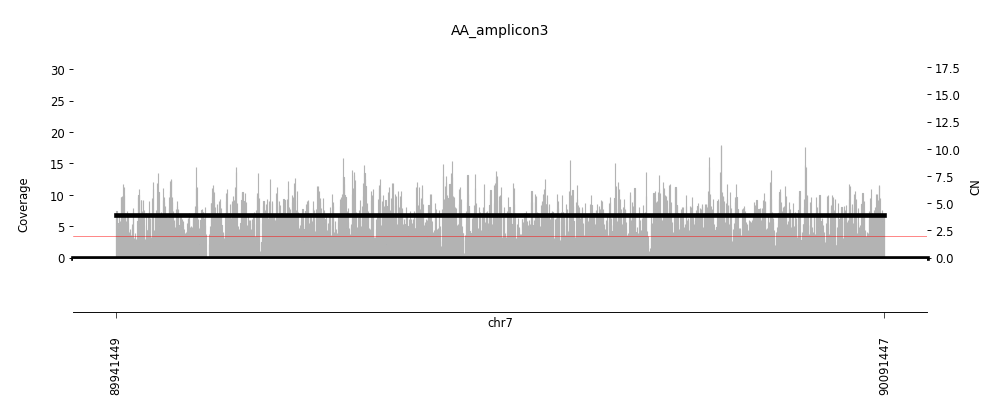





GBM39
FF-4_amplicon1


   Cycle     Size  Circular  CN Fraction
0      1  1257Kbp      True     0.847666
1      2  1258Kbp      True     0.117164
Episome = True


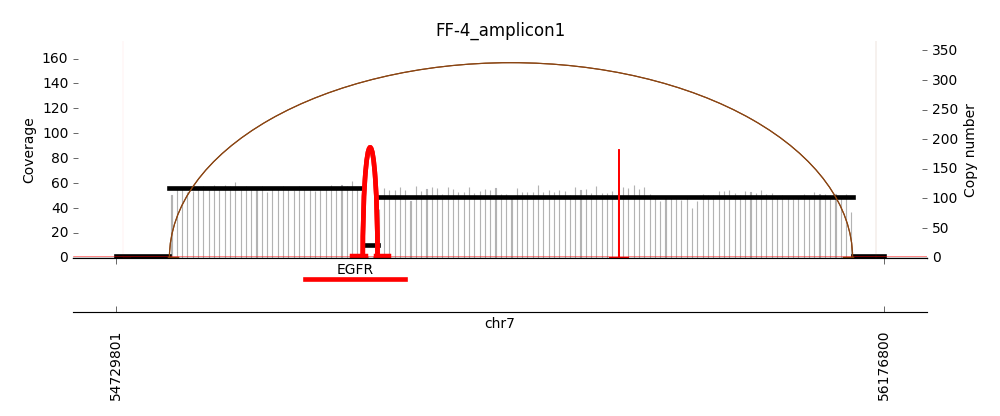





D458
D458_amplicon2


   Cycle    Size  Circular  CN Fraction
0      1  205Kbp     False     0.997683
Episome = False


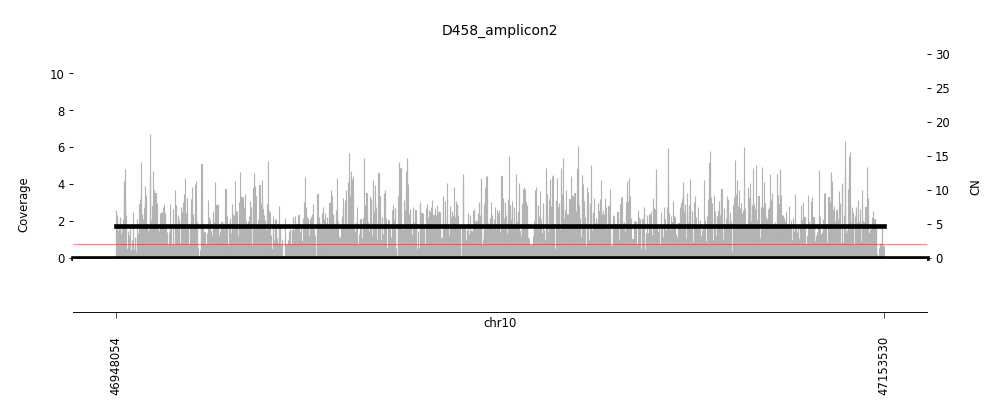





D458
D458_amplicon1


    Cycle     Size  Circular  CN Fraction
1       2  1379Kbp      True     0.467608
2       3  1181Kbp      True     0.353543
46     47  1156Kbp     False     0.044740
20     21   273Kbp      True     0.034666
45     46   124Kbp      True     0.007387
3       4    15Kbp      True     0.003749
44     45    21Kbp     False     0.001260
41     42    12Kbp      True     0.001072
0       1     2Kbp      True     0.000792
40     41     5Kbp      True     0.000447
9      10     2Kbp      True     0.000365
12     13     2Kbp      True     0.000331
13     14     1Kbp      True     0.000164
21     22     1Kbp      True     0.000126
32     33     1Kbp      True     0.000107
38     39     1Kbp      True     0.000101
33     34     0Kbp      True     0.000000
34     35     0Kbp      True     0.000000
35     36     0Kbp      True     0.000000
36     37     0Kbp      True     0.000000
37     38     0Kbp      True     0.000000
39     40     0Kbp      True     0.000000
30     3

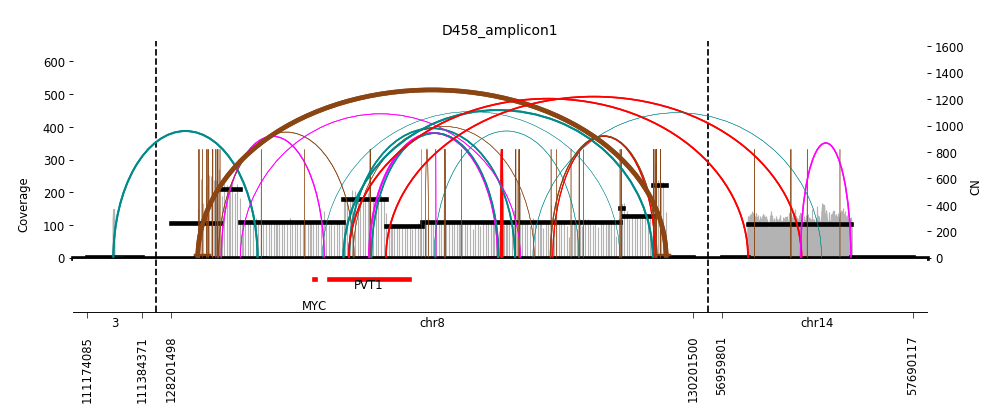





H460
FF-39_amplicon1


   Cycle     Size  Circular  CN Fraction
0      1  2445Kbp      True     0.605122
1      2  1076Kbp     False     0.259285
3      4  2149Kbp     False     0.095653
2      3   335Kbp      True     0.017745
Episome = False


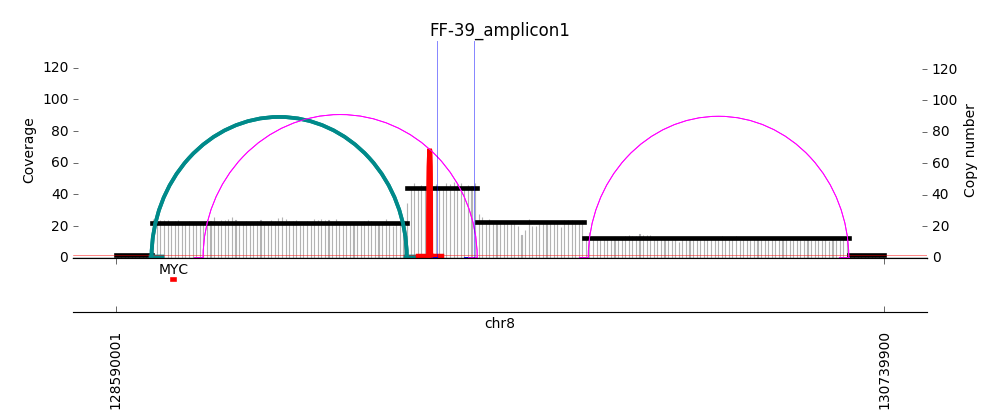





K562
KT11_amplicon2


    Cycle     Size  Circular  CN Fraction
2       3  3820Kbp     False     0.290979
9      10  4111Kbp      True     0.096901
5       6  1656Kbp     False     0.092224
4       5  1405Kbp     False     0.090829
15     16  4290Kbp     False     0.049890
12     13  2945Kbp     False     0.048602
3       4   665Kbp     False     0.047894
11     12  2263Kbp     False     0.047742
16     17  5238Kbp     False     0.039080
1       2   402Kbp     False     0.031814
0       1   382Kbp      True     0.031576
8       9   991Kbp     False     0.024250
7       8   748Kbp     False     0.021525
14     15   988Kbp     False     0.011721
13     14   361Kbp     False     0.004803
6       7    57Kbp      True     0.002133
10     11    76Kbp     False     0.001649
Episome = False


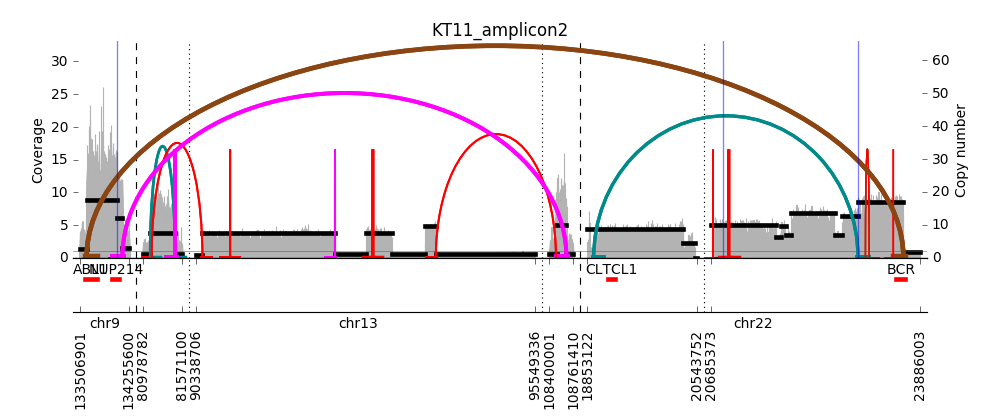





K562
KT11_amplicon3


   Cycle    Size  Circular  CN Fraction
1      2  362Kbp     False     0.417217
0      1  193Kbp     False     0.377773
2      3  293Kbp     False     0.165282
Episome = False


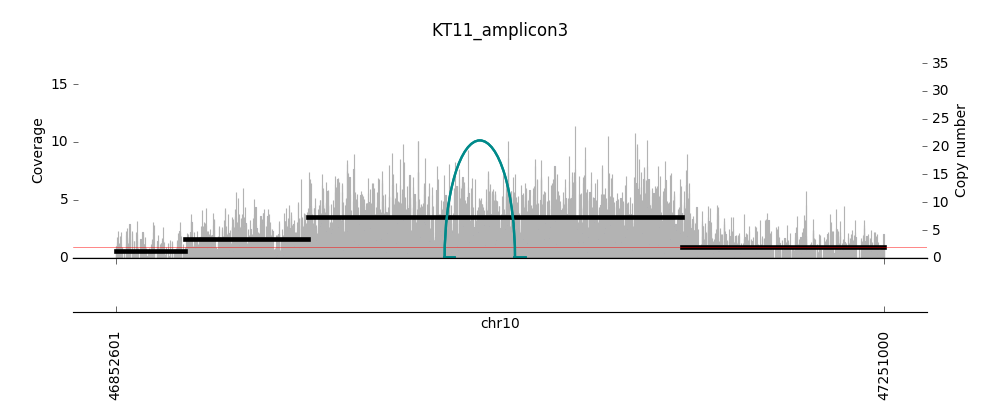





K562
KT11_amplicon1


   Cycle    Size  Circular  CN Fraction
1      2  317Kbp     False     0.580002
0      1  123Kbp     False     0.387050
Episome = False


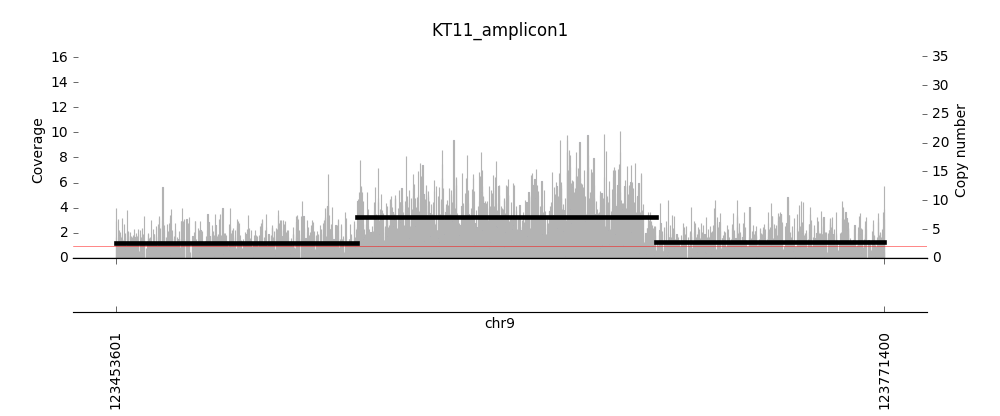

In [93]:

for amplicon_folder in aa_folders:
    amplicon_graph_files = [file for file in os.listdir(amplicon_folder) if file.endswith("graph.txt")]
    for graphf in amplicon_graph_files:
        conv_file = graphf.split("graph.txt")[0] + "cycles_converted_cycles.txt"
        s,c = readConvertedCycles(amplicon_folder + conv_file, amplicon_folder + graphf)
        #print(conv_files[i].split("/")[-1])
      
        #if isEpisome(cycleFractionTable(c,s)):
        
        sample_amp = graphf.split("_graph")[0] 
        sample, amp = sample_amp.split("_amplicon")
        
        png = amplicon_folder + sample_amp + ".png"
        
        print(amplicon_folder.split("/")[-3])
        print(sample_amp)
        print("\n")
        print(cycleFractionTable(c,s))
        print("Episome = " + str(isEpisome(cycleFractionTable(c,s))))
        display(Image(png))
        print("\n")
        print("\n")


In [ ]:
for i in range(len(graph_files)):
    s,c = readConvertedCycles(conv_files[i], graph_files[i])
    #print(conv_files[i].split("/")[-1])
    if isEpisome(cycleFractionTable(c,s)):
        filename = graph_files[i].split("/")[-1]
        sample_amp = filename.split("_graph")[0] 
        sample, amp = sample_amp.split("_amplicon")
        class_row = amplicon_class.loc[(amplicon_class['sample_name'] == sample) &\
                                       (amplicon_class['amplicon_number'] == "amplicon"+amp)]
        png = sample_amp + ".png"
        z
        print(sample_amp + ", " +class_row['amplicon_decomposition_class'].iloc[0]+", "\
              + "ecDNA "+class_row['ecDNA+'].iloc[0]+", BFB "+class_row['BFB+'].iloc[0] )
        print("\n")
        print(cycleFractionTable(c,s))
        display(Image(filename=IMAGE_DIR + png))
        print("\n")
        print("\n")
        

In [97]:
test_files = []
for amplicon_folder in aa_folders:
    amplicon_graph_files = [file for file in os.listdir(amplicon_folder) if file.endswith("graph.txt")]
    for graphf in amplicon_graph_files:
        max_cont, n_osc, n_seg, something , sdict, len_cns = oscillating_cn(amplicon_folder + graphf, show_plot = False)

        if max_cont > 5 and n_osc > 10:
            state_cns_len = 0
            j = 0
            for key in sdict:
                #if j <= 3:
                if not round(key) <= 2:
                    state_cns_len += sdict[key]
                    #j += 1
            if state_cns_len/len_cns > 0.4:
                test_files.append(amplicon_folder + graphf)

M249_samples


   Cycle     Size  Circular  CN Fraction
0      1  3194Kbp     False     0.374043
1      2  3194Kbp     False     0.273323
5      6  3194Kbp     False     0.189136
2      3   718Kbp     False     0.039486
4      5  1640Kbp     False     0.027358
3      4   512Kbp     False     0.024309
Oscillations with length > 3:
#Segs	Max CN	Min CN


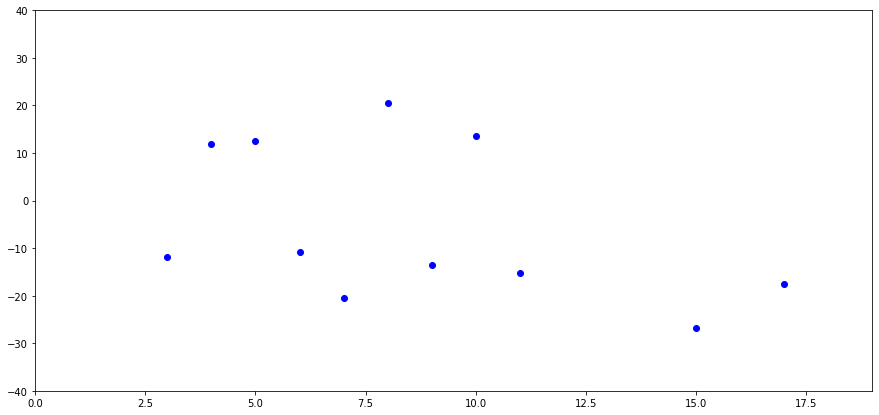



Total number of segments: 18
State	#Segs:




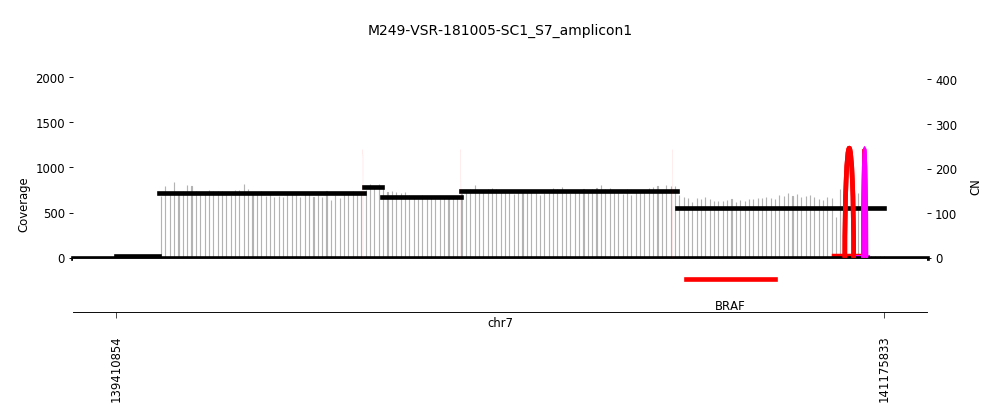



M249_samples


   Cycle     Size  Circular  CN Fraction
0      1  2237Kbp     False     0.884537
2      3  2239Kbp     False     0.098235
1      2    21Kbp     False     0.003260
Oscillations with length > 3:
#Segs	Max CN	Min CN


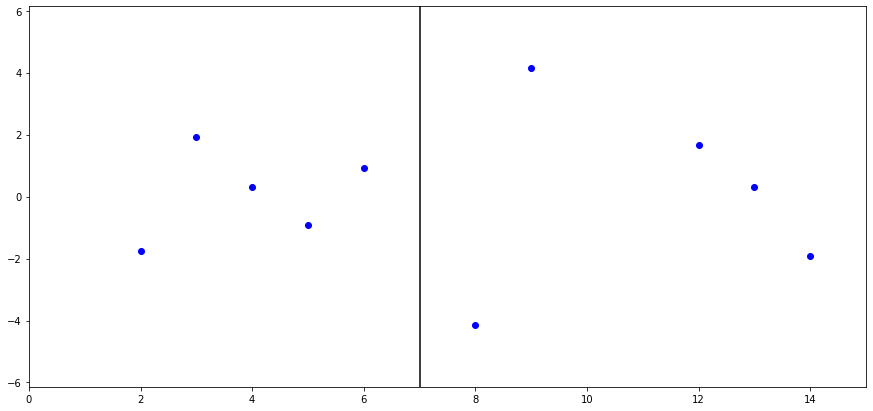



Total number of segments: 14
State	#Segs:




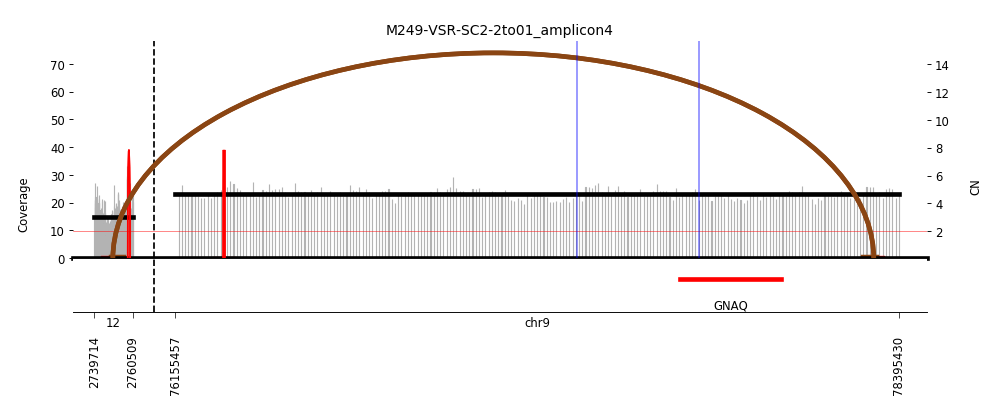



M249_samples


   Cycle     Size  Circular  CN Fraction
0      1  1225Kbp     False     0.802857
3      4  1119Kbp     False     0.136421
1      2    20Kbp     False     0.004875
2      3    29Kbp     False     0.003678
Oscillations with length > 3:
#Segs	Max CN	Min CN


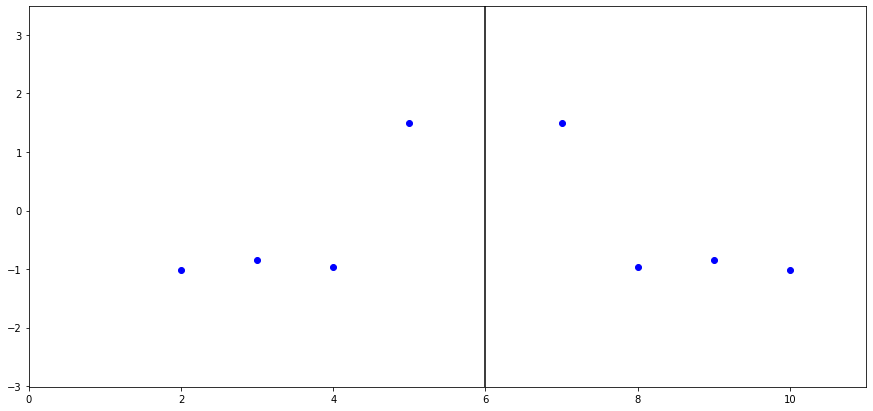



Total number of segments: 10
State	#Segs:




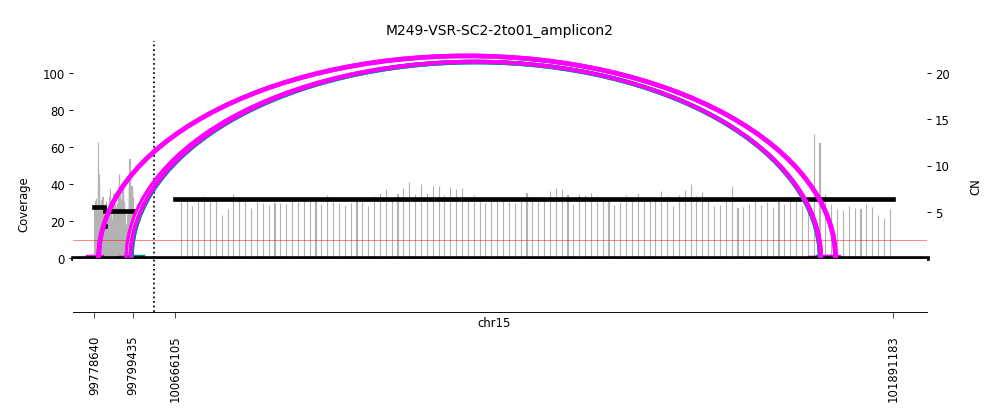



M249_samples


   Cycle     Size  Circular  CN Fraction
0      1  3194Kbp     False     0.578320
1      2  1489Kbp     False     0.164983
3      4  1288Kbp     False     0.093244
5      6  1302Kbp      True     0.046219
2      3   181Kbp     False     0.014785
4      5   136Kbp     False     0.005678
Oscillations with length > 3:
#Segs	Max CN	Min CN


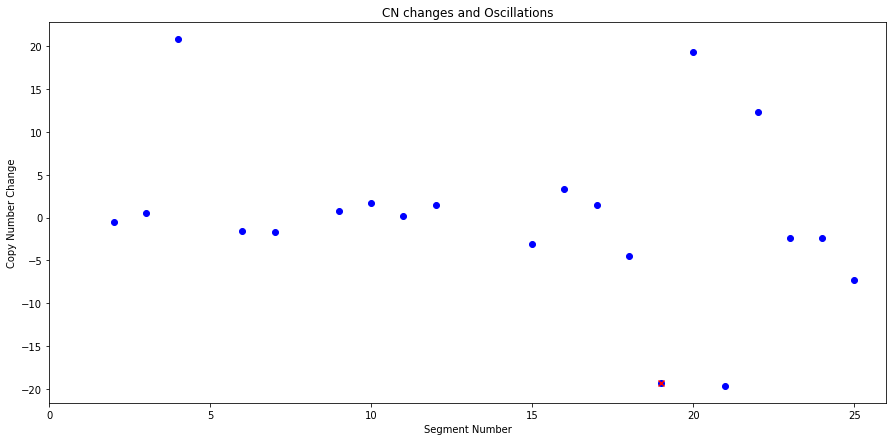



Total number of segments: 25
State	#Segs:




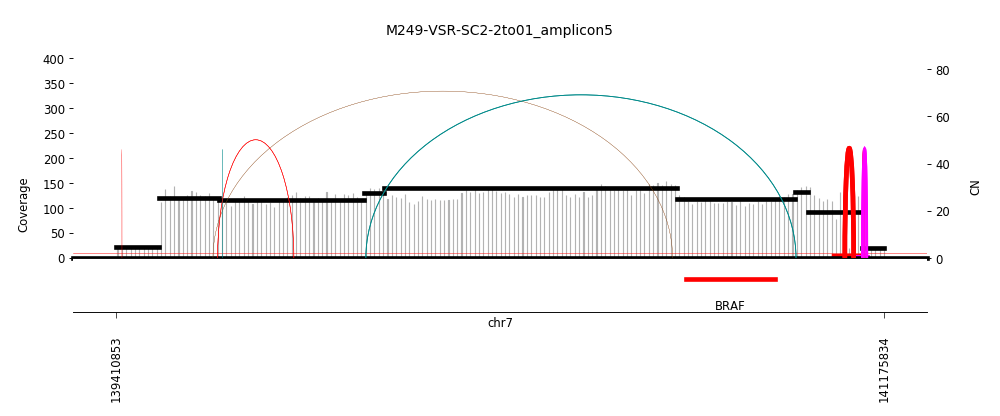



M249_samples


   Cycle   Size  Circular  CN Fraction
0      1  94Kbp     False     0.655597
2      3  93Kbp      True     0.278974
3      4  10Kbp     False     0.022423
4      5  10Kbp     False     0.019170
1      2   0Kbp     False     0.000000
Oscillations with length > 3:
#Segs	Max CN	Min CN


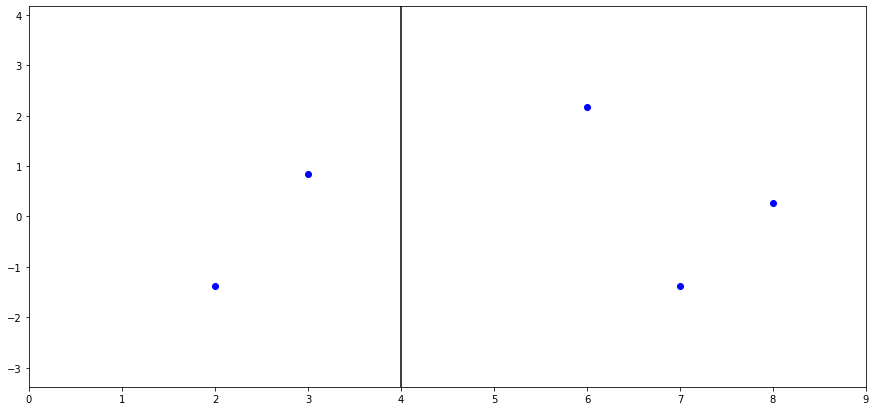



Total number of segments: 8
State	#Segs:




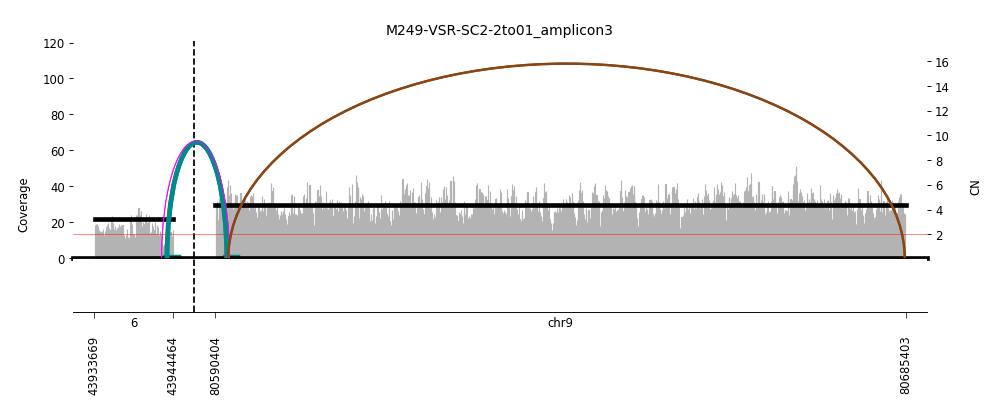



M249_samples


   Cycle     Size  Circular  CN Fraction
0      1  6118Kbp     False     0.544724
2      3  3553Kbp     False     0.220750
1      2  1480Kbp     False     0.101436
5      6  1746Kbp     False     0.048211
3      4   367Kbp     False     0.017834
4      5    20Kbp     False     0.000836
Oscillations with length > 3:
#Segs	Max CN	Min CN


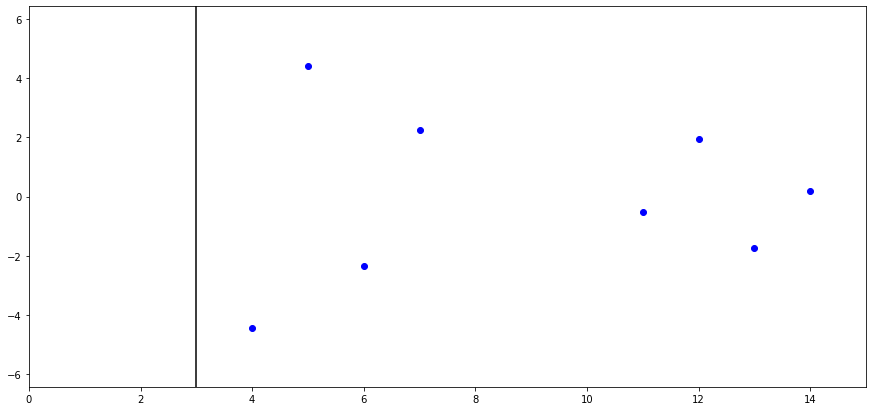



Total number of segments: 14
State	#Segs:




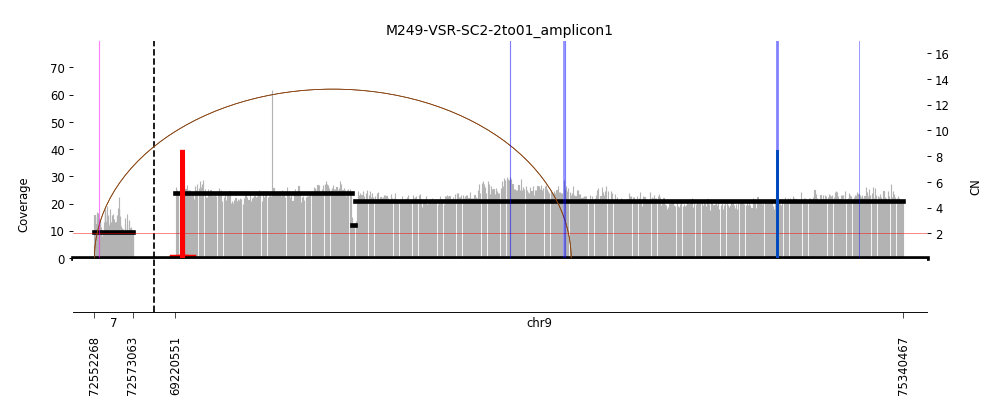



M249_samples


   Cycle    Size  Circular  CN Fraction
0      1  125Kbp     False     0.999976
Oscillations with length > 3:
#Segs	Max CN	Min CN


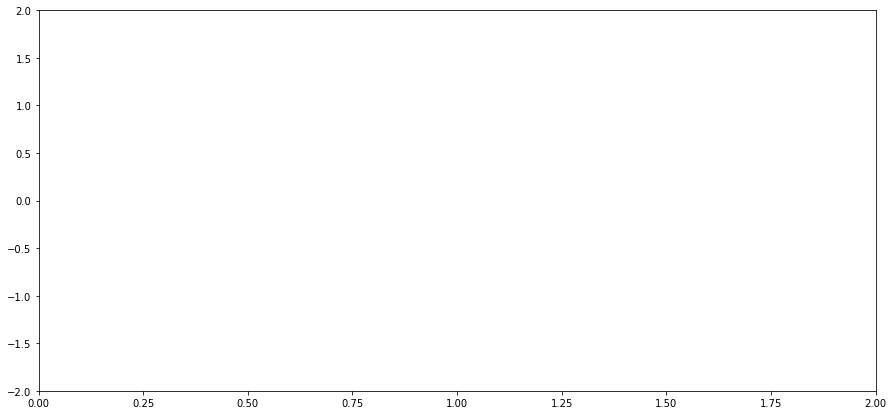



Total number of segments: 1
State	#Segs:




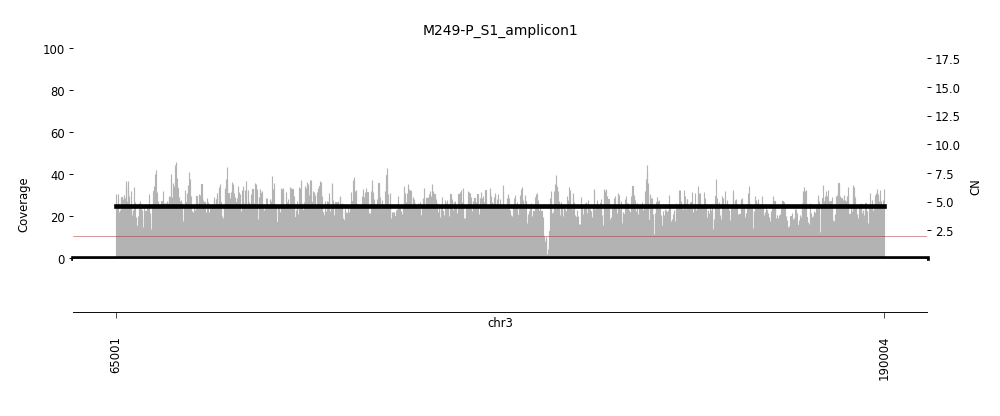



M249_samples


   Cycle    Size  Circular  CN Fraction
0      1  125Kbp     False     0.999984
Oscillations with length > 3:
#Segs	Max CN	Min CN


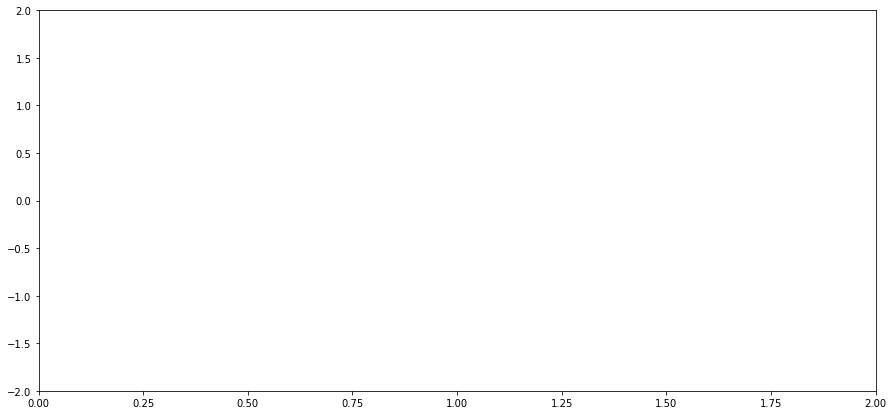



Total number of segments: 1
State	#Segs:




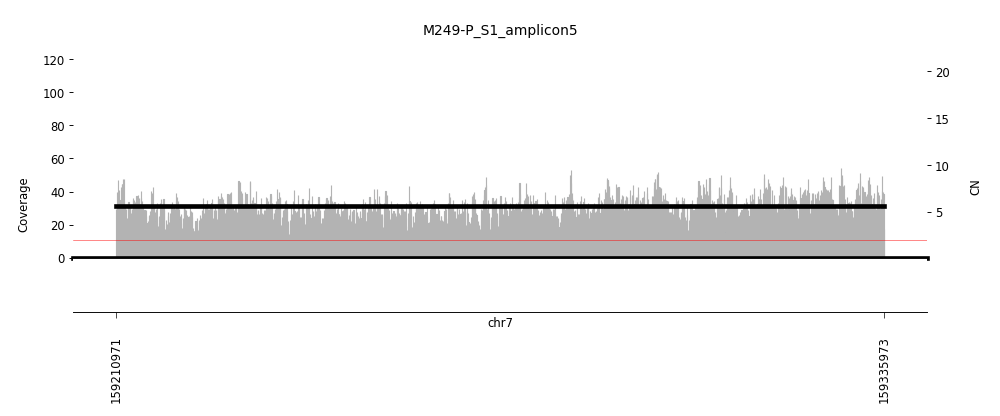



M249_samples


   Cycle    Size  Circular  CN Fraction
0      1  140Kbp     False     0.999943
Oscillations with length > 3:
#Segs	Max CN	Min CN


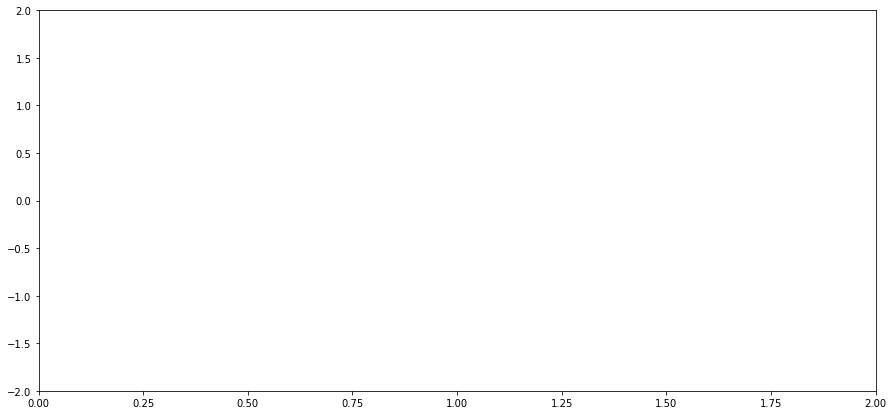



Total number of segments: 1
State	#Segs:




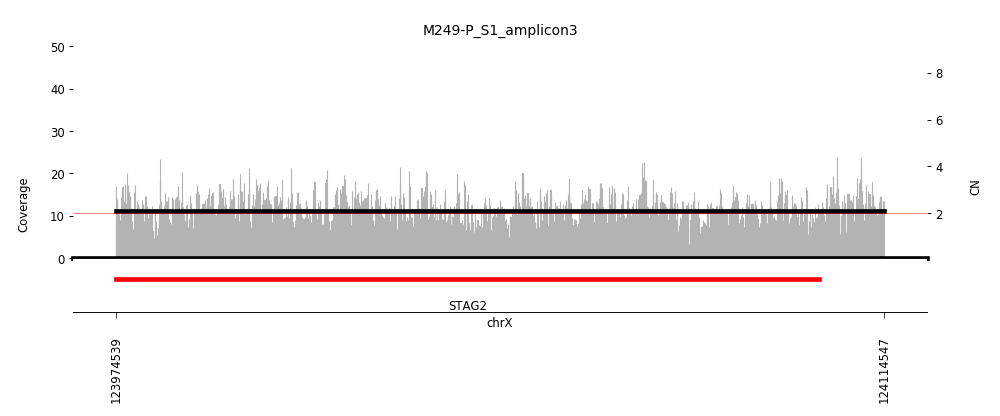



M249_samples


   Cycle    Size  Circular  CN Fraction
0      1  144Kbp     False     0.807236
1      2  111Kbp     False     0.186891
Oscillations with length > 3:
#Segs	Max CN	Min CN


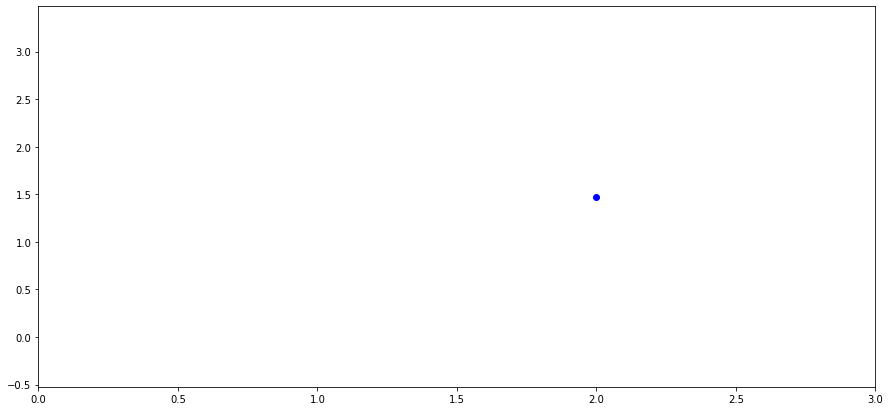



Total number of segments: 2
State	#Segs:




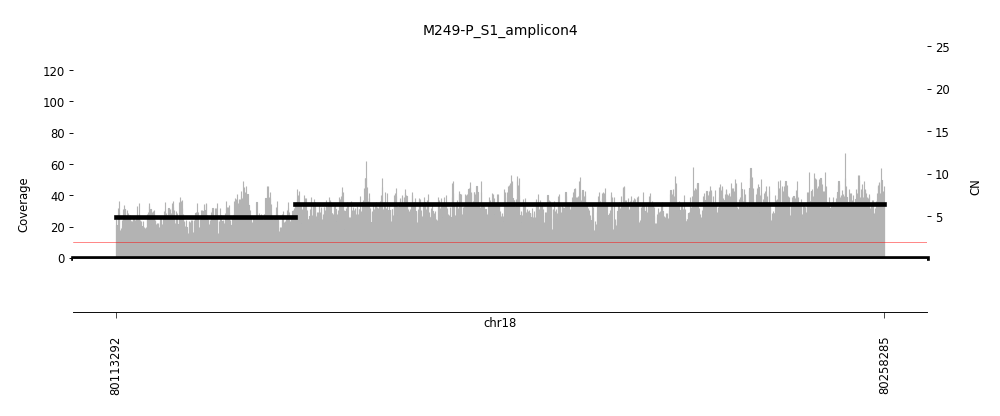



M249_samples


   Cycle   Size  Circular  CN Fraction
0      1  62Kbp     False     0.905182
Oscillations with length > 3:
#Segs	Max CN	Min CN


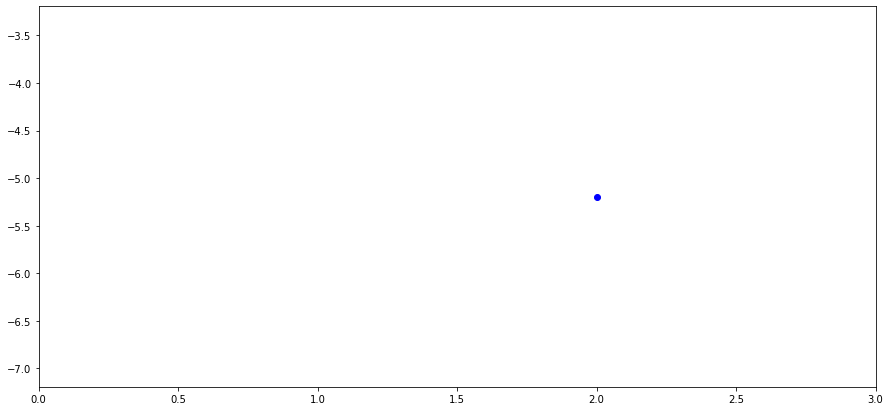



Total number of segments: 2
State	#Segs:




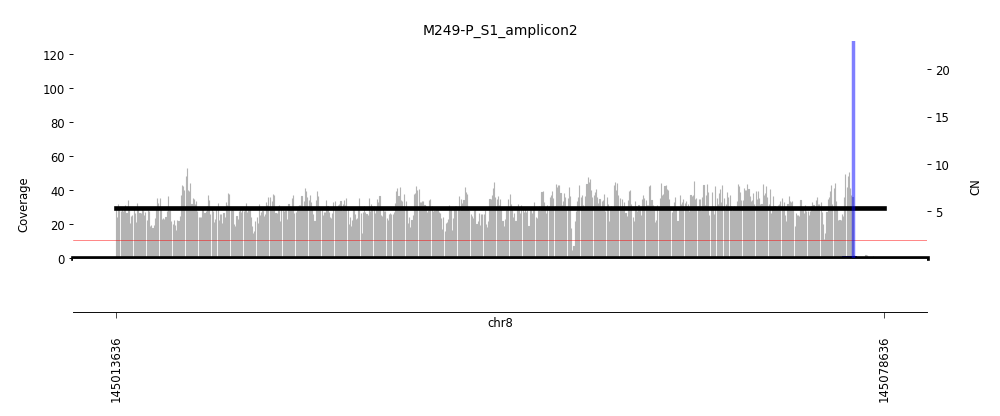



COLO320DM_LC


   Cycle     Size  Circular  CN Fraction
0      1   352Kbp     False     0.344877
2      3  1264Kbp     False     0.336842
1      2  1164Kbp     False     0.317369
Oscillations with length > 3:
#Segs	Max CN	Min CN


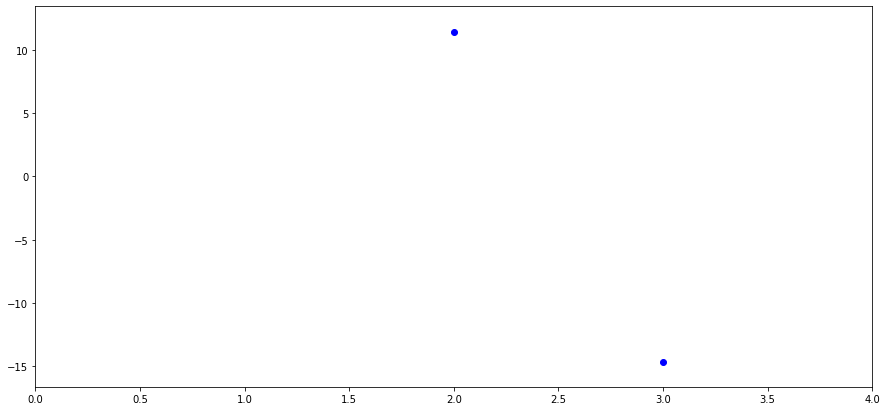



Total number of segments: 3
State	#Segs:




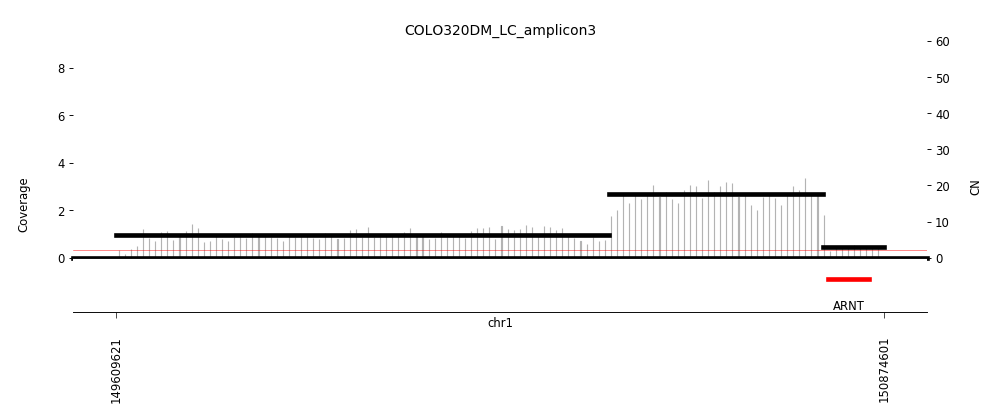



COLO320DM_LC


   Cycle     Size  Circular  CN Fraction
0      1  1290Kbp     False     0.999995
Oscillations with length > 3:
#Segs	Max CN	Min CN


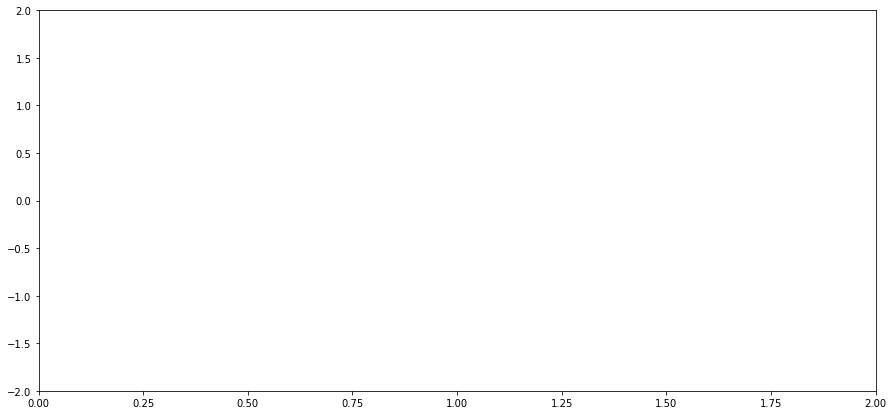



Total number of segments: 1
State	#Segs:




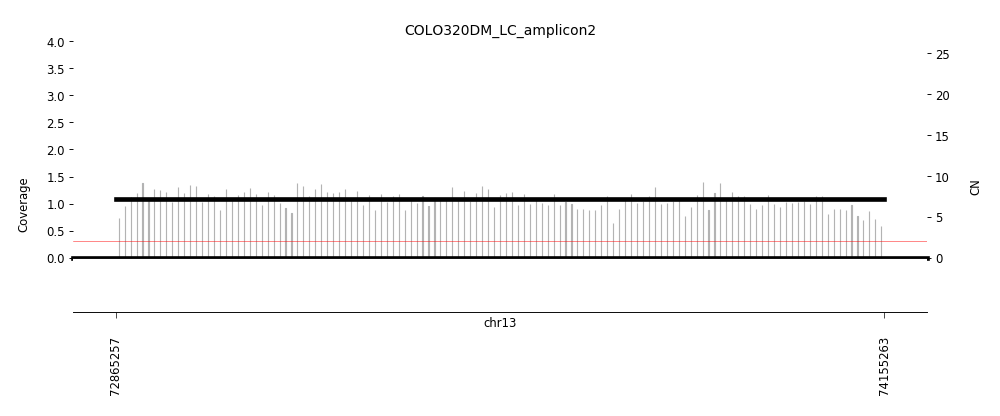



COLO320DM_LC


   Cycle     Size  Circular  CN Fraction
0      1  4297Kbp     False     0.657537
2      3  4197Kbp     False     0.199464
1      2  1819Kbp     False     0.114225
Oscillations with length > 3:
#Segs	Max CN	Min CN


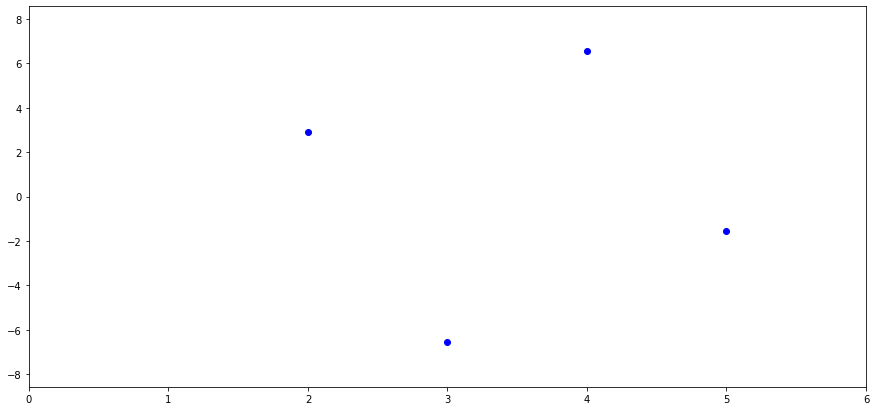



Total number of segments: 5
State	#Segs:




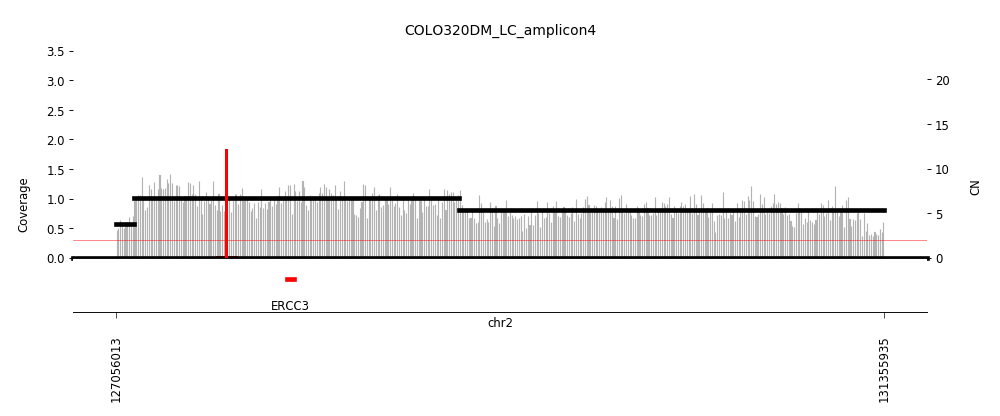



COLO320DM_LC


    Cycle     Size  Circular  CN Fraction
0       1  1580Kbp      True     0.332290
2       3  1125Kbp      True     0.211762
3       4   426Kbp     False     0.071700
1       2   256Kbp     False     0.049796
13     14   676Kbp     False     0.046788
7       8   384Kbp     False     0.039119
17     18   700Kbp      True     0.036676
20     21   773Kbp     False     0.030748
8       9   258Kbp      True     0.022897
22     23   538Kbp      True     0.017425
4       5    86Kbp      True     0.013534
9      10   144Kbp     False     0.012385
14     15   181Kbp     False     0.011098
21     22   296Kbp     False     0.010979
10     11     0Kbp      True     0.000000
12     13     0Kbp      True     0.000000
6       7     0Kbp      True     0.000000
15     16     0Kbp      True     0.000000
16     17     0Kbp      True     0.000000
5       6     0Kbp      True     0.000000
18     19     0Kbp      True     0.000000
19     20     0Kbp      True     0.000000
11     12     0Kb

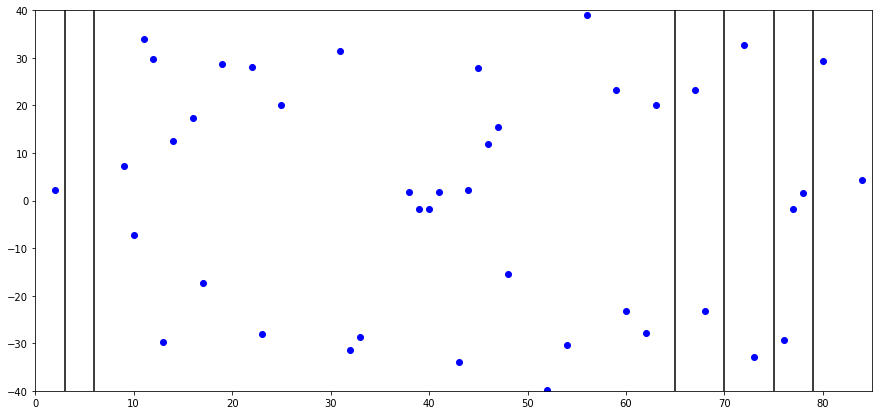



Total number of segments: 84
State	#Segs:




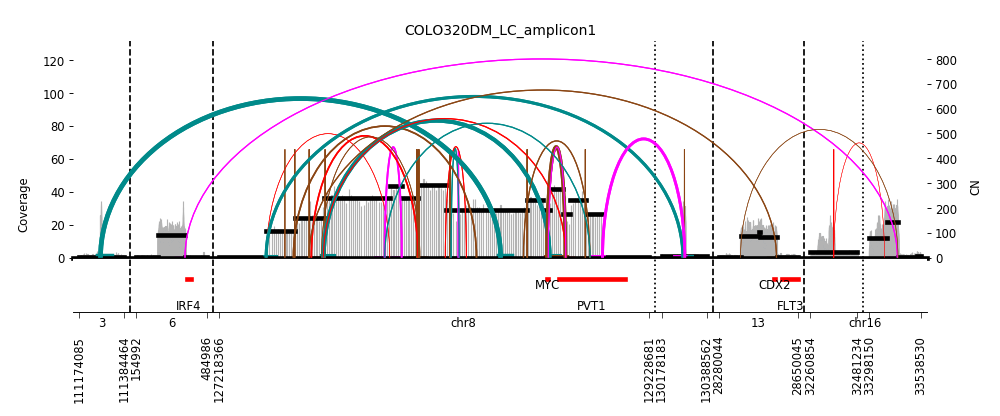



HCC827_CDK4


   Cycle    Size  Circular  CN Fraction
0      1  183Kbp     False     0.507175
1      2  290Kbp     False     0.413073
Oscillations with length > 3:
#Segs	Max CN	Min CN


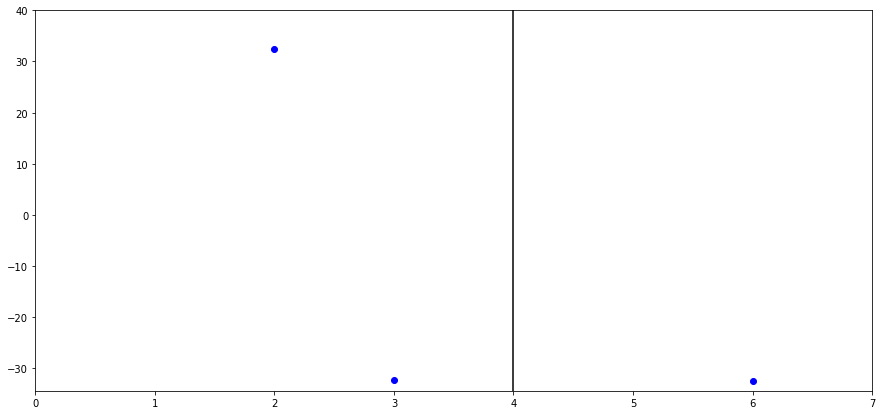



Total number of segments: 6
State	#Segs:




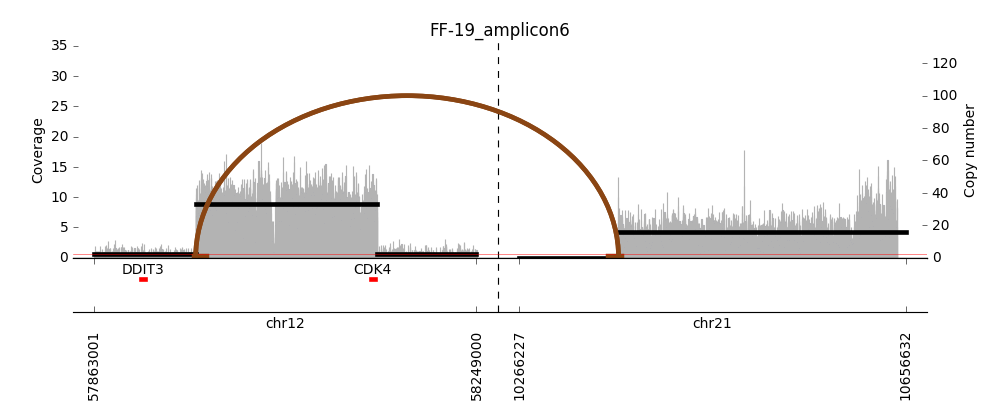



HCC827_EGFR


   Cycle     Size  Circular  CN Fraction
1      2  5611Kbp     False     0.461260
0      1  2195Kbp     False     0.410747
2      3  1219Kbp     False     0.041596
Oscillations with length > 3:
#Segs	Max CN	Min CN


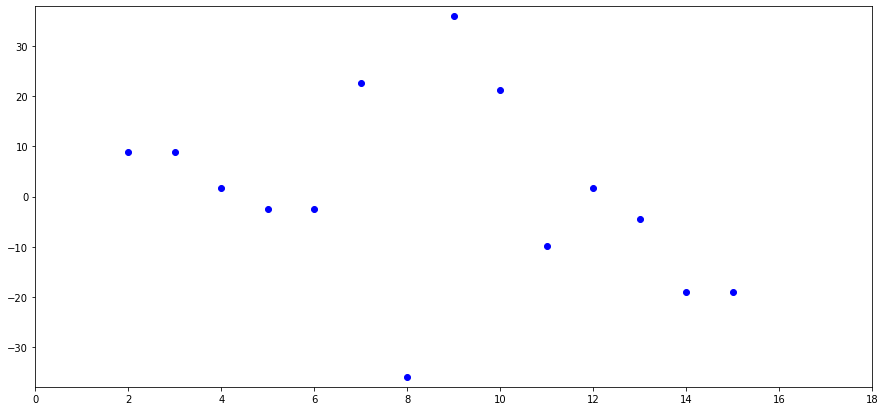



Total number of segments: 17
State	#Segs:




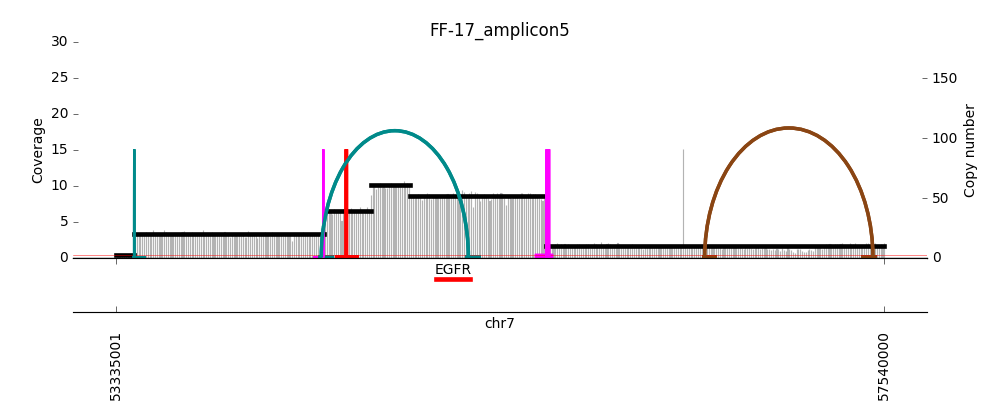



HCC827_EGFR


   Cycle     Size  Circular  CN Fraction
1      2  1672Kbp      True     0.304741
5      6  5620Kbp     False     0.173871
0      1   791Kbp      True     0.157659
2      3  2066Kbp      True     0.155059
7      8  4099Kbp     False     0.072340
6      7  1937Kbp      True     0.039868
3      4   431Kbp      True     0.020557
4      5   333Kbp     False     0.011339
Oscillations with length > 3:
#Segs	Max CN	Min CN


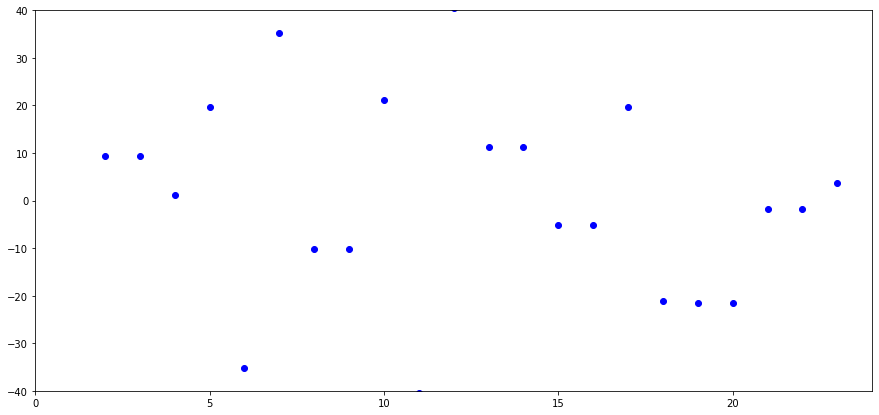



Total number of segments: 23
State	#Segs:




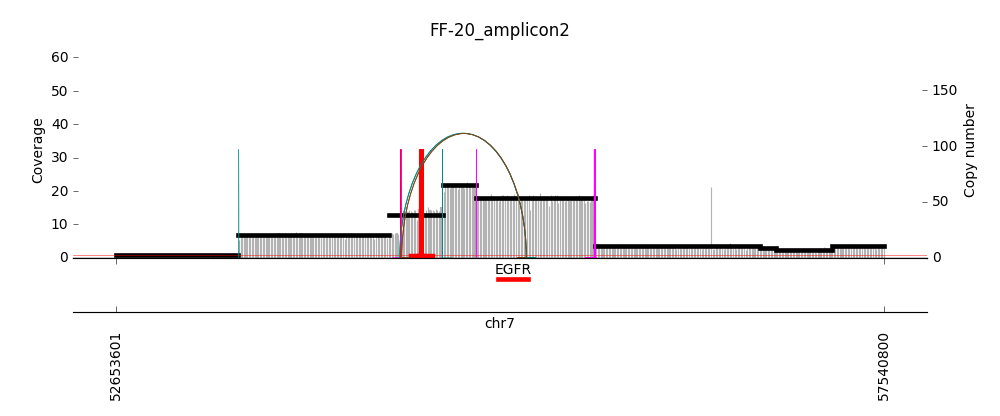



HCC827_ERBB2


   Cycle     Size  Circular  CN Fraction
2      3  4118Kbp      True     0.406453
3      4  3350Kbp     False     0.228975
0      1  1627Kbp      True     0.186071
5      6  1370Kbp     False     0.049802
4      5   463Kbp     False     0.024151
1      2   190Kbp     False     0.020297
6      7    69Kbp     False     0.002216
Oscillations with length > 3:
#Segs	Max CN	Min CN


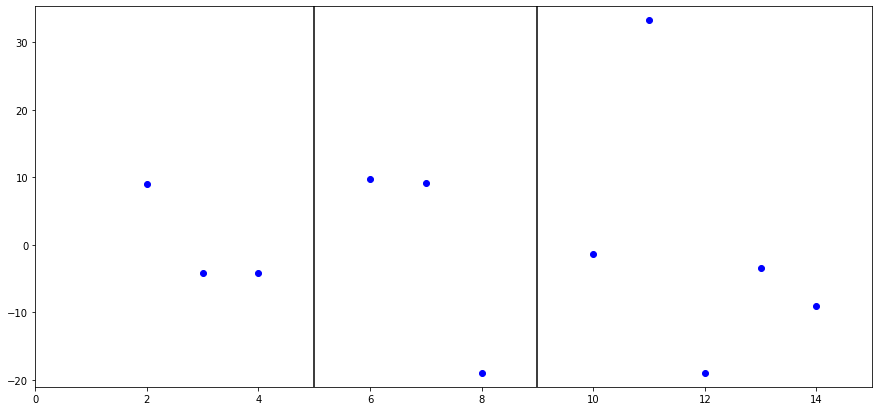



Total number of segments: 14
State	#Segs:




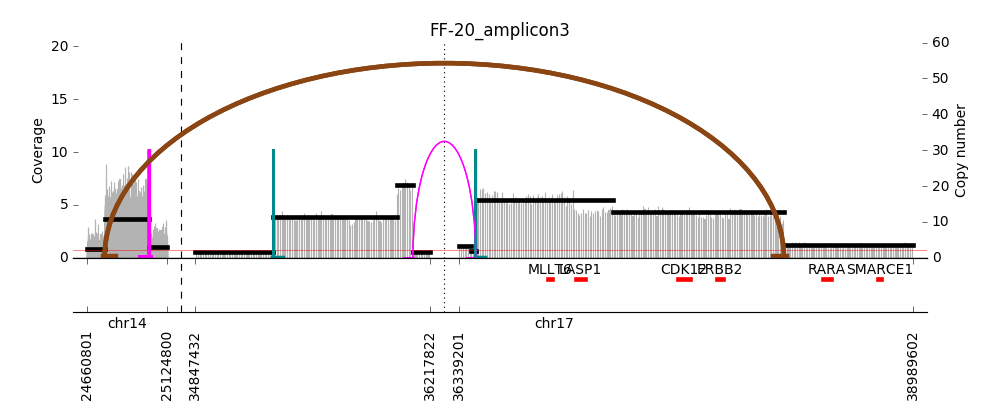



HCC827_HMGA2


   Cycle    Size  Circular  CN Fraction
0      1  135Kbp     False     0.563863
1      2  337Kbp     False     0.421233
Oscillations with length > 3:
#Segs	Max CN	Min CN


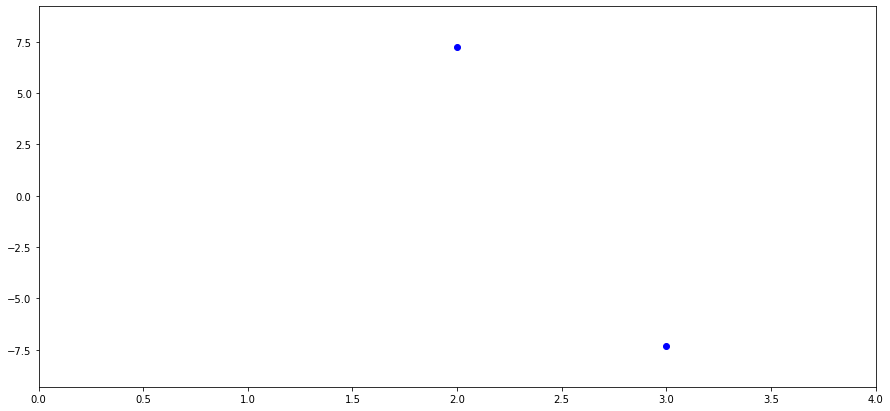



Total number of segments: 3
State	#Segs:




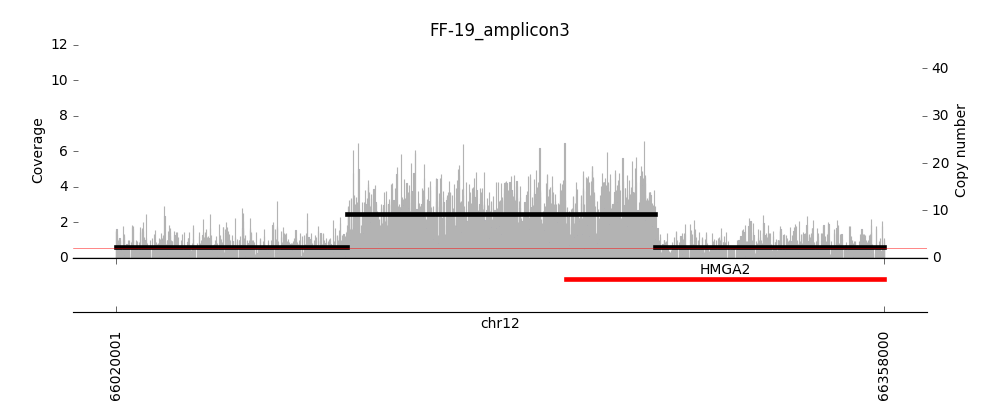



HCC827_MYC


    Cycle     Size  Circular  CN Fraction
3       4  5257Kbp     False     0.091660
7       8  5378Kbp     False     0.088281
12     13  5323Kbp     False     0.080937
0       1  2365Kbp     False     0.058503
9      10  3433Kbp     False     0.054379
17     18  4596Kbp     False     0.049388
10     11  3117Kbp     False     0.048110
22     23  5728Kbp     False     0.047843
4       5  2611Kbp     False     0.044569
8       9  2165Kbp     False     0.034630
6       7  1816Kbp     False     0.030314
37     38  9161Kbp     False     0.028428
15     16  2052Kbp     False     0.025350
24     25  2725Kbp     False     0.022139
16     17  1682Kbp     False     0.019510
1       2   890Kbp     False     0.017897
13     14  1252Kbp     False     0.017673
5       6  1016Kbp     False     0.017265
27     28  2255Kbp     False     0.017141
30     31  2089Kbp     False     0.015364
33     34  2932Kbp     False     0.014797
36     37  3233Kbp     False     0.012279
29     30  1527Kbp 

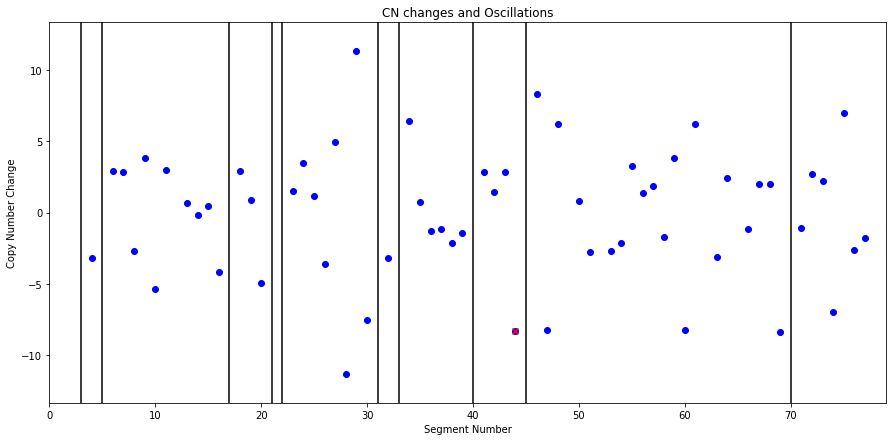



Total number of segments: 78
State	#Segs:




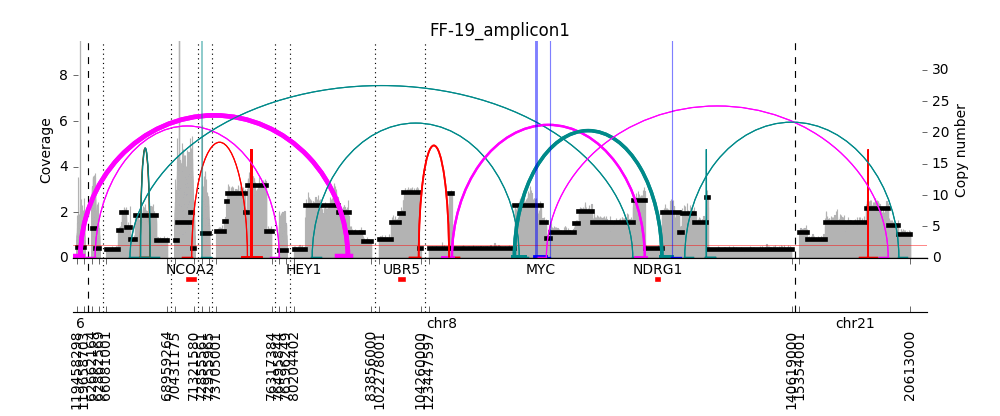



M249_samples


   Cycle   Size  Circular  CN Fraction
0      1  65Kbp     False     0.573111
1      2  64Kbp      True     0.417257
2      3   0Kbp     False     0.000000
Oscillations with length > 3:
#Segs	Max CN	Min CN


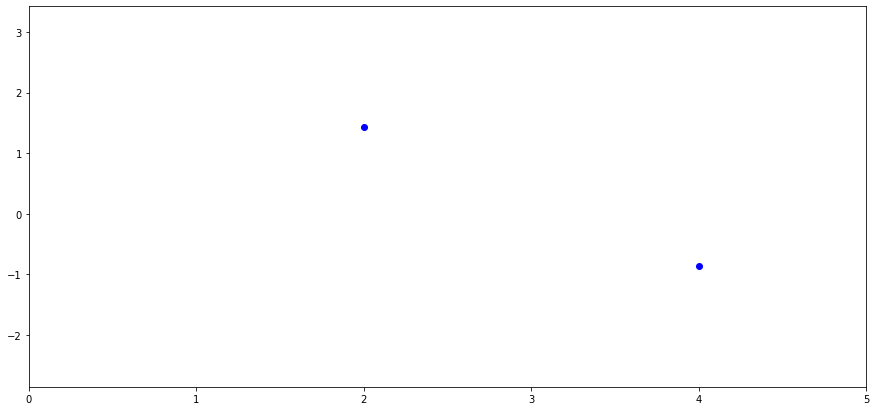



Total number of segments: 4
State	#Segs:




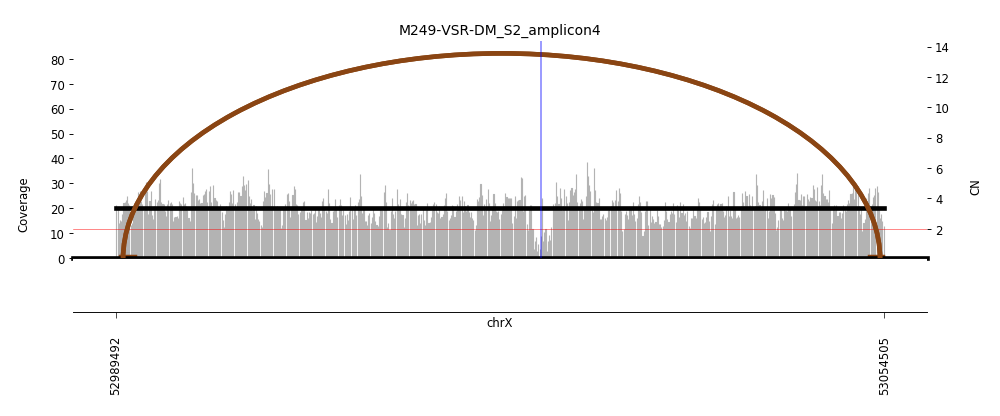



M249_samples


   Cycle     Size  Circular  CN Fraction
0      1  3194Kbp     False     0.627499
1      2  3194Kbp     False     0.270661
2      3  1187Kbp     False     0.051440
Oscillations with length > 3:
#Segs	Max CN	Min CN


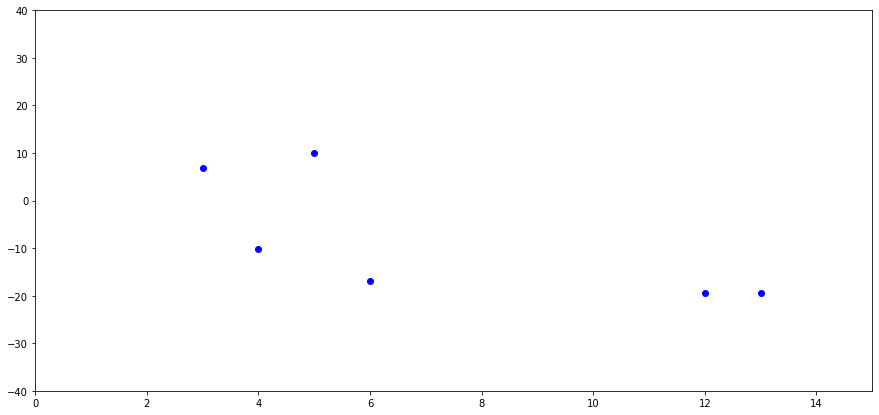



Total number of segments: 14
State	#Segs:




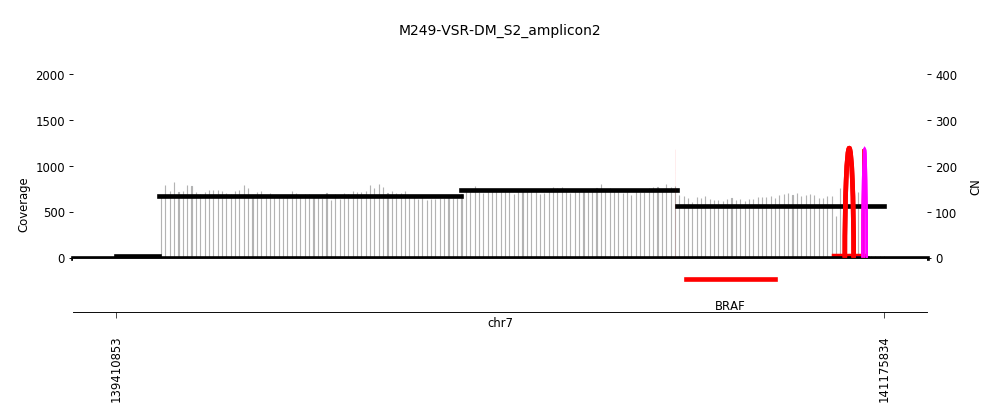



M249_samples


   Cycle    Size  Circular  CN Fraction
0      1  155Kbp     False     0.676392
1      2  135Kbp      True     0.320698
2      3    0Kbp     False     0.000000
Oscillations with length > 3:
#Segs	Max CN	Min CN


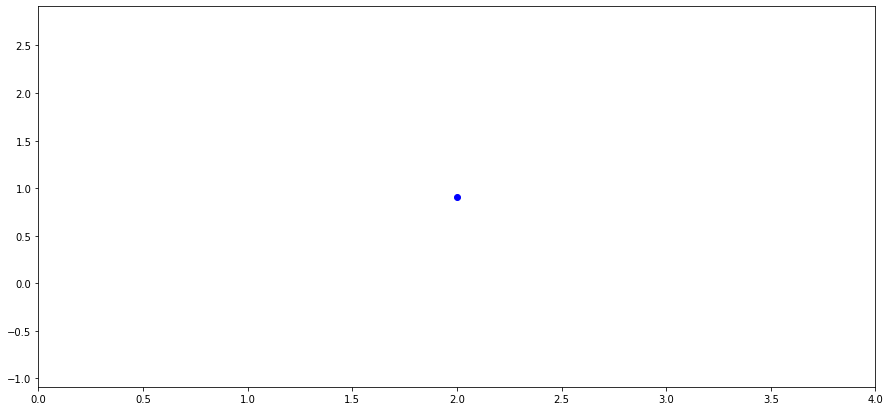



Total number of segments: 3
State	#Segs:




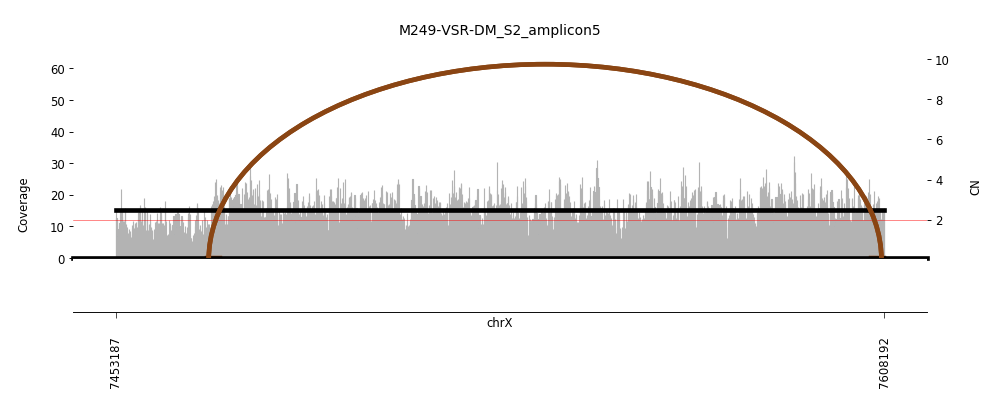



M249_samples


   Cycle    Size  Circular  CN Fraction
0      1  620Kbp     False     0.999963
Oscillations with length > 3:
#Segs	Max CN	Min CN


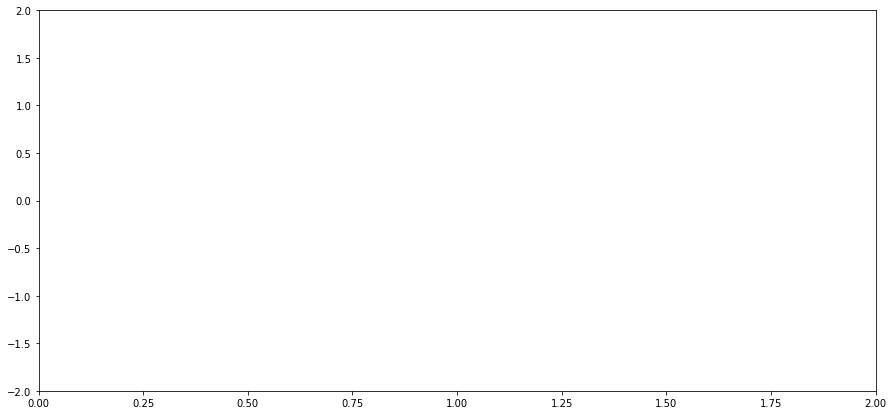



Total number of segments: 1
State	#Segs:




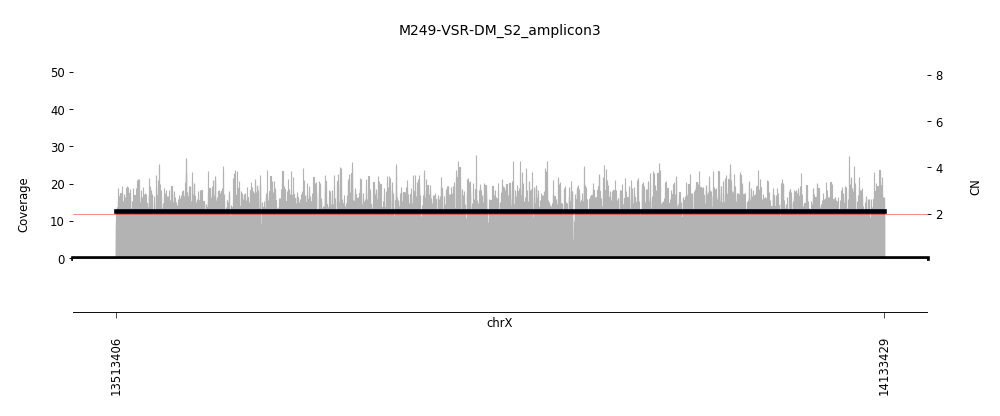



M249_samples


   Cycle    Size  Circular  CN Fraction
0      1  120Kbp     False     0.715042
1      2  101Kbp      True     0.283400
Oscillations with length > 3:
#Segs	Max CN	Min CN


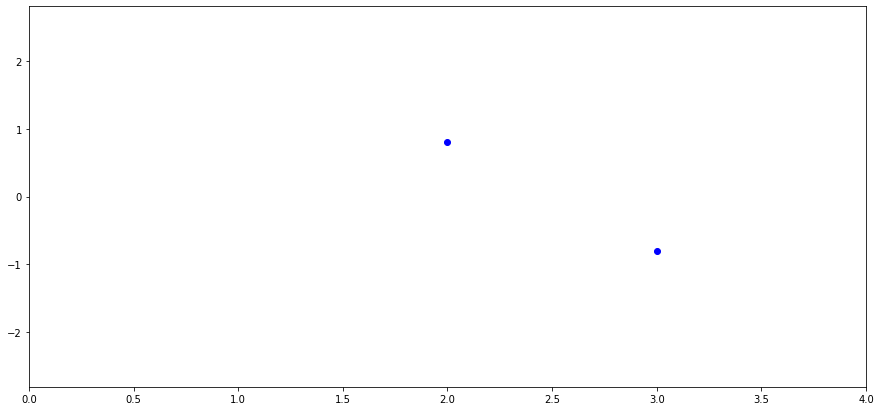



Total number of segments: 3
State	#Segs:




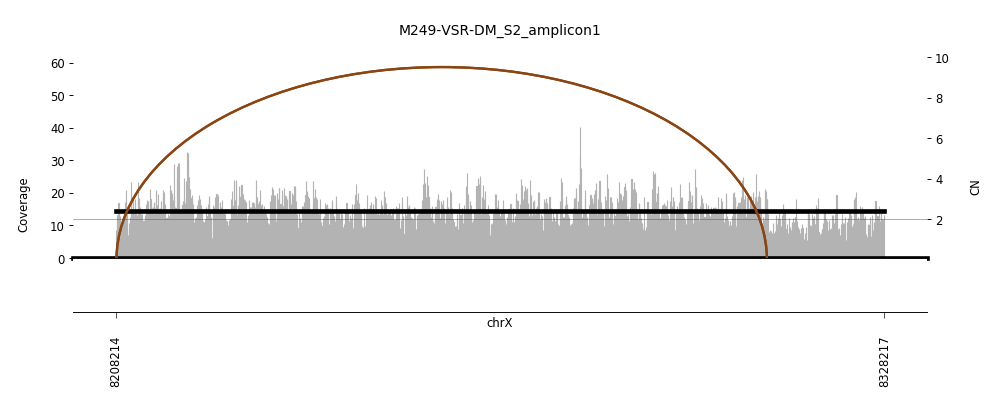



M249_samples


   Cycle     Size  Circular  CN Fraction
0      1  3194Kbp     False     0.797013
1      2  1188Kbp     False     0.077935
2      3  1640Kbp     False     0.032046
Oscillations with length > 3:
#Segs	Max CN	Min CN


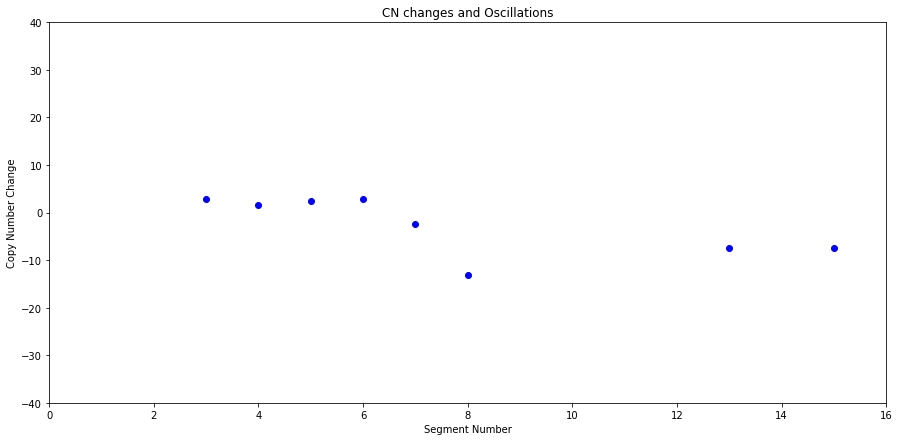



Total number of segments: 15
State	#Segs:




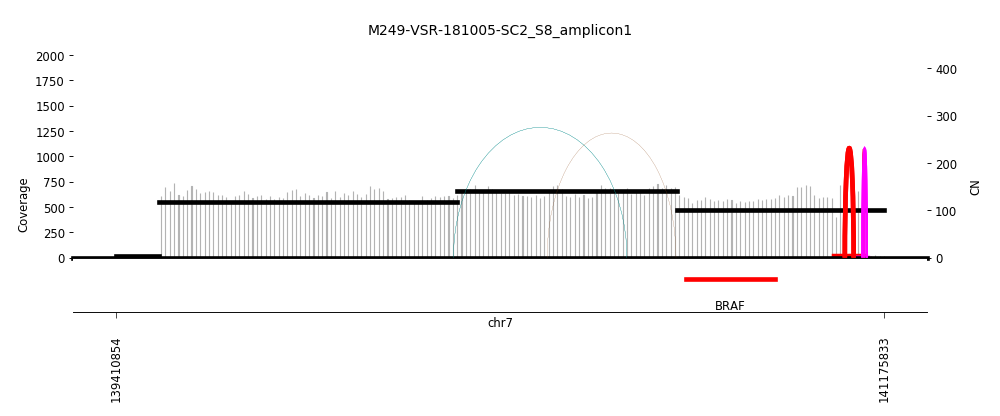



RCMB56_P1_AA_results


   Cycle    Size  Circular  CN Fraction
0      1  496Kbp     False     0.454822
1      2  605Kbp     False     0.347519
2      3  405Kbp     False     0.157723
Oscillations with length > 3:
#Segs	Max CN	Min CN


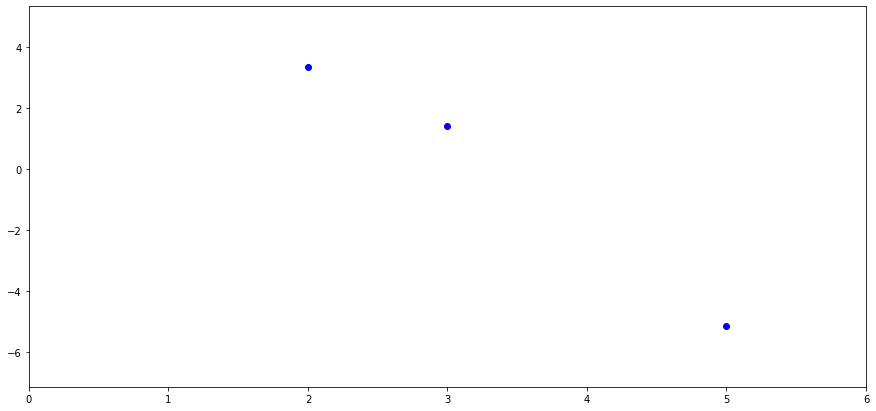



Total number of segments: 5
State	#Segs:




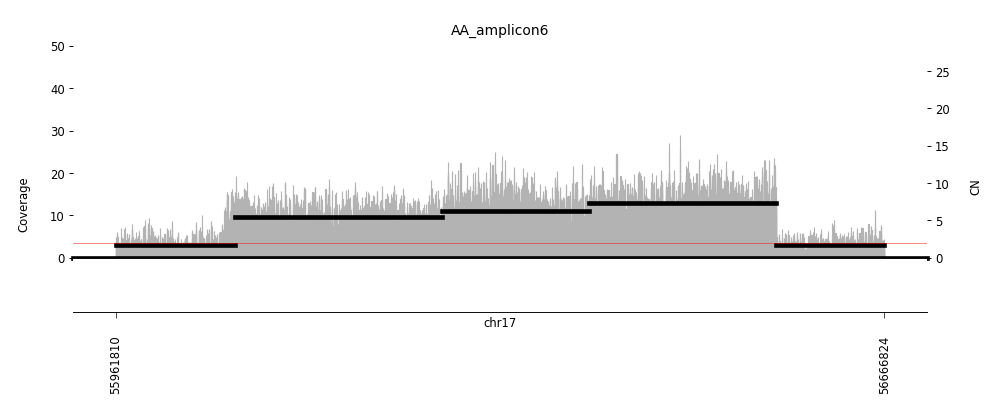



RCMB56_P1_AA_results


   Cycle    Size  Circular  CN Fraction
1      2  365Kbp     False     0.399535
0      1  285Kbp     False     0.335491
3      4  465Kbp     False     0.138402
2      3  357Kbp     False     0.125005
Oscillations with length > 3:
#Segs	Max CN	Min CN


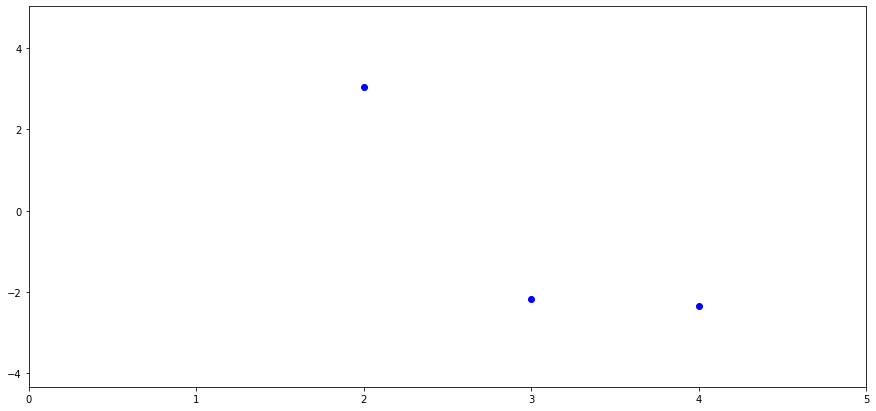



Total number of segments: 4
State	#Segs:




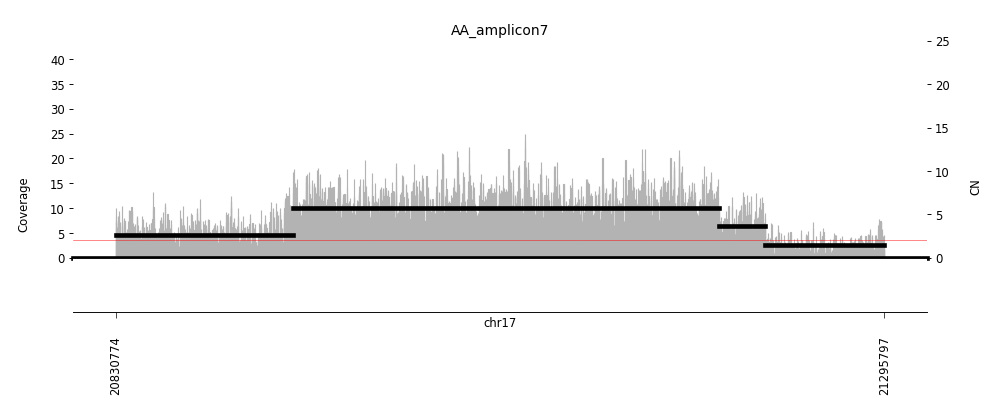



RCMB56_P1_AA_results


   Cycle     Size  Circular  CN Fraction
0      1  3204Kbp      True     0.948543
1      2     0Kbp      True     0.000000
2      3     0Kbp      True     0.000000
3      4     0Kbp      True     0.000000
4      5     0Kbp      True     0.000000
5      6     0Kbp      True     0.000000
6      7     0Kbp      True     0.000000
7      8     0Kbp      True     0.000000
8      9     0Kbp      True     0.000000
Oscillations with length > 3:
#Segs	Max CN	Min CN
4	33.79	30.71
4	30.91	1.12


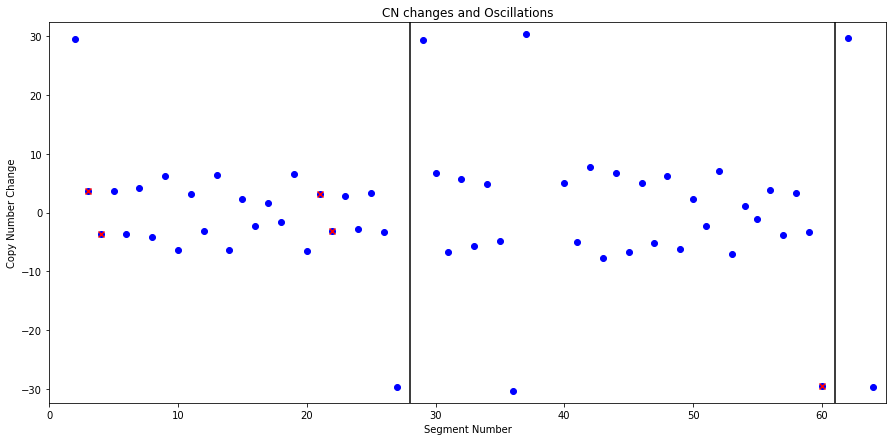



Total number of segments: 64
State	#Segs:
30.81	33
33.79	10
1.12	7




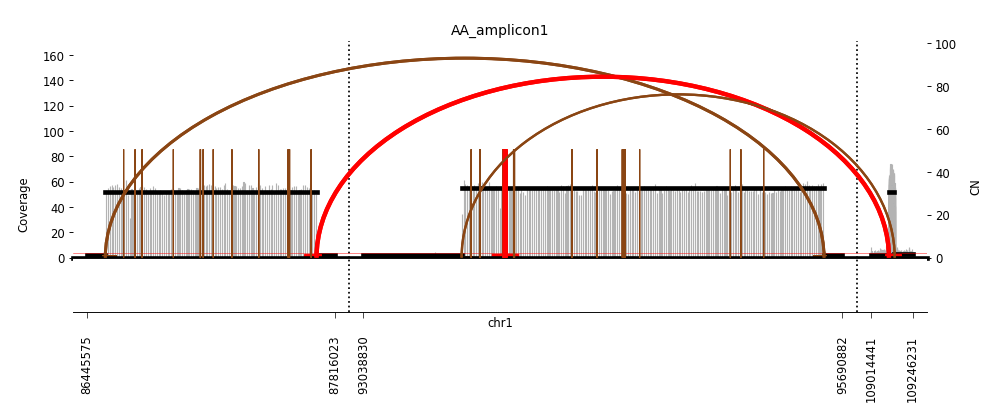



RCMB56_P1_AA_results


   Cycle    Size  Circular  CN Fraction
0      1  184Kbp     False     0.994605
Oscillations with length > 3:
#Segs	Max CN	Min CN


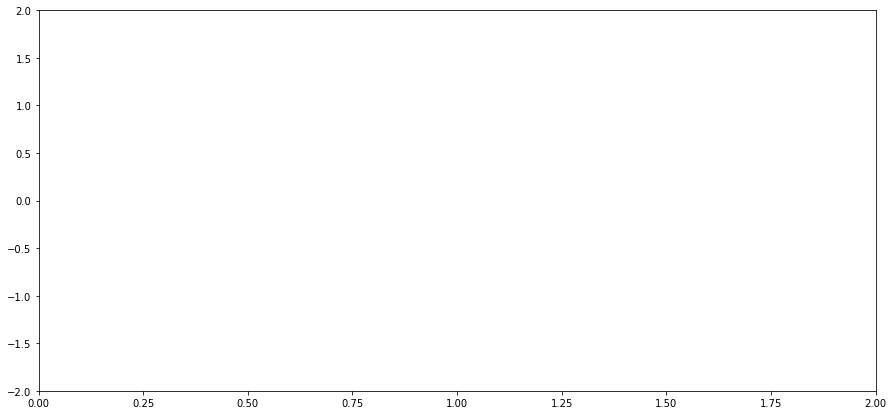



Total number of segments: 1
State	#Segs:




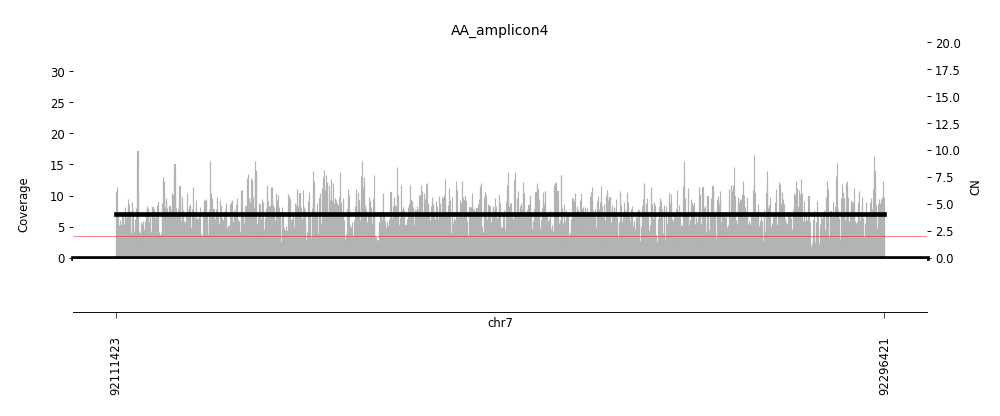



RCMB56_P1_AA_results


    Cycle     Size  Circular  CN Fraction
0       1  4397Kbp     False     0.806098
27     28  2068Kbp     False     0.023525
23     24  1164Kbp     False     0.016176
18     19   524Kbp     False     0.012938
20     21   810Kbp     False     0.012303
17     18   289Kbp     False     0.010529
21     22   612Kbp     False     0.009173
22     23   449Kbp     False     0.006668
25     26   503Kbp     False     0.006591
24     25   270Kbp     False     0.003732
19     20   129Kbp     False     0.002393
26     27    55Kbp     False     0.000698
2       3     0Kbp      True     0.000000
3       4     0Kbp      True     0.000000
16     17     0Kbp      True     0.000000
15     16     0Kbp      True     0.000000
1       2     0Kbp      True     0.000000
13     14     0Kbp      True     0.000000
12     13     0Kbp      True     0.000000
11     12     0Kbp      True     0.000000
10     11     0Kbp      True     0.000000
9      10     0Kbp      True     0.000000
8       9

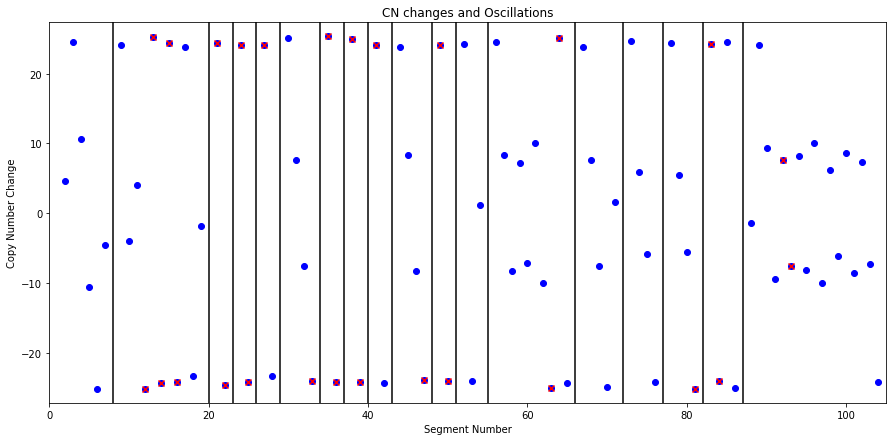



Total number of segments: 104
State	#Segs:
1.55	37
25.95	36
34.1	9




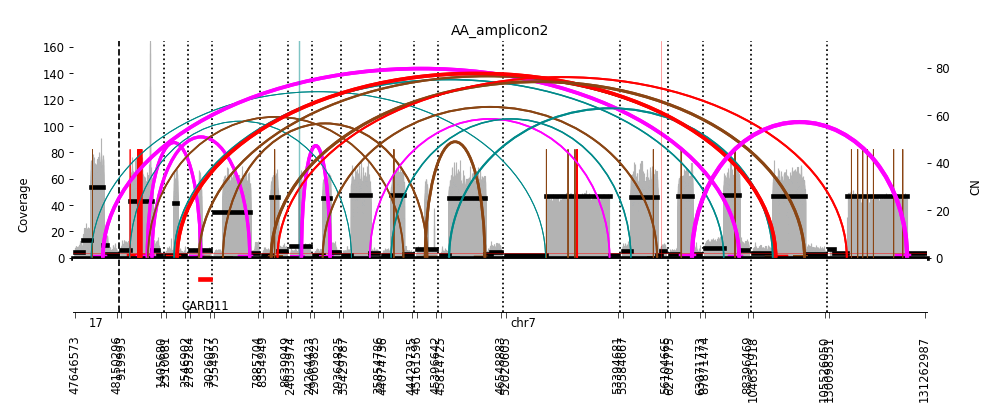



RCMB56_P1_AA_results


   Cycle    Size  Circular  CN Fraction
0      1  744Kbp     False      0.99867
Oscillations with length > 3:
#Segs	Max CN	Min CN


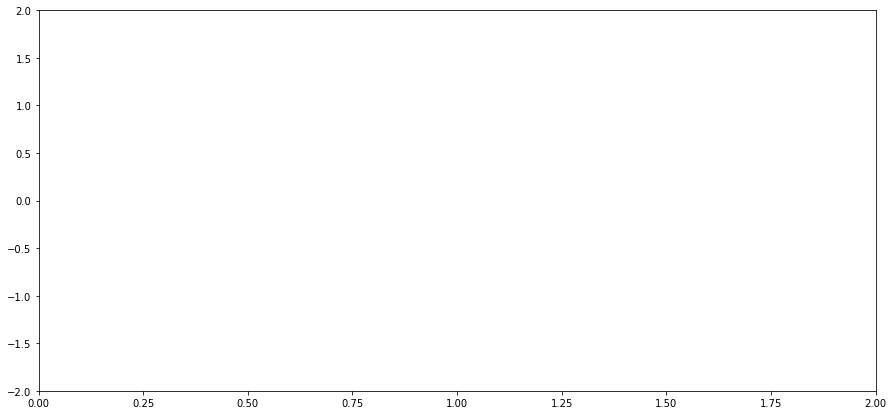



Total number of segments: 1
State	#Segs:




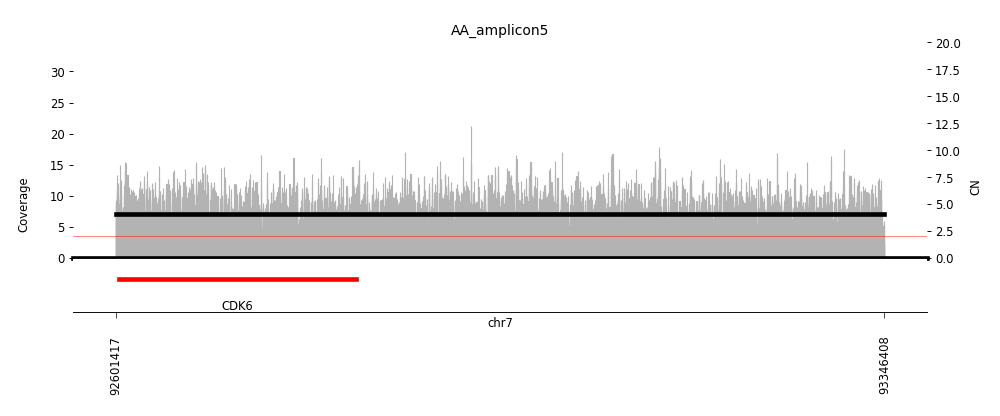



RCMB56_P1_AA_results


   Cycle    Size  Circular  CN Fraction
0      1  149Kbp     False     0.993347
Oscillations with length > 3:
#Segs	Max CN	Min CN


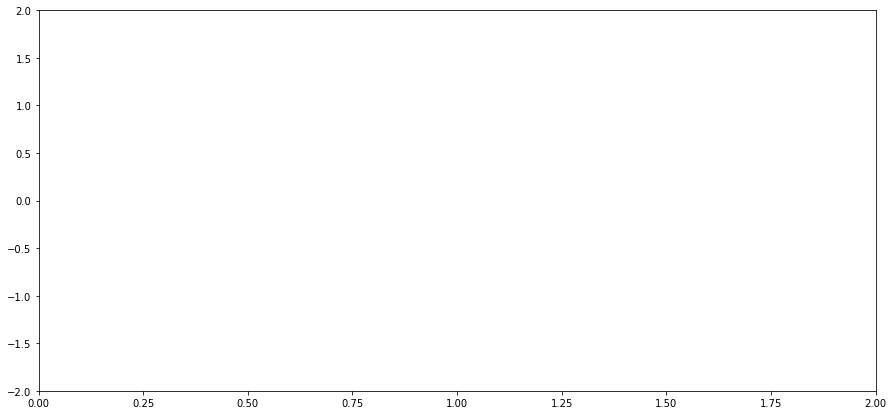



Total number of segments: 1
State	#Segs:




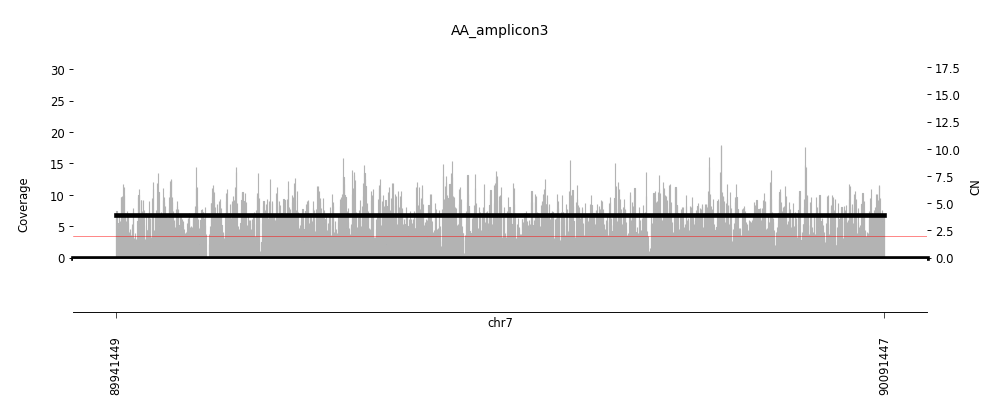



GBM39


   Cycle     Size  Circular  CN Fraction
0      1  1257Kbp      True     0.847666
1      2  1258Kbp      True     0.117164
Oscillations with length > 3:
#Segs	Max CN	Min CN


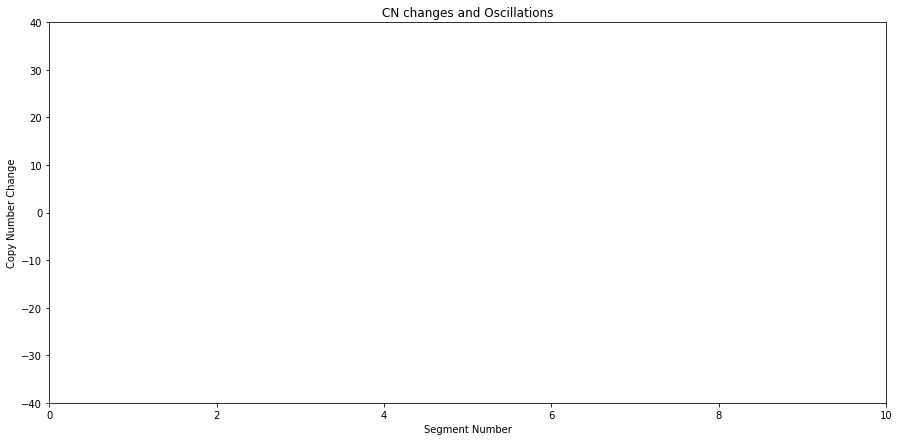



Total number of segments: 9
State	#Segs:




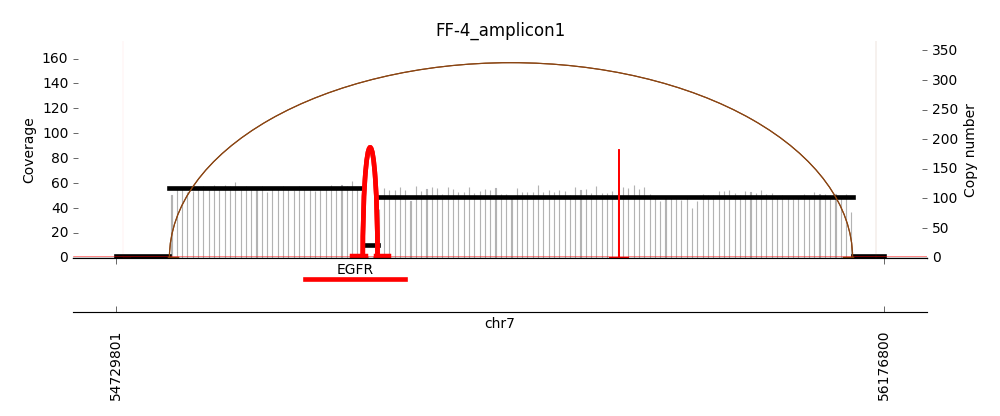



D458


   Cycle    Size  Circular  CN Fraction
0      1  205Kbp     False     0.997683
Oscillations with length > 3:
#Segs	Max CN	Min CN


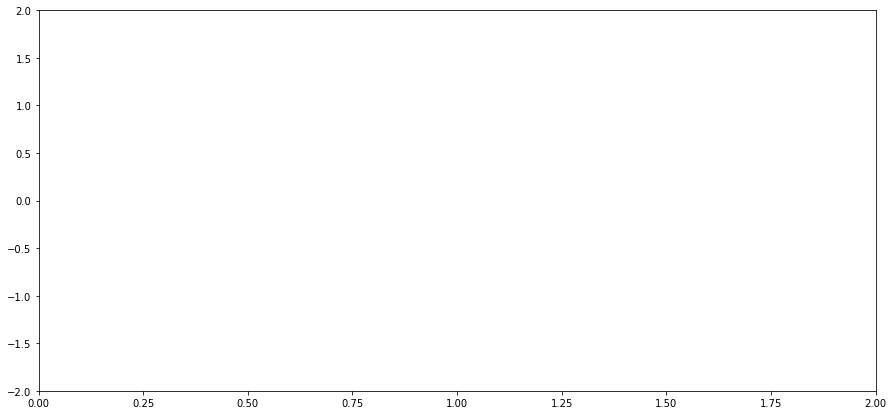



Total number of segments: 1
State	#Segs:




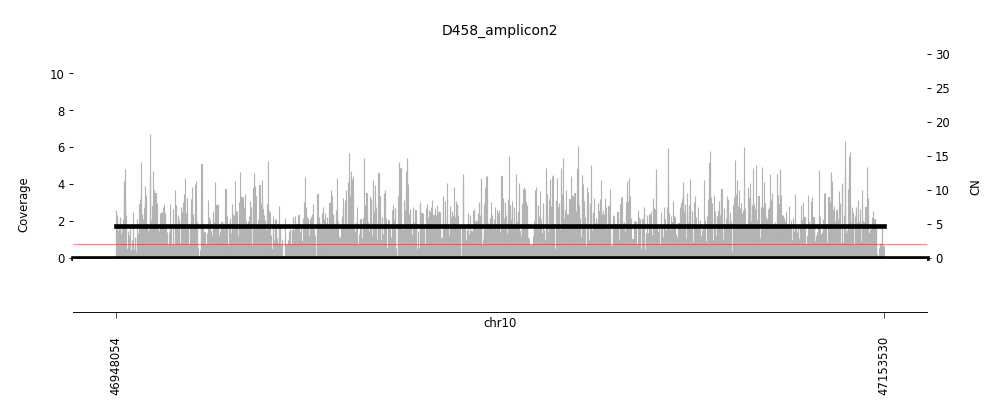



D458


    Cycle     Size  Circular  CN Fraction
1       2  1379Kbp      True     0.467608
2       3  1181Kbp      True     0.353543
46     47  1156Kbp     False     0.044740
20     21   273Kbp      True     0.034666
45     46   124Kbp      True     0.007387
3       4    15Kbp      True     0.003749
44     45    21Kbp     False     0.001260
41     42    12Kbp      True     0.001072
0       1     2Kbp      True     0.000792
40     41     5Kbp      True     0.000447
9      10     2Kbp      True     0.000365
12     13     2Kbp      True     0.000331
13     14     1Kbp      True     0.000164
21     22     1Kbp      True     0.000126
32     33     1Kbp      True     0.000107
38     39     1Kbp      True     0.000101
33     34     0Kbp      True     0.000000
34     35     0Kbp      True     0.000000
35     36     0Kbp      True     0.000000
36     37     0Kbp      True     0.000000
37     38     0Kbp      True     0.000000
39     40     0Kbp      True     0.000000
30     31     0Kbp      T

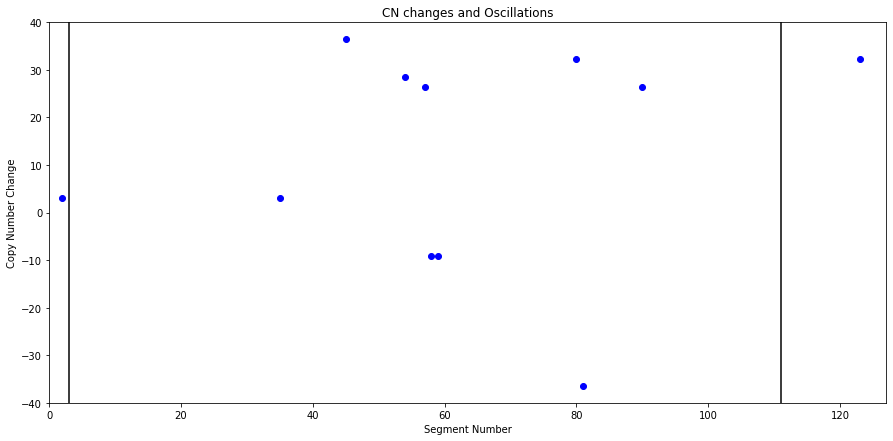



Total number of segments: 126
State	#Segs:
566.19	15
2.37	7
265.98	7
645.27	3
273.37	3
242.73	3
206.48	2
314.18	2
349.49	1
479.59	1
344.64	1




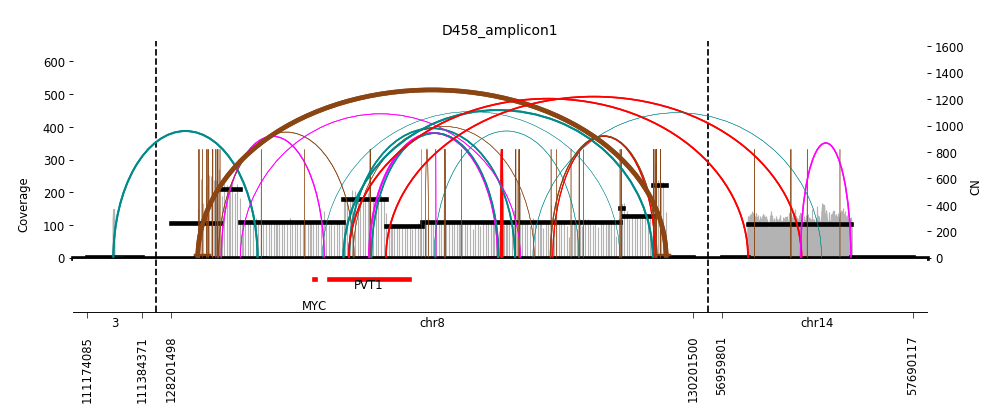



H460


   Cycle     Size  Circular  CN Fraction
0      1  2445Kbp      True     0.605122
1      2  1076Kbp     False     0.259285
3      4  2149Kbp     False     0.095653
2      3   335Kbp      True     0.017745
Oscillations with length > 3:
#Segs	Max CN	Min CN


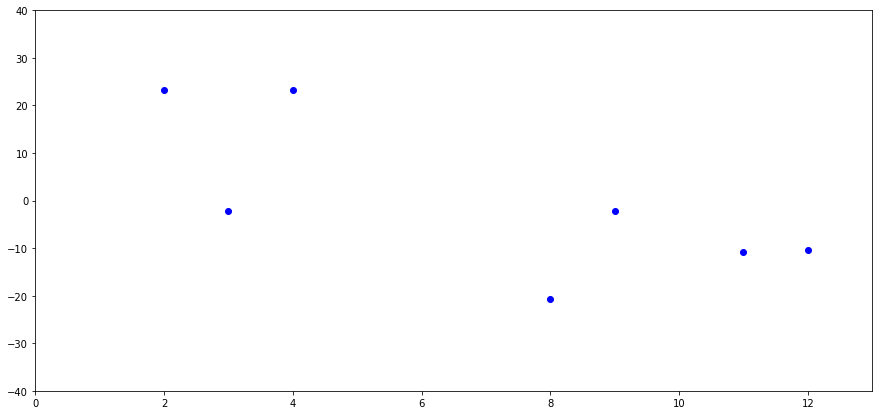



Total number of segments: 12
State	#Segs:




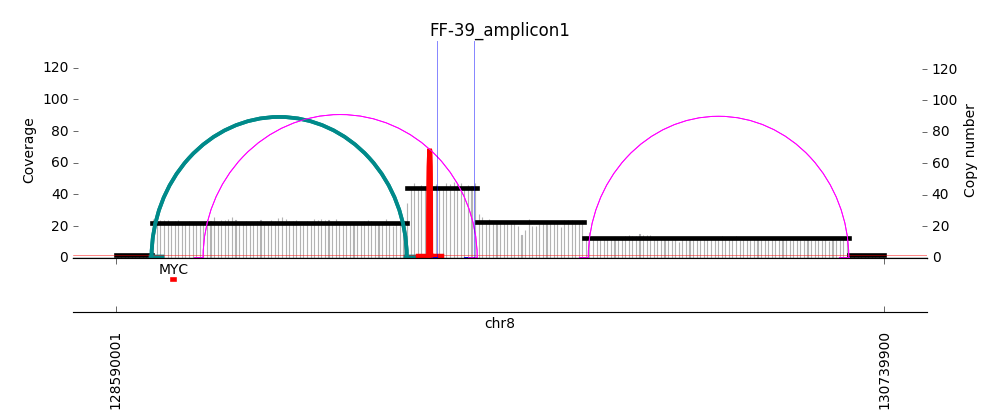



K562


    Cycle     Size  Circular  CN Fraction
2       3  3820Kbp     False     0.290979
9      10  4111Kbp      True     0.096901
5       6  1656Kbp     False     0.092224
4       5  1405Kbp     False     0.090829
15     16  4290Kbp     False     0.049890
12     13  2945Kbp     False     0.048602
3       4   665Kbp     False     0.047894
11     12  2263Kbp     False     0.047742
16     17  5238Kbp     False     0.039080
1       2   402Kbp     False     0.031814
0       1   382Kbp      True     0.031576
8       9   991Kbp     False     0.024250
7       8   748Kbp     False     0.021525
14     15   988Kbp     False     0.011721
13     14   361Kbp     False     0.004803
6       7    57Kbp      True     0.002133
10     11    76Kbp     False     0.001649
Oscillations with length > 3:
#Segs	Max CN	Min CN
4	9.67	1.24
4	13.52	7.05


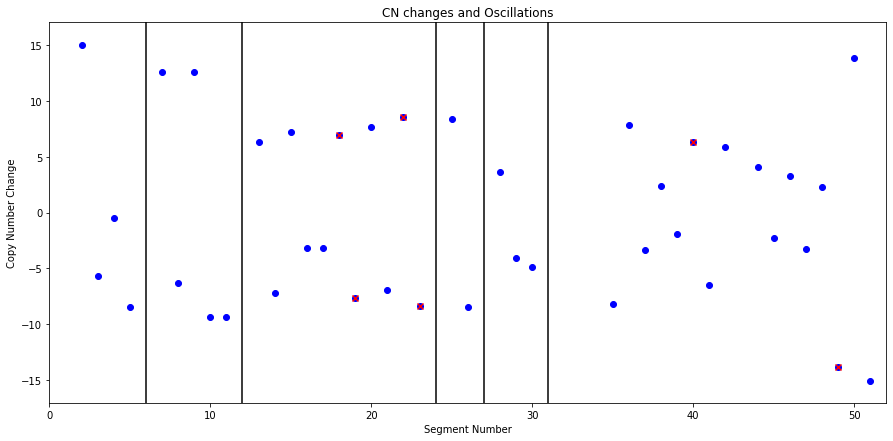



Total number of segments: 51
State	#Segs:
1.24	11
9.67	10
7.05	8
13.52	4




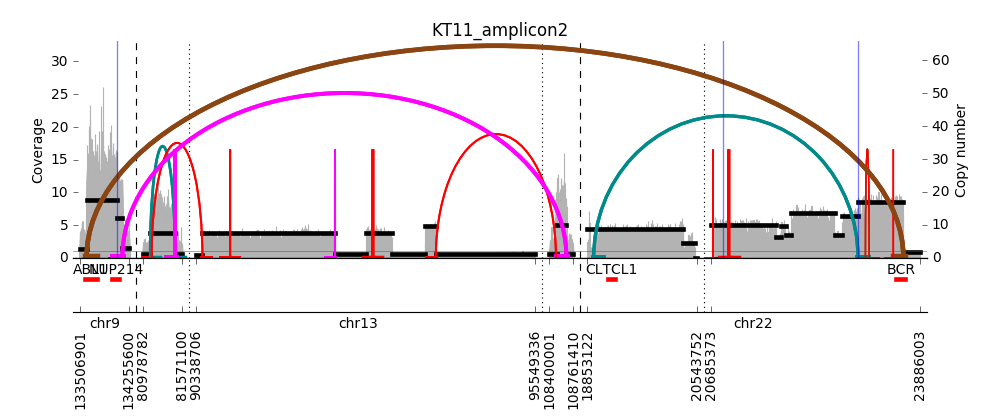



K562


   Cycle    Size  Circular  CN Fraction
1      2  362Kbp     False     0.417217
0      1  193Kbp     False     0.377773
2      3  293Kbp     False     0.165282
Oscillations with length > 3:
#Segs	Max CN	Min CN


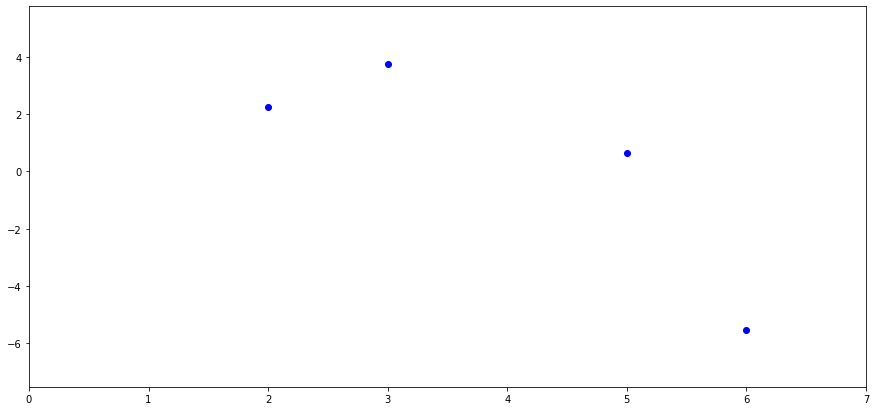



Total number of segments: 6
State	#Segs:




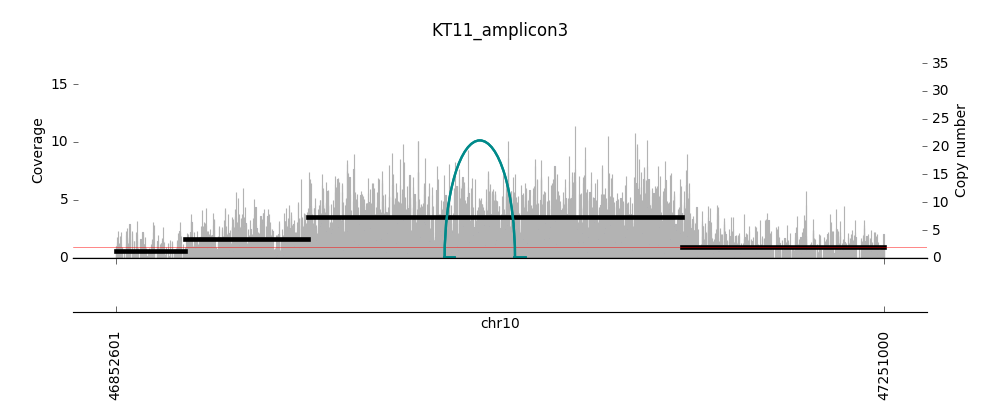



K562


   Cycle    Size  Circular  CN Fraction
1      2  317Kbp     False     0.580002
0      1  123Kbp     False     0.387050
Oscillations with length > 3:
#Segs	Max CN	Min CN


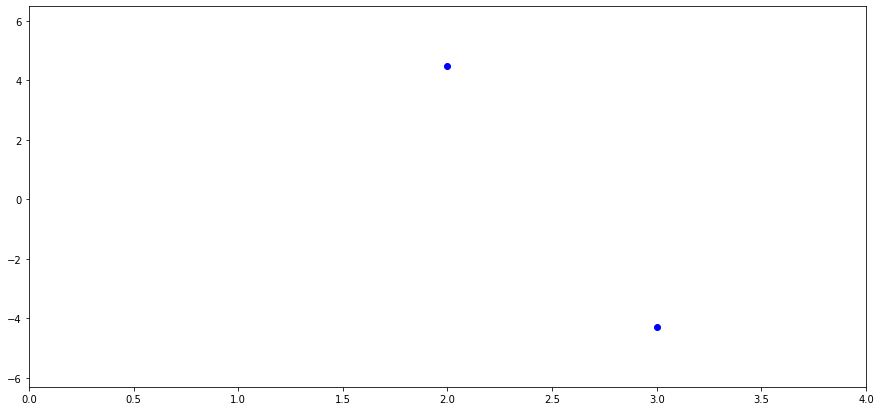



Total number of segments: 3
State	#Segs:




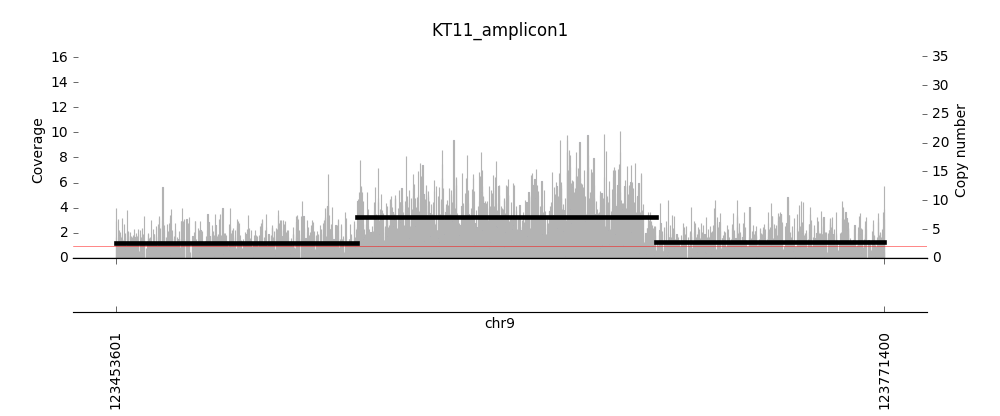

In [109]:
for amplicon_folder in aa_folders:
    amplicon_graph_files = [file for file in os.listdir(amplicon_folder) if file.endswith("graph.txt")]
    for graphf in amplicon_graph_files:
        
        cyclesf = graphf.split("graph.txt")[0] + "cycles_converted_cycles.txt"
        s,c = readConvertedCycles(amplicon_folder + cyclesf, amplicon_folder + graphf)
        print(amplicon_folder.split("/")[-3])
       
        print("\n")
        print(cycleFractionTable(c,s))
    
        sample_amp = graphf.split("_graph")[0] 
        sample, amp = sample_amp.split("_amplicon")

        png = amplicon_folder + sample_amp + ".png"

        max_cont, n_osc, n_seg, n_seg_osc, sdict,  l = oscillating_cn(amplicon_folder + graphf)
        print("\n")
        print("Total number of segments: " + str(l))
        print("State\t#Segs:")
        for k in sdict:
            print(str(round(k,2)) + "\t"+ str(sdict[k]))

        print("\n")
        display(Image(filename=png))


        
        print("\n")


Oscillations with length > 3:
#Segs	Max CN	Min CN
7	25.79	1.21
7	26.51	2.31
8	25.29	1.2
5	25.6	0.54
4	26.19	2.1
5	34.1	25.98


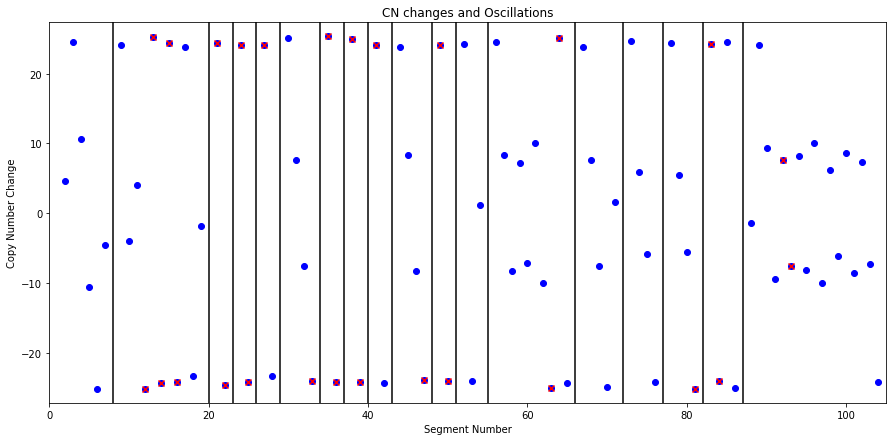

In [62]:
max_cont, n_osc, n_seg, something , sdict, len_cns =\
oscillating_cn("/Users/bhargavi/Documents/Research/Amplicon/data/data2/RCMB56_P1/RCMB56_P1_AA_results/RCMB56_AA/RCMB56_P1_amplicon2_graph.txt", show_plot=True)

In [63]:
max_cont

8

In [64]:
n_osc

26